## Standard Imports and Reading File

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
import pylab as py
from scipy import stats
from ipywidgets import interact, IntSlider, FloatSlider
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Dataset-yes bank/heart.csv')
#df=pd.read_csv('/content/drive/MyDrive/Dataset-yes bank/heart.csv')
#converting the values for better visualisation
df['Sex'] = df['Sex'].replace({'M':'Male', 'F':'Female'})
df['ExerciseAngina'] = df['ExerciseAngina'].replace({'N':'No', 'Y':'Yes'})
df['FastingBS'] = df['FastingBS'].apply(str)
df['FastingBS'] = df['FastingBS'].replace({'0':'< 120 mg/dl', '1':'> 120 mg/dl'})
df['HeartDisease'] = df['HeartDisease'].apply(str)
df['HeartDisease'] = df['HeartDisease'].replace({'0':'No', '1':'Yes'})
#removing the outlier having Blood Pressure of zero
bool=df['RestingBP']!=0
df=df[bool]
#making a new dataframe where cholesterol = 0 values are excluded
bool=df['Cholesterol']!=0
df_chol=df[bool]
df2=df.copy()
df2['HeartDisease'] = df2['HeartDisease'].apply(str)   # Heart Disease and Fasting Blood sugar are effectively categorical
df2['FastingBS']  = df2['FastingBS'].apply(str)

## Preliminary EDA

In [ ]:
df.head()

Age     Sex ChestPainType  ...  Oldpeak  ST_Slope HeartDisease
0   40    Male           ATA  ...      0.0        Up           No
1   49  Female           NAP  ...      1.0      Flat          Yes
2   37    Male           ATA  ...      0.0        Up           No
3   48  Female           ASY  ...      1.5      Flat          Yes
4   54    Male           NAP  ...      0.0        Up           No

[5 rows x 12 columns]

Printing the datatypes and Unique Values

In [ ]:
print(df.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS          object
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease       object
dtype: object


In [ ]:
q=np.arange(len(df.columns.values)) #initialising a numpy array which will contain the unique values for each variable
k=0
for x in df.columns.values:
  q[k]=df[x].nunique(dropna = True) #Assigning a numpy array the unique values for each variable
  k=k+1
labels=df.columns.values
uniqvals=np.column_stack((labels, q)) #Stacking the arrays to make a 2D array
uniqvaldf=pd.DataFrame(uniqvals, columns=['Variables', 'Unique Values']) #Converting into a dataframe
print(uniqvaldf.to_string(index = False)) #printing the dataframe

      Variables Unique Values
            Age            50
            Sex             2
  ChestPainType             4
      RestingBP            66
    Cholesterol           222
      FastingBS             2
     RestingECG             3
          MaxHR           119
 ExerciseAngina             2
        Oldpeak            53
       ST_Slope             3
   HeartDisease             2


Printing Nan Values in each column

In [ ]:
k=0
r=np.arange(len(df.columns.values)) #initialising a numpy array which will contain the Null/Missing values for each variable
for x in df.columns.values:
  r[k]=df[x].isna().sum() #Assigning a numpy array for the Missing/Null values for each variable
  k=k+1
labels=df.columns.values
nulvals=np.column_stack((labels, r)) #Stacking the arrays to make a 2D array
nulvalsdf=pd.DataFrame(nulvals, columns=['Variables', 'Null/Missing Values']) #Converting into a dataframe
print(nulvalsdf.to_string(index=False))

      Variables Null/Missing Values
            Age                   0
            Sex                   0
  ChestPainType                   0
      RestingBP                   0
    Cholesterol                   0
      FastingBS                   0
     RestingECG                   0
          MaxHR                   0
 ExerciseAngina                   0
        Oldpeak                   0
       ST_Slope                   0
   HeartDisease                   0


We see that there are no nan values in any column

Checking the dataframe stats at glance

In [ ]:
df.describe()

Age   RestingBP  Cholesterol       MaxHR     Oldpeak
count  917.000000  917.000000   917.000000  917.000000  917.000000
mean    53.509269  132.540894   199.016358  136.789531    0.886696
std      9.437636   17.999749   109.246330   25.467129    1.066960
min     28.000000   80.000000     0.000000   60.000000   -2.600000
25%     47.000000  120.000000   174.000000  120.000000    0.000000
50%     54.000000  130.000000   223.000000  138.000000    0.600000
75%     60.000000  140.000000   267.000000  156.000000    1.500000
max     77.000000  200.000000   603.000000  202.000000    6.200000

Printing How many times a value is repeated in each column

In [ ]:
for feature in df.columns:          #Finding value counts for columns with few (<5) number of unique values
  if df[feature].nunique() < 5:
    print(df[feature].value_counts(), ' \n', '-'*40)

Male      724
Female    193
Name: Sex, dtype: int64  
 ----------------------------------------
ASY    496
NAP    202
ATA    173
TA      46
Name: ChestPainType, dtype: int64  
 ----------------------------------------
< 120 mg/dl    703
> 120 mg/dl    214
Name: FastingBS, dtype: int64  
 ----------------------------------------
Normal    551
LVH       188
ST        178
Name: RestingECG, dtype: int64  
 ----------------------------------------
No     546
Yes    371
Name: ExerciseAngina, dtype: int64  
 ----------------------------------------
Flat    459
Up      395
Down     63
Name: ST_Slope, dtype: int64  
 ----------------------------------------
Yes    507
No     410
Name: HeartDisease, dtype: int64  
 ----------------------------------------


With the above information we can divide our variables in the following format

| Variable     | Datatype |
| ----------- | ----------- |
| Age      | Continous Numerical  |
| Sex   | Categorical  |
| Chest Pain Type  | Categorical    |
| Resting Blood Pressure   | Continous Numerical  |
| Cholesterol      | Continous Numerical  |
| Fasting Blood Sugar   | Categorical  |
| Resting ECG | Categorical |
| Maximum Heart Rate | Continous Numerical   |
| Exercise Angina      | Categorical |
| Old Peak  | Continous Numerical  |
| ST Slope  | Categorical   |


## A few Basic plots to get a feel for the dataset

Text(0.5, 1.0, 'Histogram of Gender')

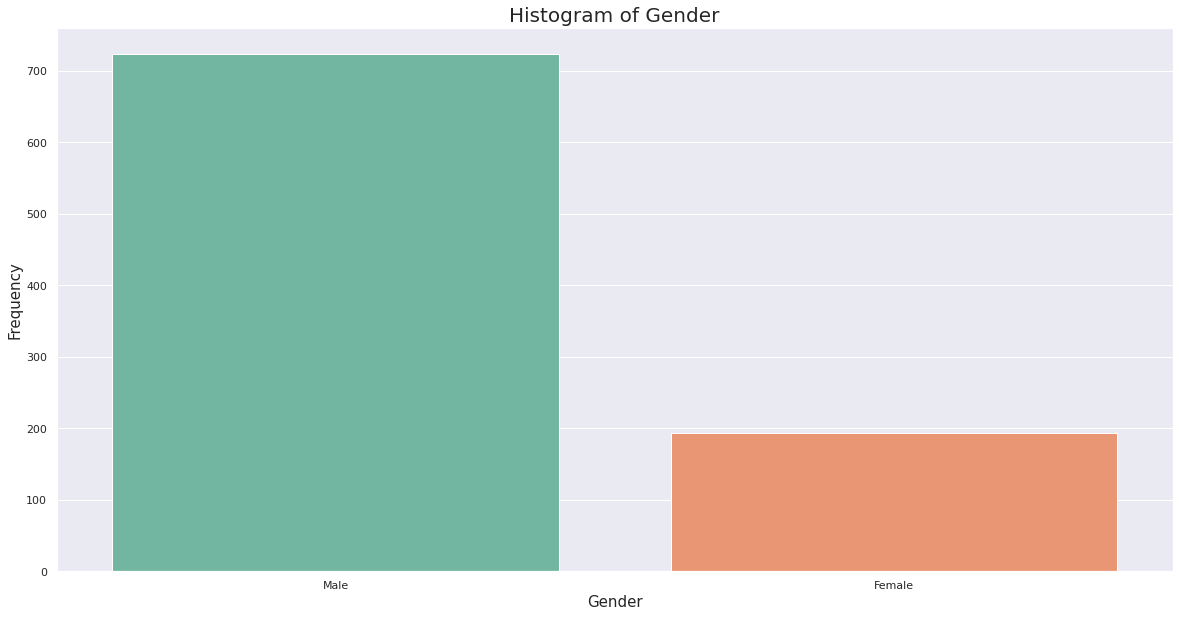

In [ ]:
fig = plt.figure(figsize=(20, 10))
#using countplot to get count of values
plot = sns.countplot(x='Sex', data = df, palette="Set2"); 
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Gender", fontsize=15)
plt.title('Histogram of Gender', fontsize=20)

We see that in our dataset there are more male values than female.

Text(0.5, 1.0, 'Histogram of Chest Pain Type')

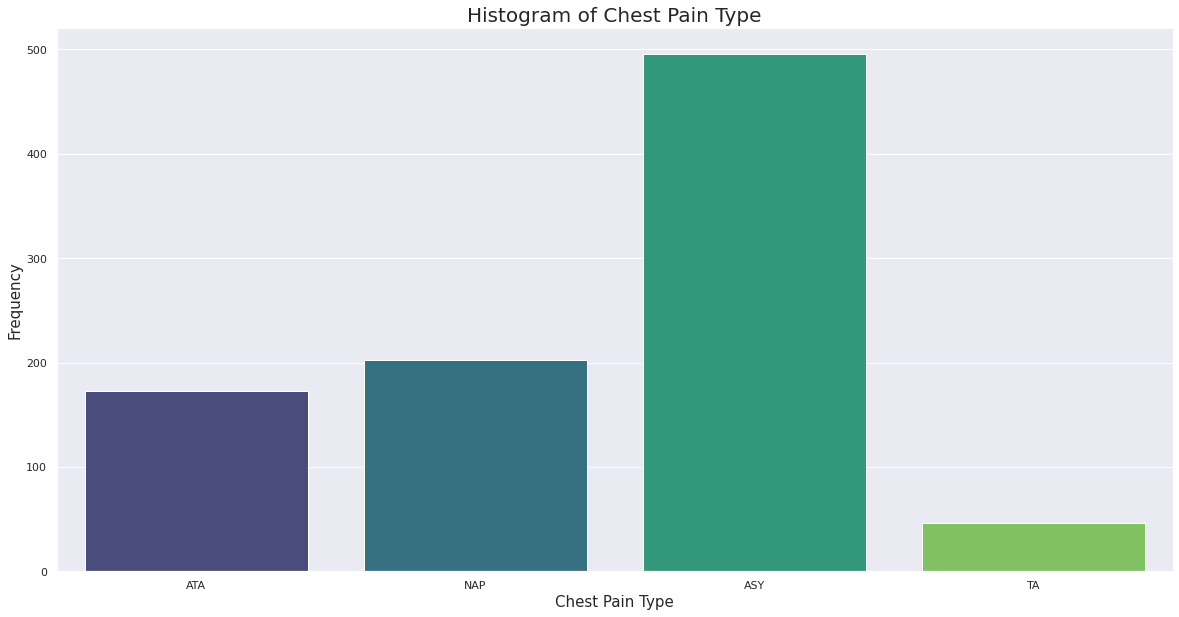

In [ ]:
fig = plt.figure(figsize=(20, 10))
#using countplot to get count of values
plot = sns.countplot(x='ChestPainType', data = df, palette="viridis"); 
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Chest Pain Type", fontsize=15)
plt.title('Histogram of Chest Pain Type', fontsize=20)

We see that the most frequent chest pain type in our dataset is ASY

Text(0.5, 1.0, 'Histogram of Fasting Blood Surgar')

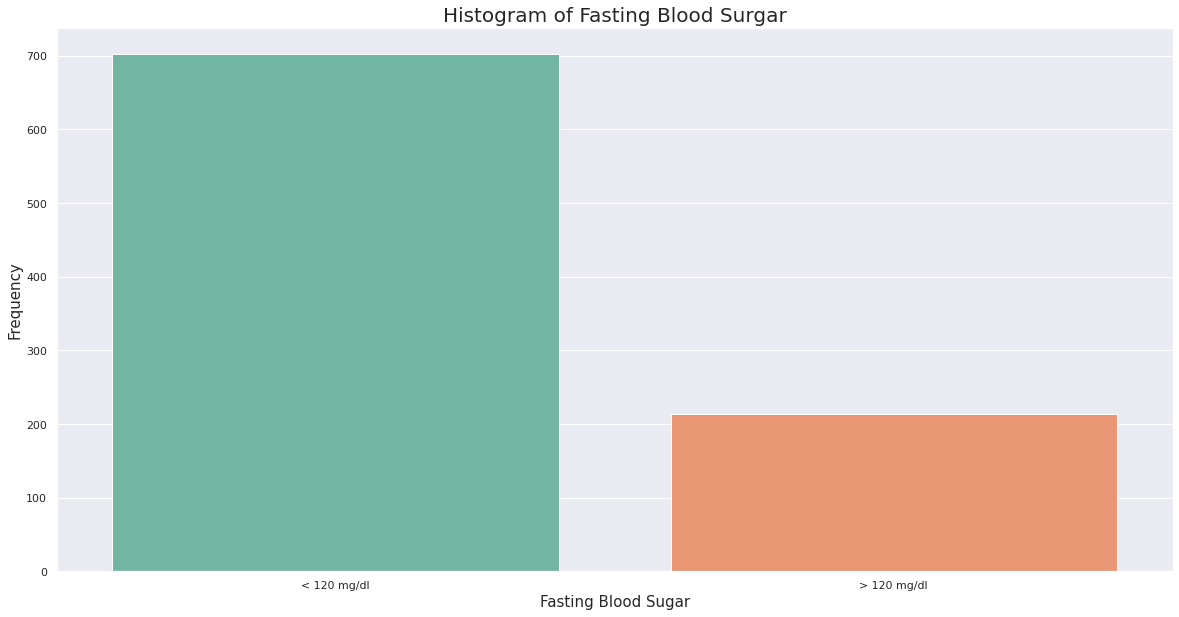

In [ ]:
fig = plt.figure(figsize=(20, 10))
sns.set_theme(style="darkgrid")
plot = sns.countplot(x='FastingBS', data = df, palette="Set2"); 
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Fasting Blood Sugar", fontsize=15)
plt.title('Histogram of Fasting Blood Surgar', fontsize=20)

Fasting Bloodsugar is also <120 in our dataset

Text(0.5, 1.0, 'Histogram of Resting ECG')

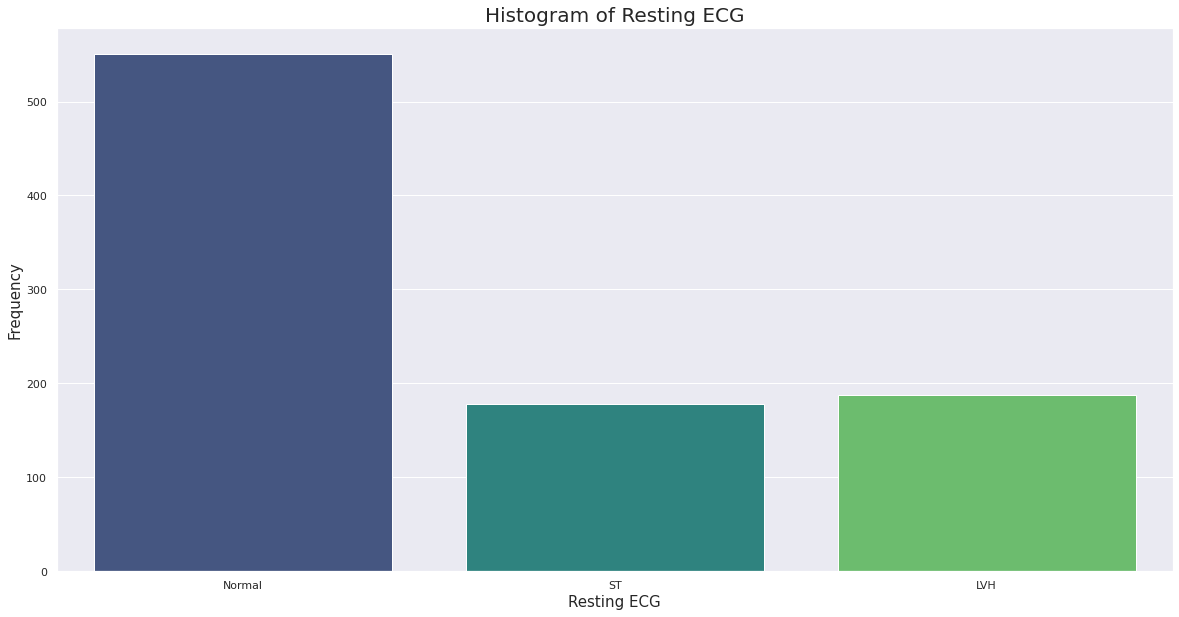

In [ ]:
fig = plt.figure(figsize=(20, 10))
#using countplot to get count of values
plot = sns.countplot(x='RestingECG', data = df, palette="viridis"); 
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Resting ECG", fontsize=15)
plt.title('Histogram of Resting ECG', fontsize=20)

Text(0.5, 1.0, 'Histogram of Exercise Angina')

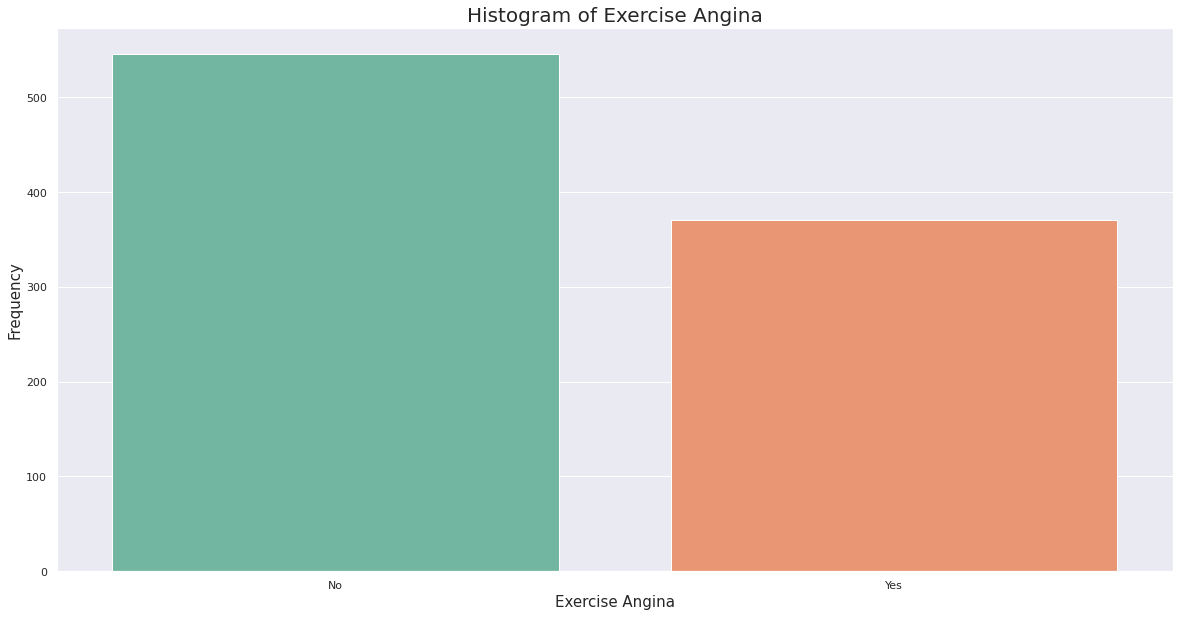

In [ ]:
fig = plt.figure(figsize=(20, 10))
#using countplot to get count of values
plot = sns.countplot(x='ExerciseAngina', data = df, palette="Set2"); 
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Exercise Angina", fontsize=15)
plt.title('Histogram of Exercise Angina', fontsize=20)

Text(0.5, 1.0, 'Histogram of ST Slope')

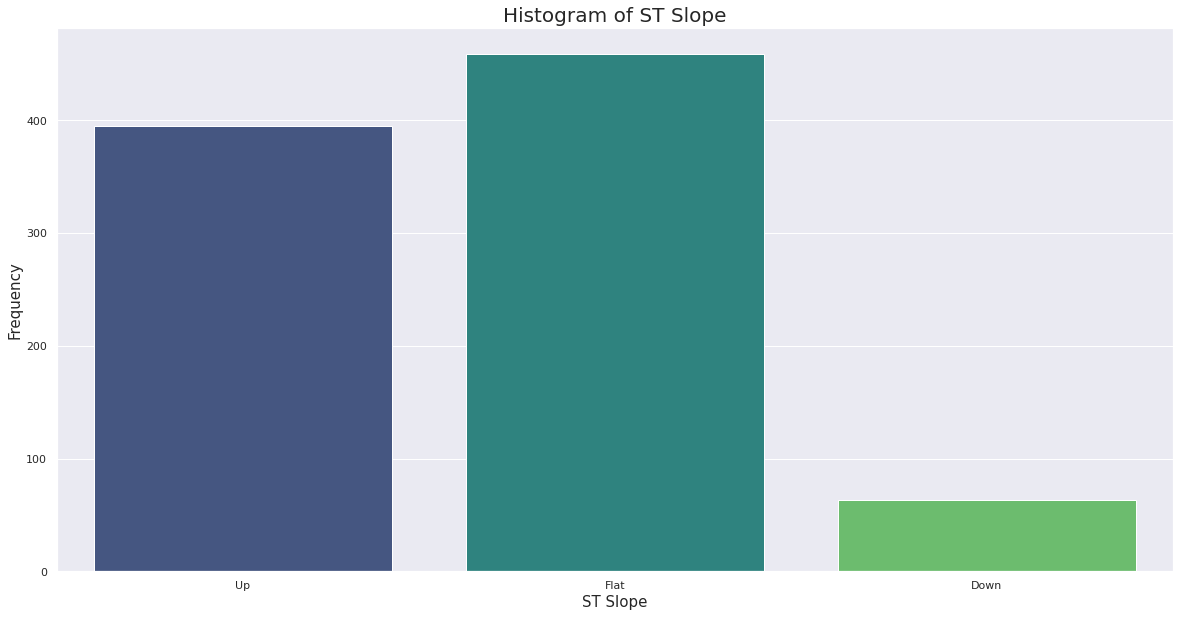

In [ ]:
fig = plt.figure(figsize=(20, 10))
#using countplot to get count of values
plot = sns.countplot(x='ST_Slope', data = df, palette="viridis"); 
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("ST Slope", fontsize=15)
plt.title('Histogram of ST Slope', fontsize=20)

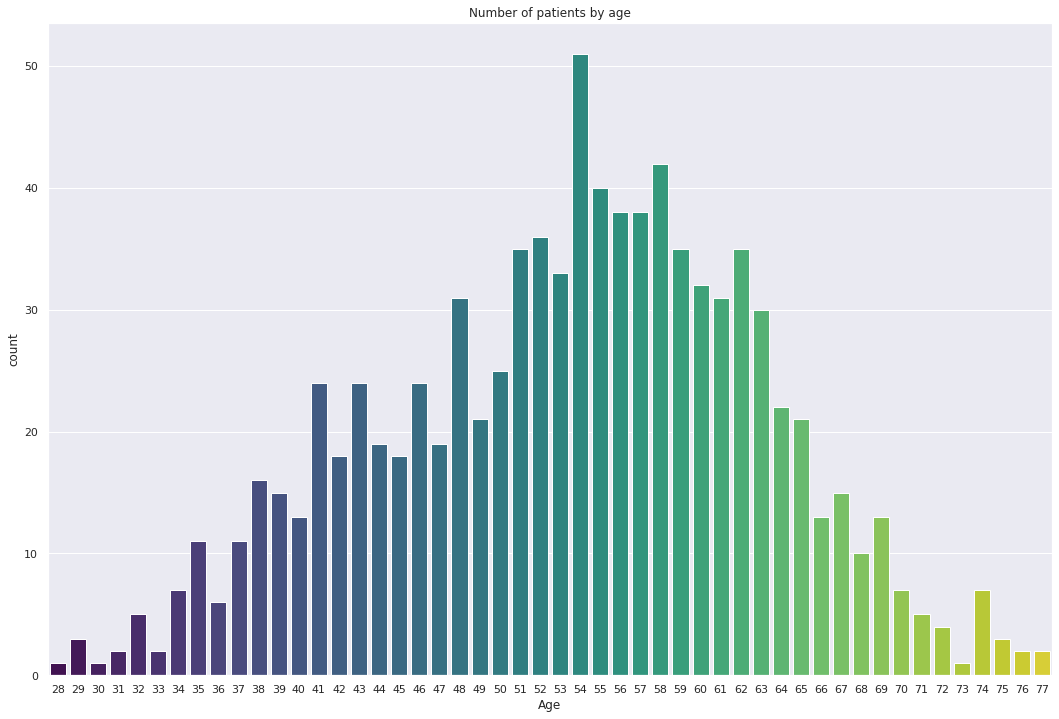

In [ ]:
plt.figure(figsize=(18,12))
chart=sns.countplot(x = 'Age', data = df, palette = "viridis")
plt.title("Number of patients by age");

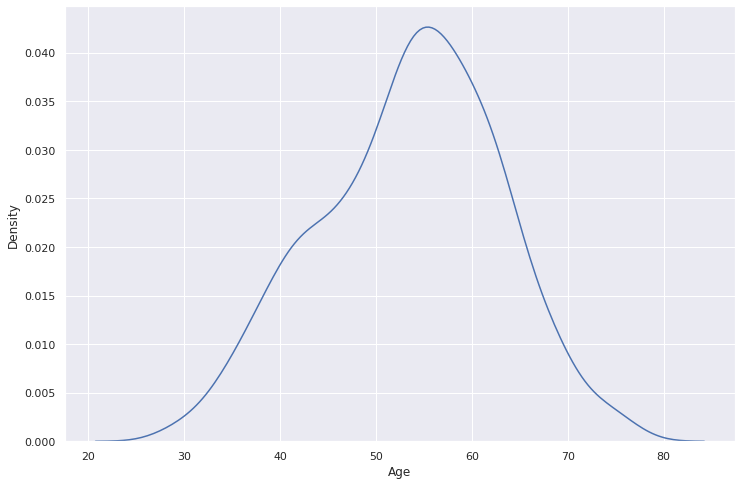

In [ ]:
plt.figure(figsize=(12,8))
chart=sns.kdeplot(x = 'Age', data = df)

<Figure size 432x288 with 0 Axes>

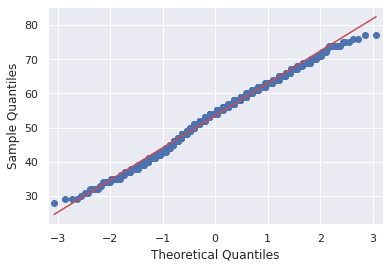

In [ ]:
plt.figure();
chart = sm.qqplot(df['Age'], line='s')
plt.show();

The distribution of age of the patients being considered is very close to normal distribution, centred near 55

## Histogram with Heart Diseases

Now that we have gotten a feel for the datasets lets see about how these categorical variables affect diagnosis of heart disease.



Text(0.5, 0, 'Gender')

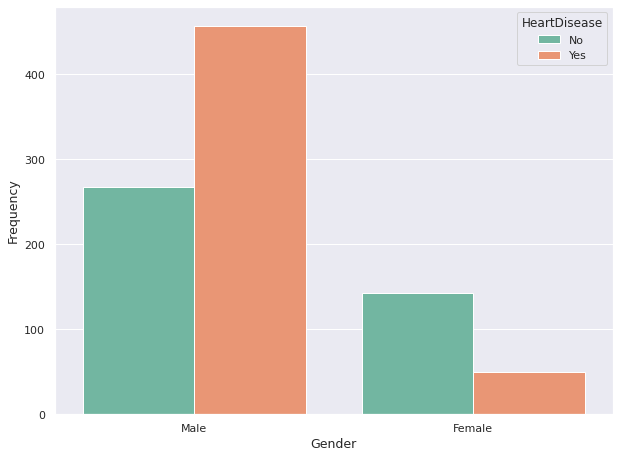

In [ ]:
fig = plt.figure(figsize=(10, 7.5))
#using countplot to get count of values and adding a hue component
plot = sns.countplot(x='Sex', hue='HeartDisease', data = df, palette="Set2"); 
plt.ylabel("Frequency", fontsize=12.5)
plt.xlabel("Gender", fontsize=12.5)
#plt.title('Histogram of Gender', fontsize=20)

We observe that a higher fraction of male's have a heart disease than females.

Text(0.5, 0, 'Chest Pain Type')

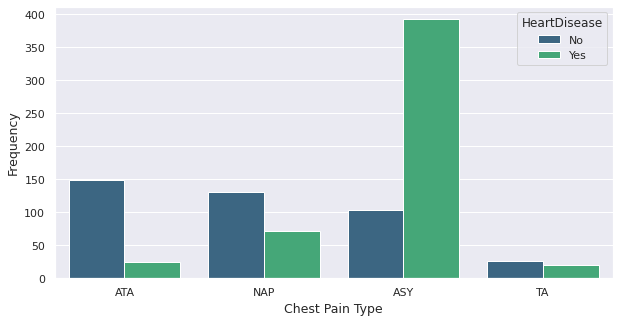

In [ ]:
fig = plt.figure(figsize=(10, 5))
#using countplot to get count of values and adding a hue component
plot = sns.countplot(x='ChestPainType', hue='HeartDisease', data = df, palette="viridis"); 
plt.ylabel("Frequency", fontsize=12.5)
plt.xlabel("Chest Pain Type", fontsize=12.5)
#plt.title('Histogram of Chest Pain Type', fontsize=15)

We observe that patients a higher fraction of people with ASY Chest pain type have heart disease than other patients with different chest pain types.

Text(0.5, 0, 'Fasting Blood Sugar')

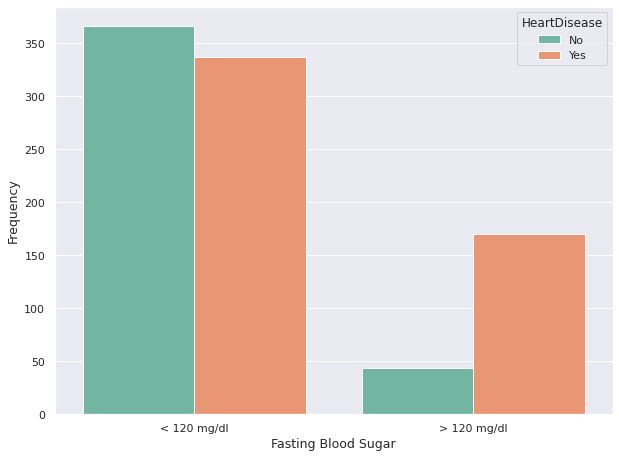

In [ ]:
fig = plt.figure(figsize=(10, 7.5))
#using countplot to get count of values and adding a hue component
plot = sns.countplot(x='FastingBS', hue='HeartDisease', data = df, palette="Set2"); 
plt.ylabel("Frequency", fontsize=12.5)
plt.xlabel("Fasting Blood Sugar", fontsize=12.5)
#plt.title('Histogram of Fasting Blood Sugar', fontsize=20)

We see that people whose Fasting Blood Sugar is above 120 mg/dl have a a higher probabilty of having a heart disease.

Text(0.5, 0, 'Resting ECG')

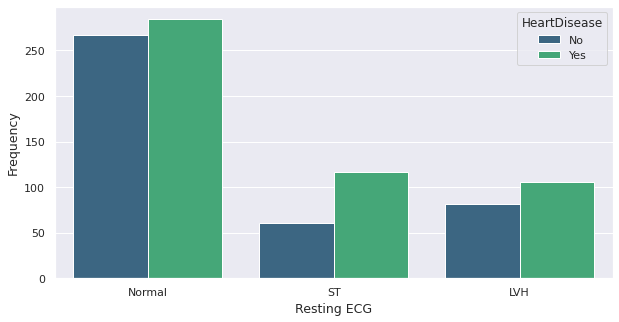

In [ ]:
fig = plt.figure(figsize=(10, 5))
#using countplot to get count of values and adding a hue component
plot = sns.countplot(x='RestingECG', hue='HeartDisease', data = df, palette="viridis"); 
plt.ylabel("Frequency", fontsize=12.5)
plt.xlabel("Resting ECG", fontsize=12.5)
#plt.title('Histogram of Resting ECG', fontsize=20)

No particular observation

Text(0.5, 0, 'Exercise Angina')

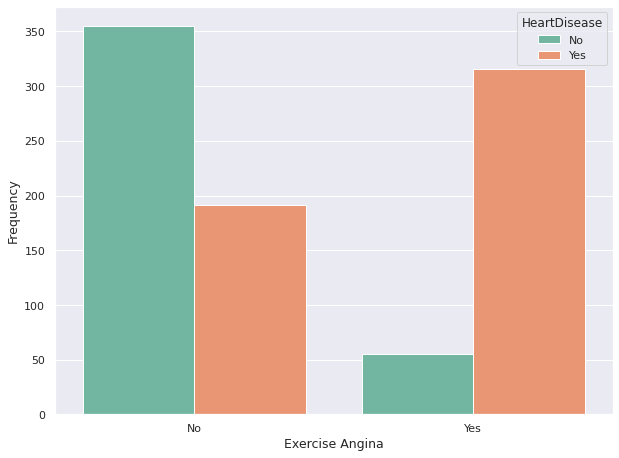

In [ ]:
fig = plt.figure(figsize=(10, 7.5))
#using countplot to get count of values and adding a hue component
plot = sns.countplot(x='ExerciseAngina', hue='HeartDisease', data = df, palette="Set2"); 
plt.ylabel("Frequency", fontsize=12.5)
plt.xlabel("Exercise Angina", fontsize=12.5)
#plt.title('Histogram of Exercise Angina', fontsize=20)

Here also we observe that a higher percentage of people having Exercise Angina have heart disease.

Text(0.5, 0, 'ST Slope')

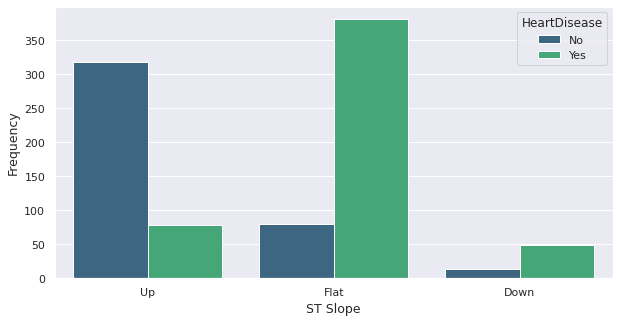

In [ ]:
fig = plt.figure(figsize=(10, 5))
#using countplot to get count of values and adding a hue component
plot = sns.countplot(x='ST_Slope', hue='HeartDisease', data = df, palette="viridis"); 
plt.ylabel("Frequency", fontsize=12.5)
plt.xlabel("ST Slope", fontsize=12.5)
#plt.title('Histogram of ST Slope', fontsize=20)

Here again the categort with Up ST slope have a lower percentage of people having heart disease as compared to Flat or Down ST Slope

## Box and Whiskers Plot of continous variables

### Box and Whiskers Plot for Resting BP

Text(0.5, 1.0, 'BoxPlots of Resting Blood Pressure')

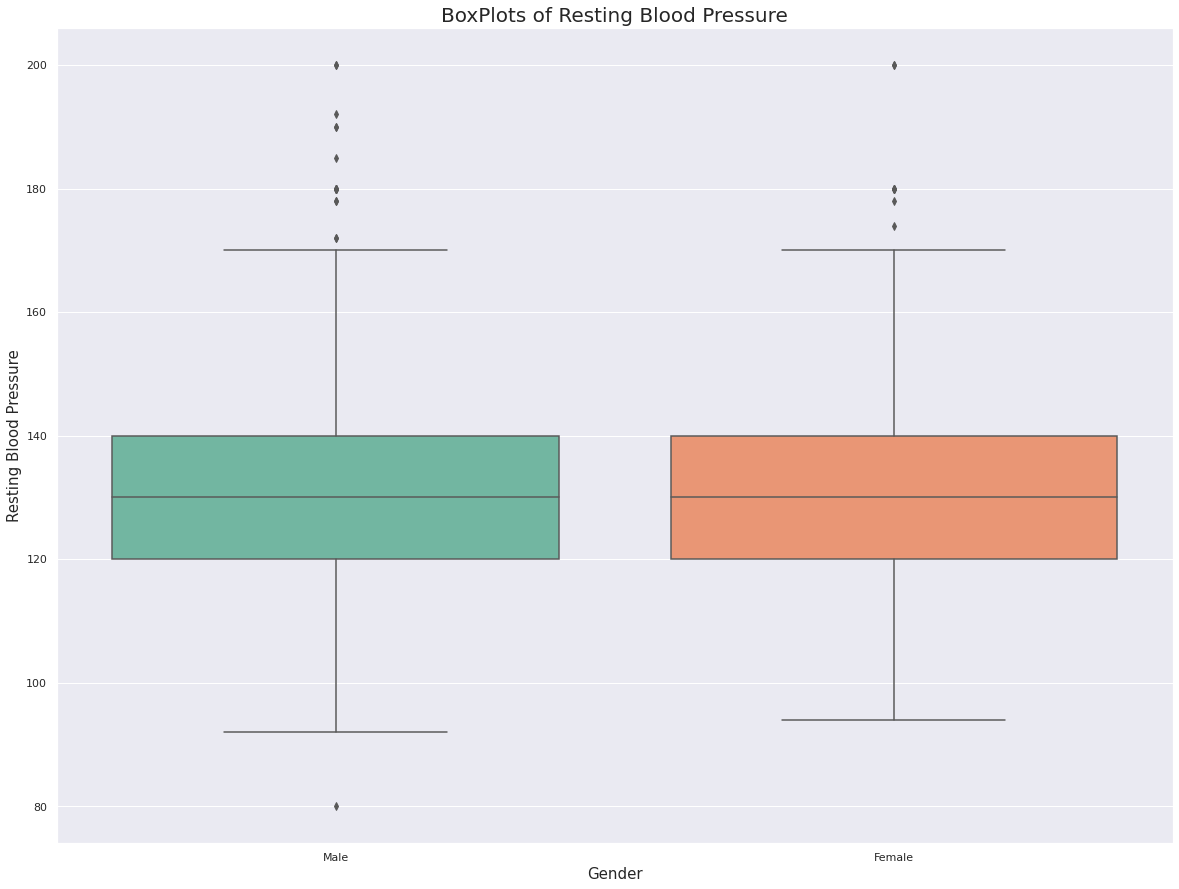

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
plot = sns.boxplot(x='Sex', y='RestingBP', data = df, palette="Set2"); 
plt.ylabel("Resting Blood Pressure", fontsize=15)
plt.xlabel("Gender", fontsize=15)
plt.title('BoxPlots of Resting Blood Pressure', fontsize=20)

Overall both male and female Resing Heart Rate are Similar

Text(0.5, 1.0, 'BoxPlots of Resting Blood Pressure')

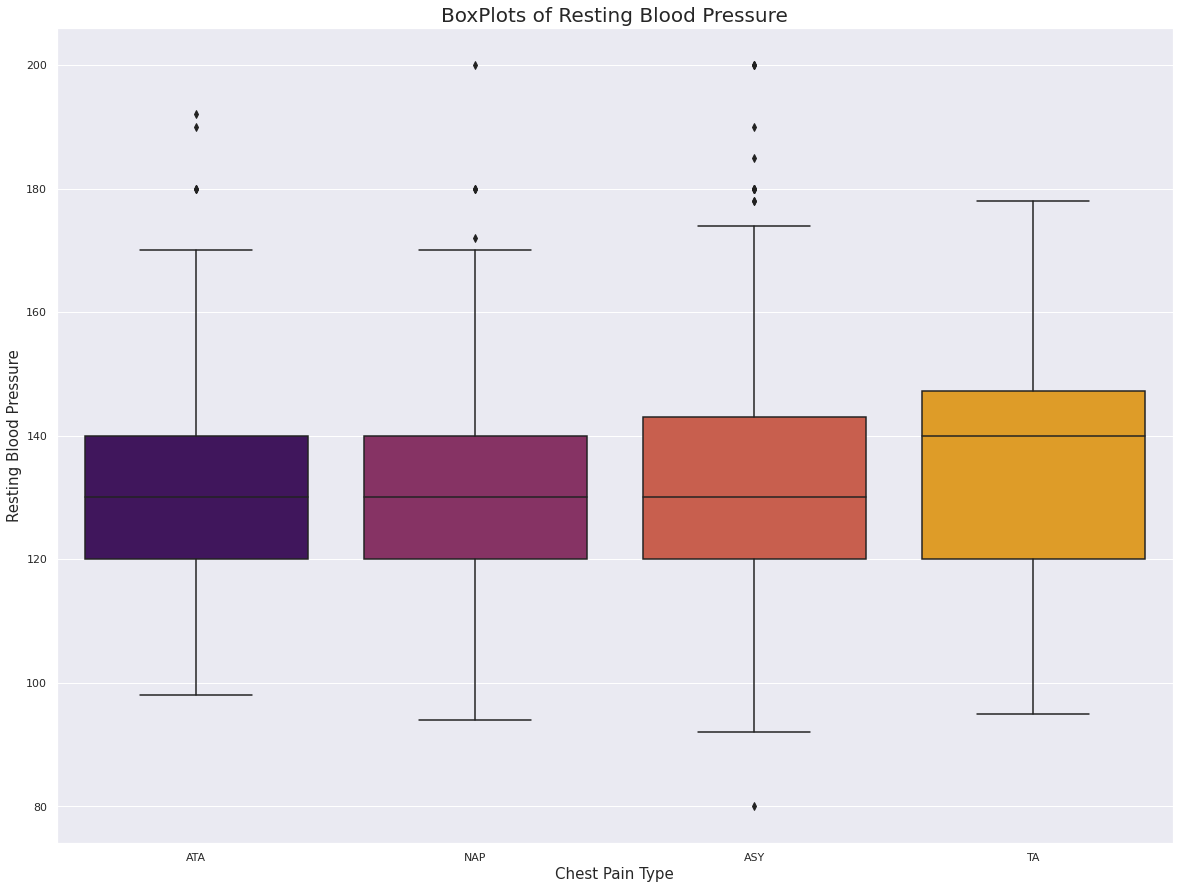

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
plot = sns.boxplot(x='ChestPainType', y='RestingBP', data = df, palette="inferno"); 
plt.ylabel("Resting Blood Pressure", fontsize=15)
plt.xlabel("Chest Pain Type", fontsize=15)
plt.title('BoxPlots of Resting Blood Pressure', fontsize=20)

We see that the Median Resting Blood Pressure is higher for patients with chest pain type of TA

Text(0.5, 1.0, 'BoxPlots of Resting Blood Pressure')

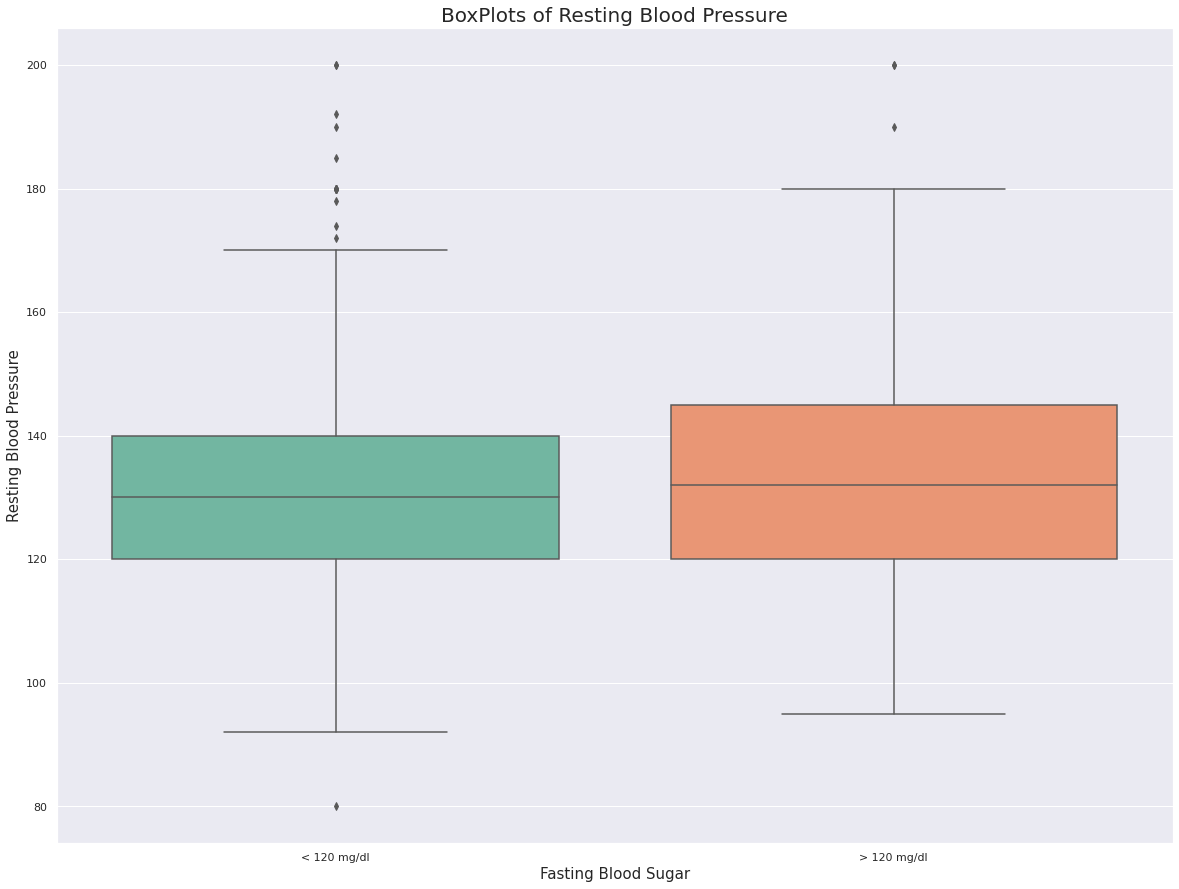

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='FastingBS', y='RestingBP', data = df, palette="Set2"); 
plt.ylabel("Resting Blood Pressure", fontsize=15)
plt.xlabel("Fasting Blood Sugar", fontsize=15)
plt.title('BoxPlots of Resting Blood Pressure', fontsize=20)

No significant Observation

Text(0.5, 1.0, 'BoxPlots of Resting Blood Pressure')

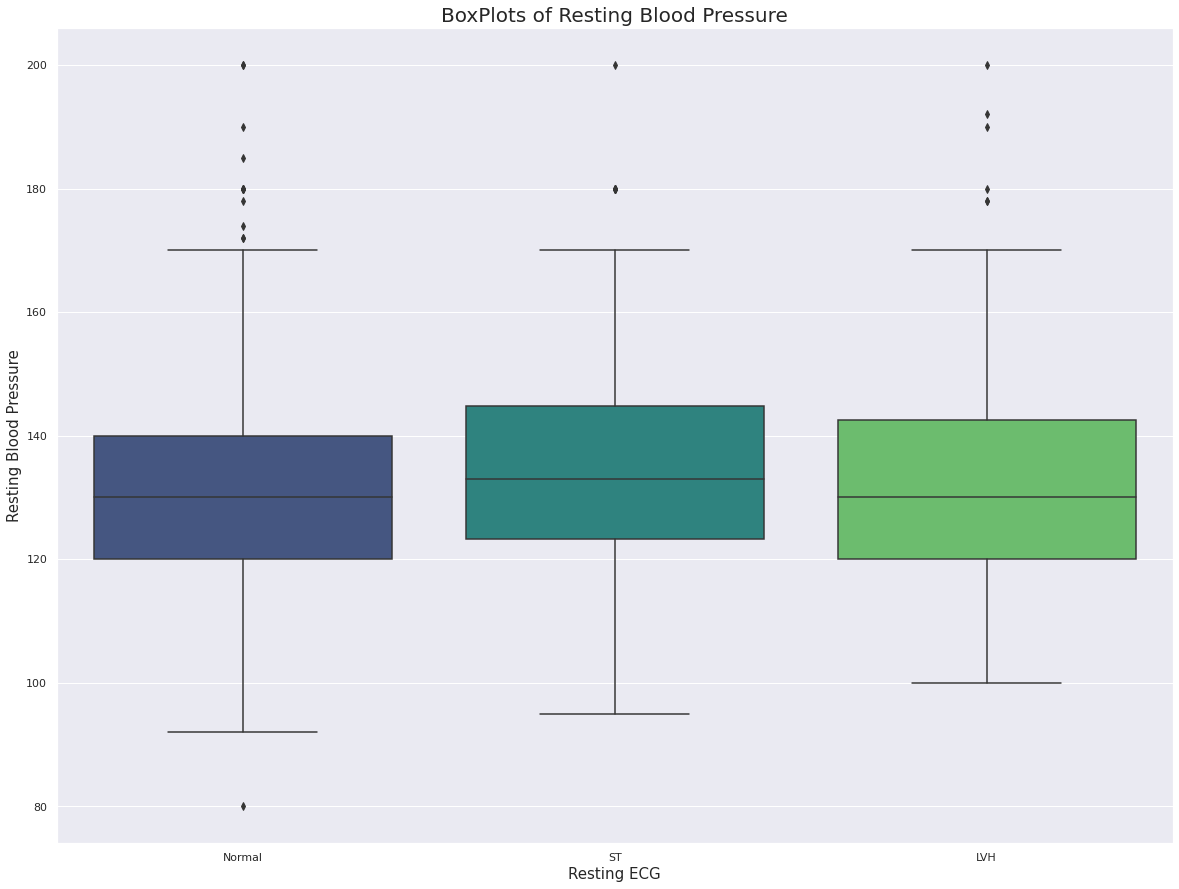

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='RestingECG', y='RestingBP', data = df, palette="viridis"); 
plt.ylabel("Resting Blood Pressure", fontsize=15)
plt.xlabel("Resting ECG", fontsize=15)
plt.title('BoxPlots of Resting Blood Pressure', fontsize=20)

No significant Observation

Text(0.5, 1.0, 'BoxPlots of Resting Blood Pressure')

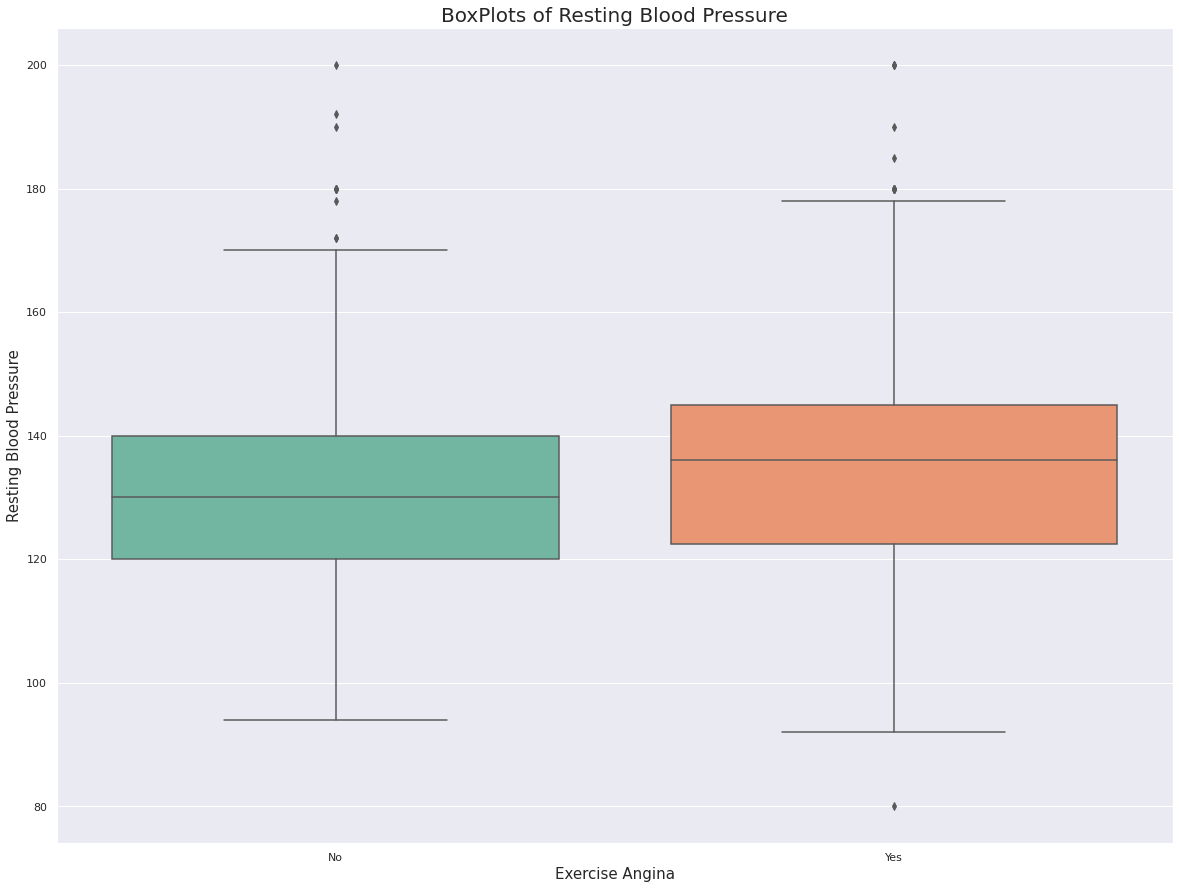

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='ExerciseAngina', y='RestingBP', data = df, palette="Set2"); 
plt.ylabel("Resting Blood Pressure", fontsize=15)
plt.xlabel("Exercise Angina", fontsize=15)
plt.title('BoxPlots of Resting Blood Pressure', fontsize=20)

We see that patients with Exercise Angina have a higher resting blood pressure.

Text(0.5, 1.0, 'BoxPlots of Resting Blood Pressure')

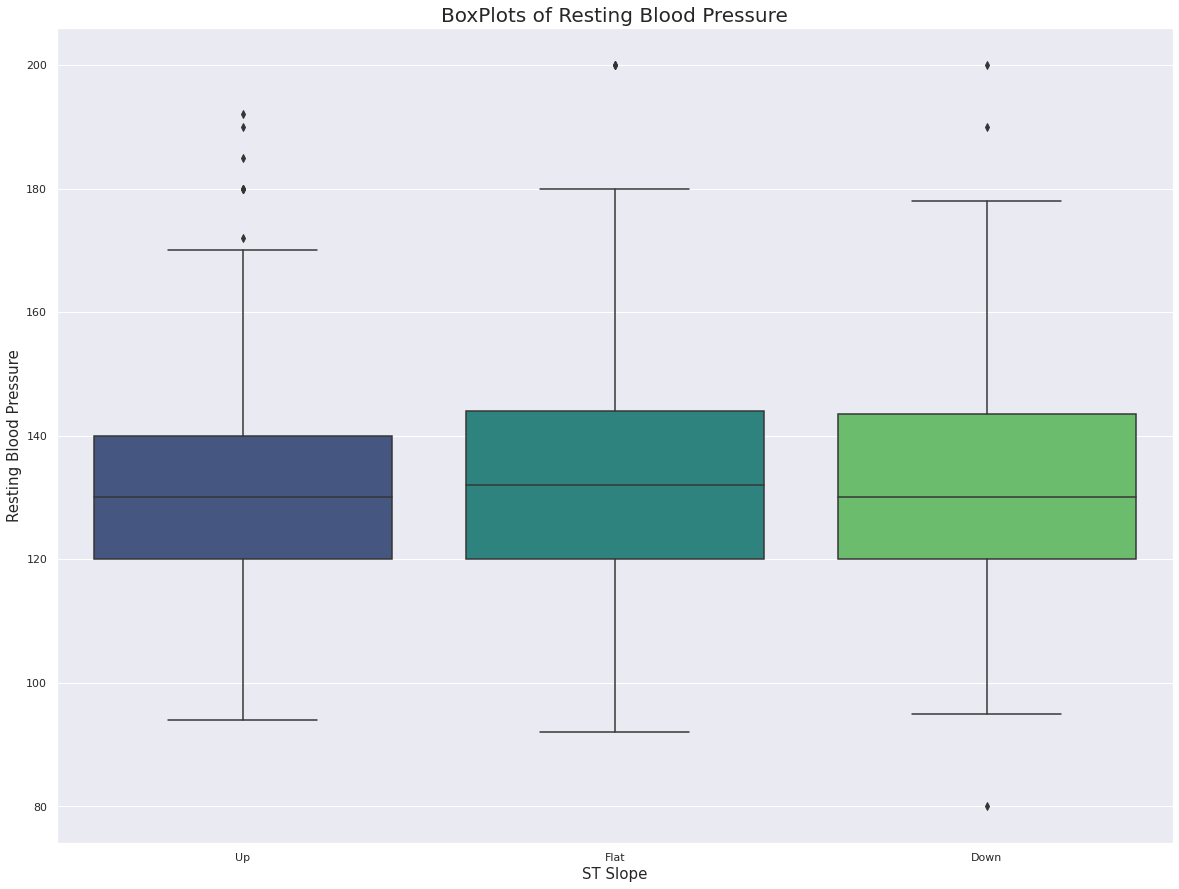

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='ST_Slope', y='RestingBP', data = df, palette="viridis"); 
plt.ylabel("Resting Blood Pressure", fontsize=15)
plt.xlabel("ST Slope", fontsize=15)
plt.title('BoxPlots of Resting Blood Pressure', fontsize=20)

No significant Observation

### Box and Whiskers Plot for Cholestrol

Text(0.5, 1.0, 'BoxPlots of Cholesterol')

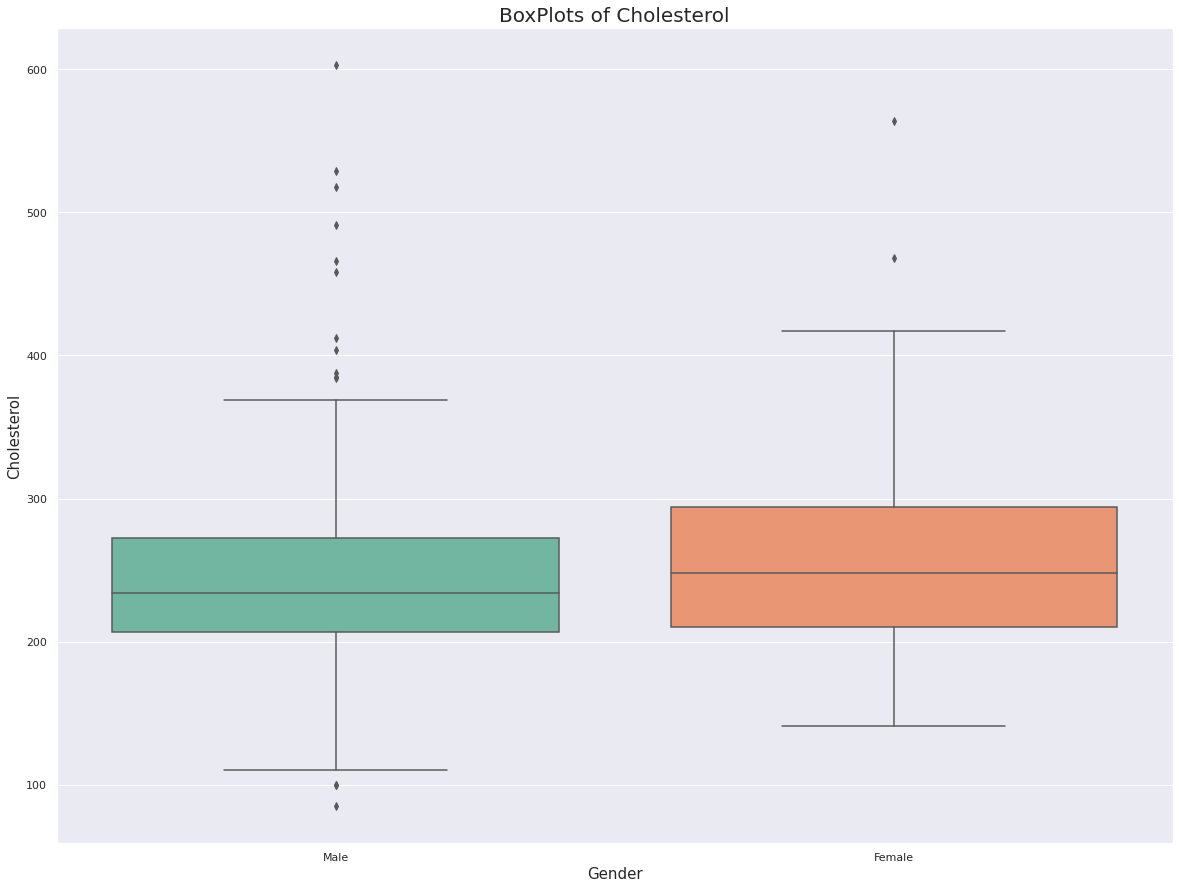

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
plot = sns.boxplot(x='Sex', y='Cholesterol', data = df_chol, palette="Set2"); 
plt.ylabel("Cholesterol", fontsize=15)
plt.xlabel("Gender", fontsize=15)
plt.title('BoxPlots of Cholesterol', fontsize=20)

No significant Observation

Text(0.5, 1.0, 'BoxPlots of Cholesterol')

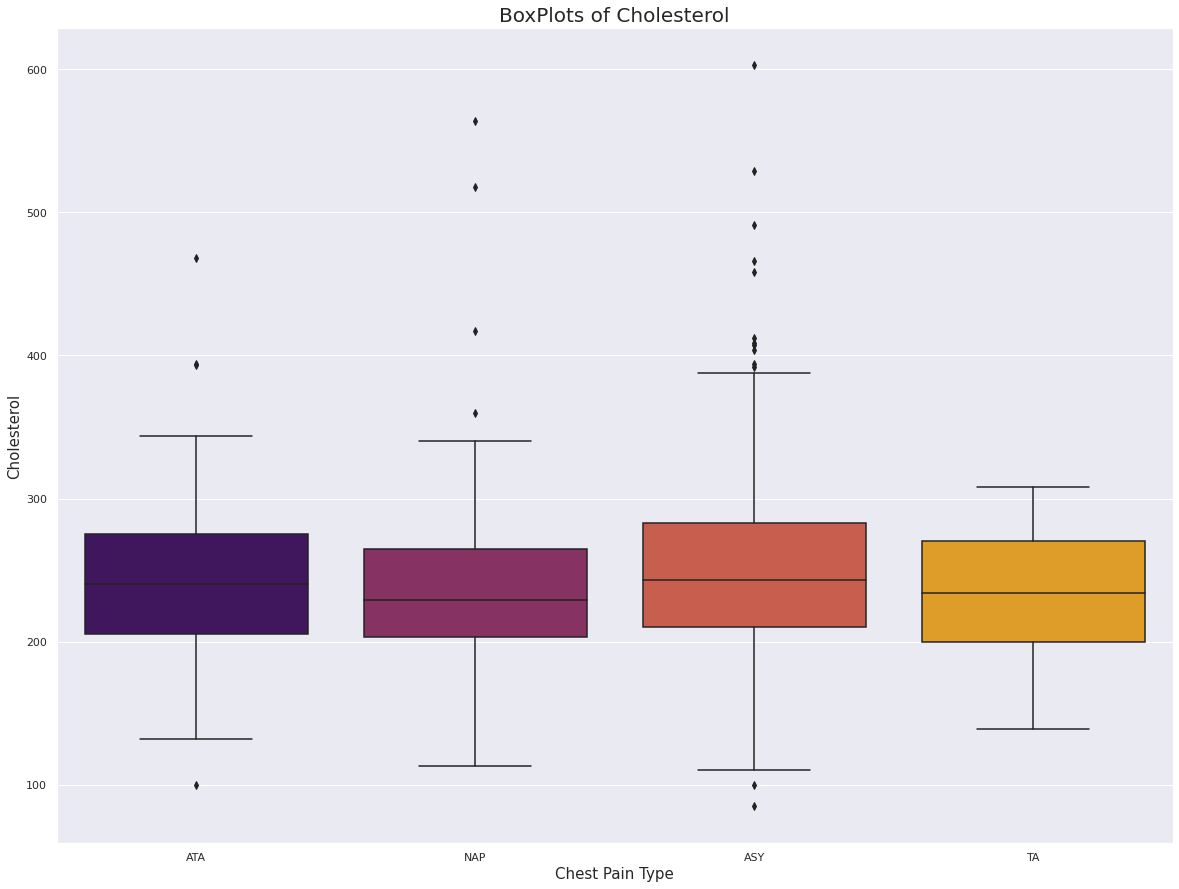

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
plot = sns.boxplot(x='ChestPainType', y='Cholesterol', data = df_chol, palette="inferno"); 
plt.ylabel("Cholesterol", fontsize=15)
plt.xlabel("Chest Pain Type", fontsize=15)
plt.title('BoxPlots of Cholesterol', fontsize=20)

No significant Observation

Text(0.5, 1.0, 'BoxPlots of Cholesterol')

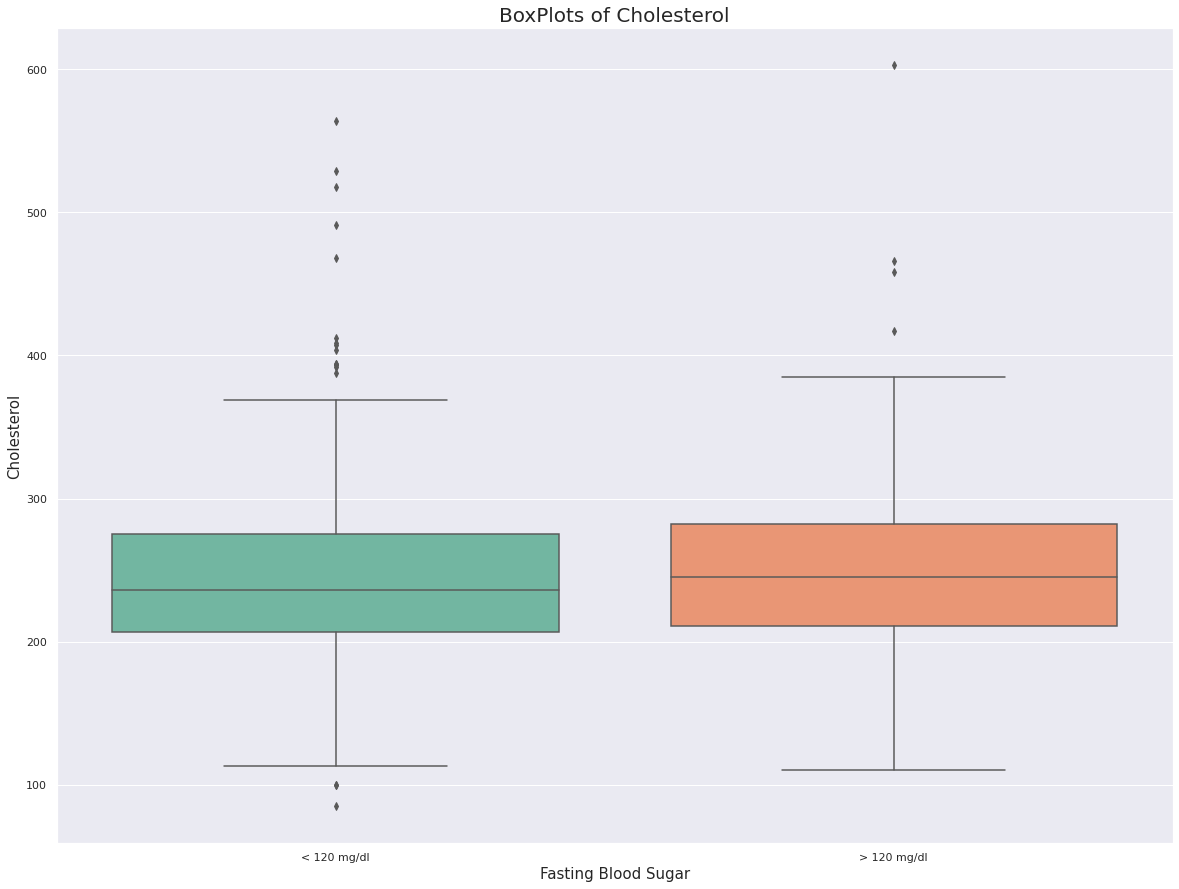

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
plot = sns.boxplot(x='FastingBS', y='Cholesterol', data = df_chol, palette="Set2"); 
plt.ylabel("Cholesterol", fontsize=15)
plt.xlabel("Fasting Blood Sugar", fontsize=15)
plt.title('BoxPlots of Cholesterol', fontsize=20)

No significant Observation

Text(0.5, 1.0, 'BoxPlots of Cholesterol')

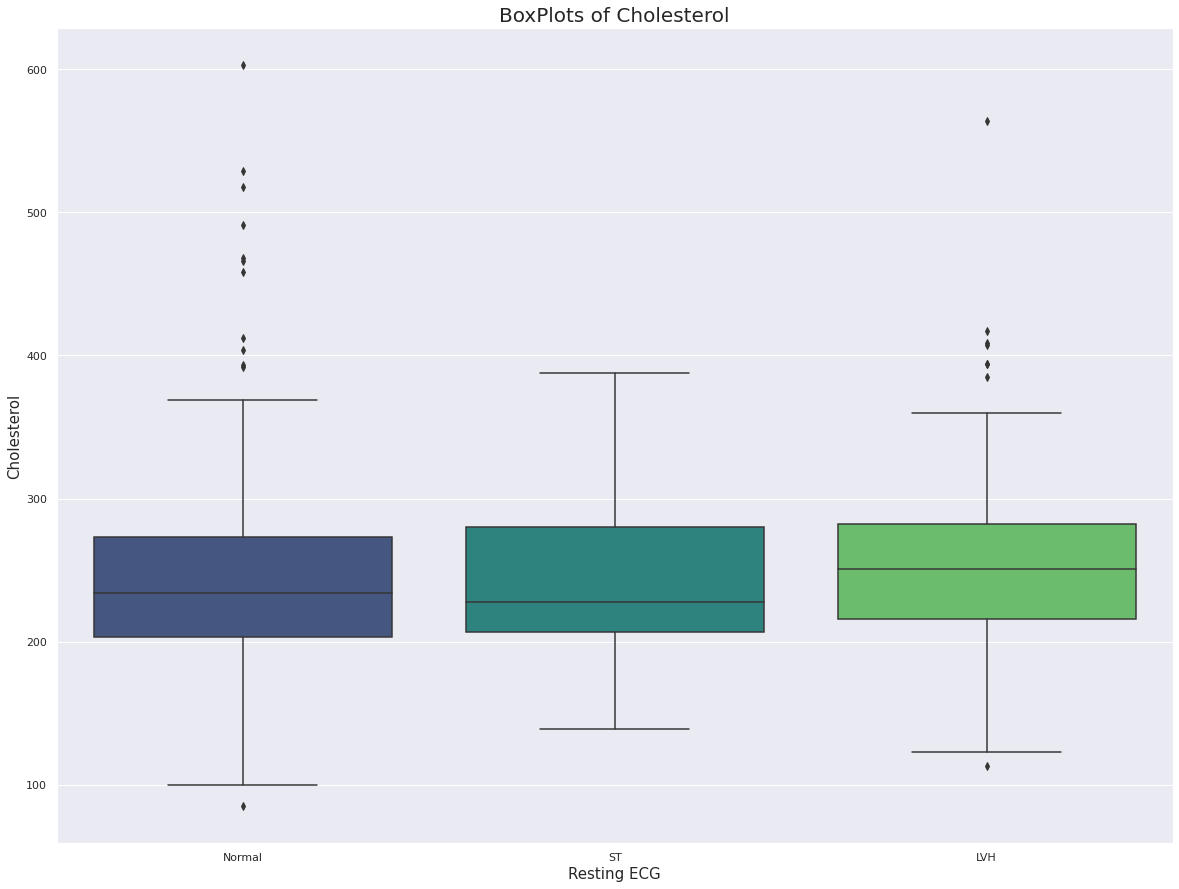

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
plot = sns.boxplot(x='RestingECG', y='Cholesterol', data = df_chol, palette="viridis"); 
plt.ylabel("Cholesterol", fontsize=15)
plt.xlabel("Resting ECG", fontsize=15)
plt.title('BoxPlots of Cholesterol', fontsize=20)

No significant Observation

Text(0.5, 1.0, 'BoxPlots of Cholesterol')

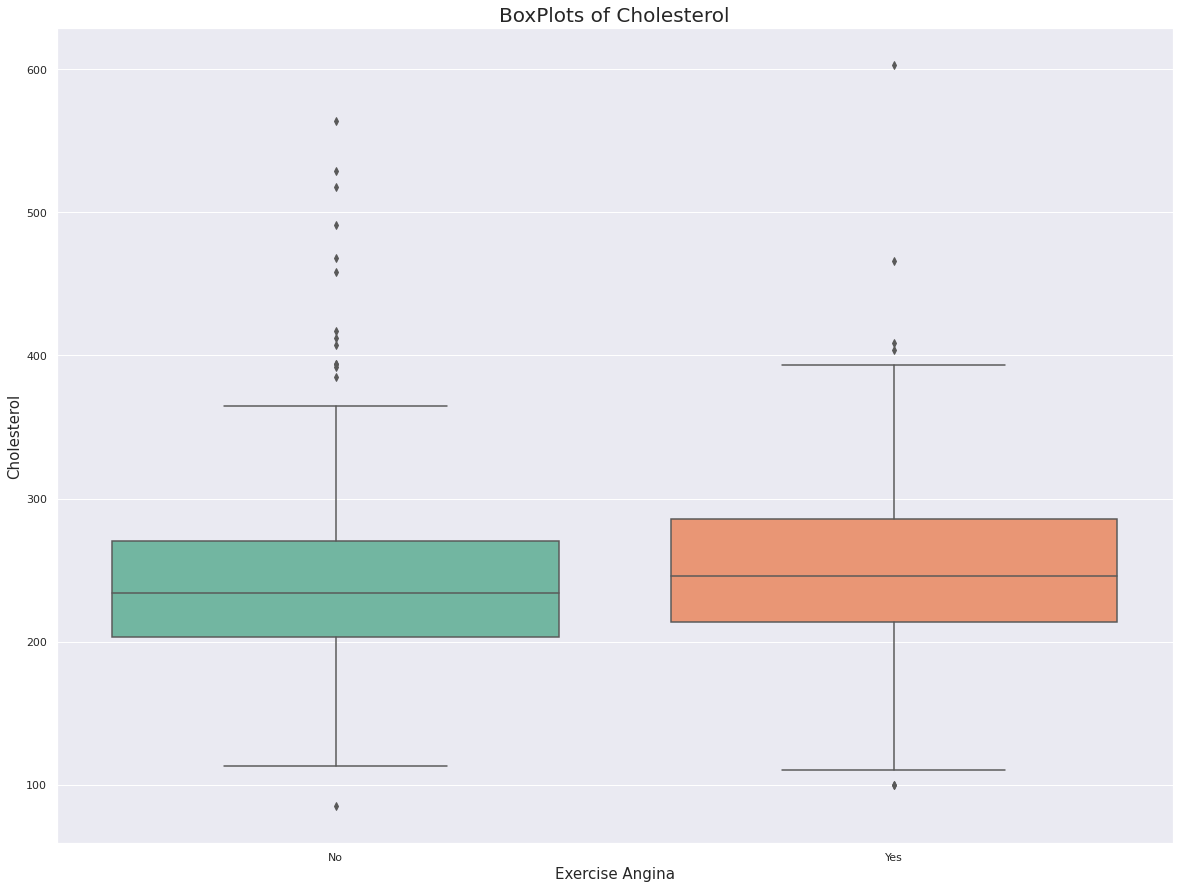

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
plot = sns.boxplot(x='ExerciseAngina', y='Cholesterol', data = df_chol, palette="Set2"); 
plt.ylabel("Cholesterol", fontsize=15)
plt.xlabel("Exercise Angina", fontsize=15)
plt.title('BoxPlots of Cholesterol', fontsize=20)

No significant Observation

Text(0.5, 1.0, 'BoxPlots of Cholesterol')

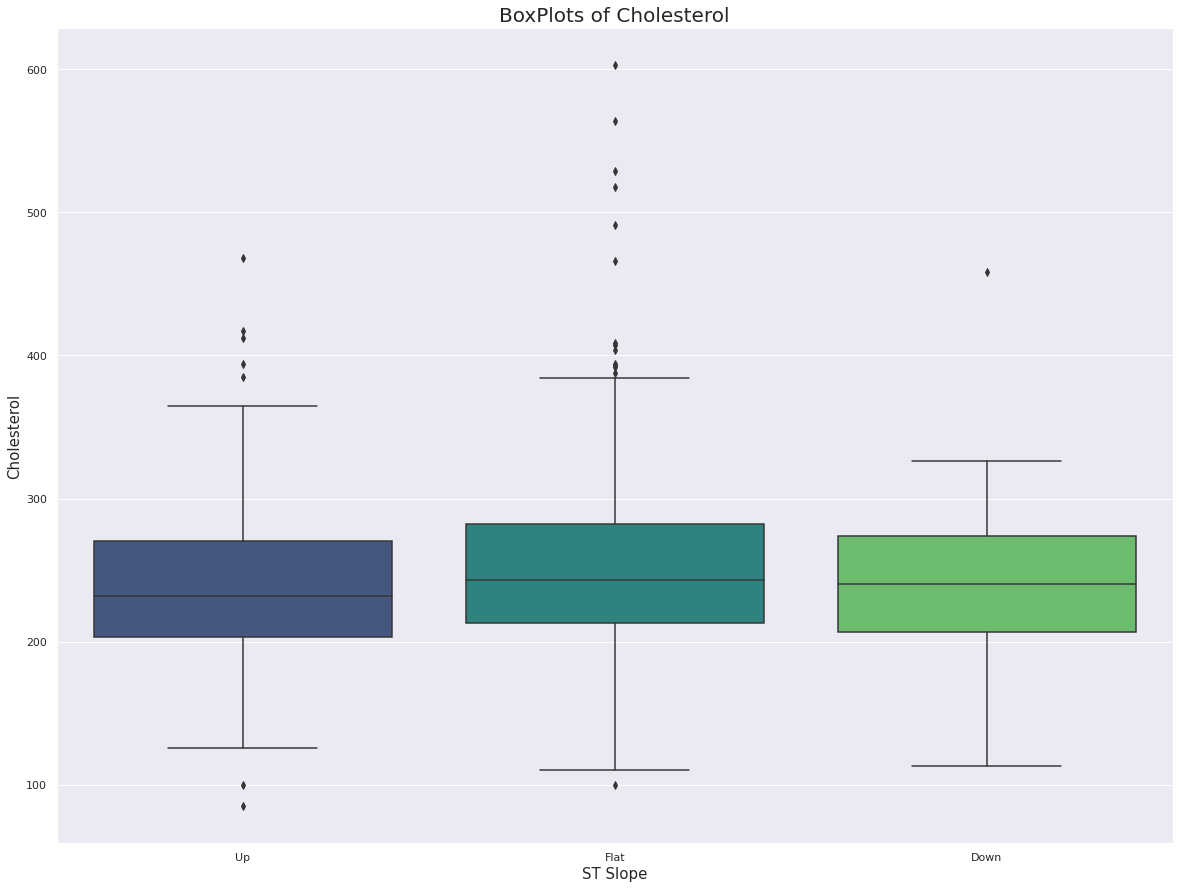

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
plot = sns.boxplot(x='ST_Slope', y='Cholesterol', data = df_chol, palette="viridis"); 
plt.ylabel("Cholesterol", fontsize=15)
plt.xlabel("ST Slope", fontsize=15)
plt.title('BoxPlots of Cholesterol', fontsize=20)

No significant Observation

### Box and Whiskers Plot for Age

Text(0.5, 1.0, 'BoxPlots of Age')

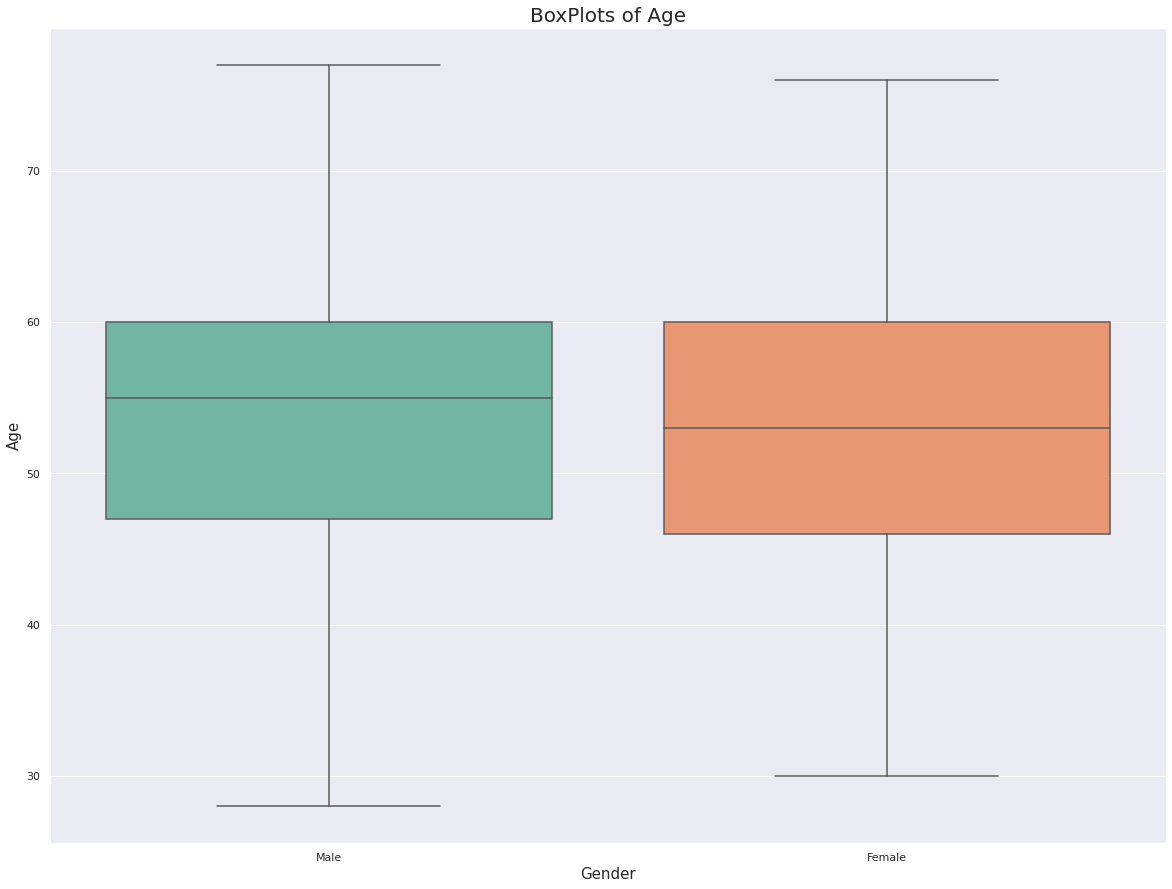

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='Sex', y='Age', data = df, palette="Set2"); 
plt.ylabel("Age", fontsize=15)
plt.xlabel("Gender", fontsize=15)
plt.title('BoxPlots of Age', fontsize=20)

No significant Observation

Text(0.5, 1.0, 'BoxPlots of Age')

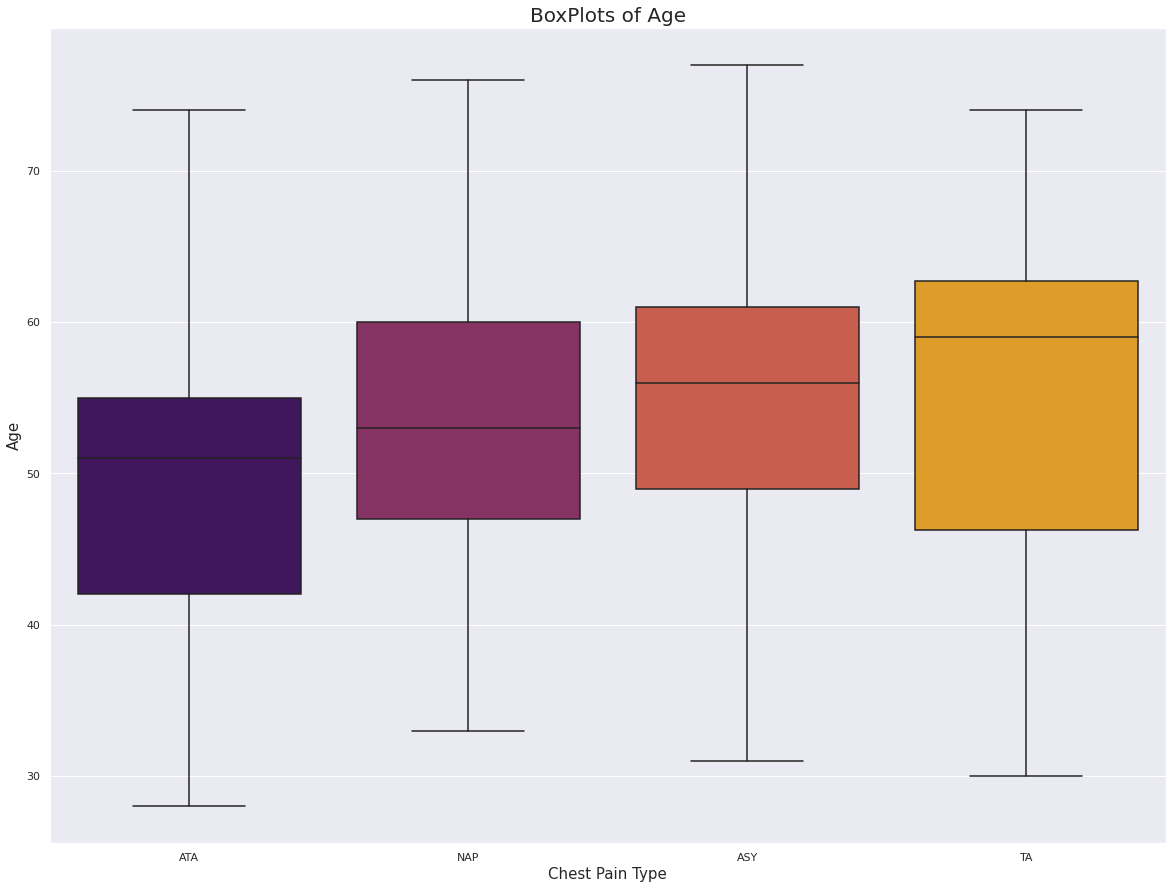

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='ChestPainType', y='Age', data = df, palette="inferno"); 
plt.ylabel("Age", fontsize=15)
plt.xlabel("Chest Pain Type", fontsize=15)
plt.title('BoxPlots of Age', fontsize=20)

We see that people with chest pain type of TA have a higher median age than others

Text(0.5, 1.0, 'BoxPlots of Age')

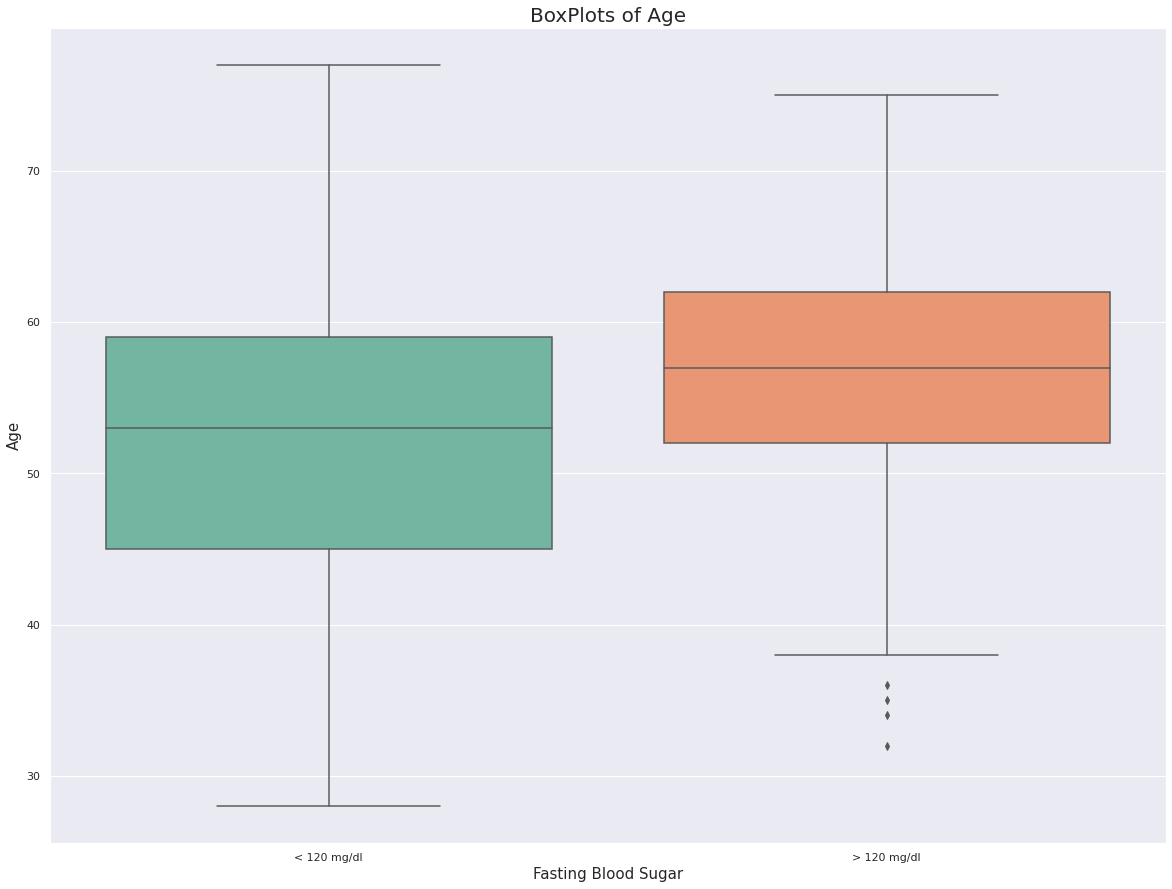

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='FastingBS', y='Age', data = df, palette="Set2"); 
plt.ylabel("Age", fontsize=15)
plt.xlabel("Fasting Blood Sugar", fontsize=15)
plt.title('BoxPlots of Age', fontsize=20)

We can see that people with fasitng blood sugar >120 have a higher median age

Text(0.5, 1.0, 'BoxPlots of Age')

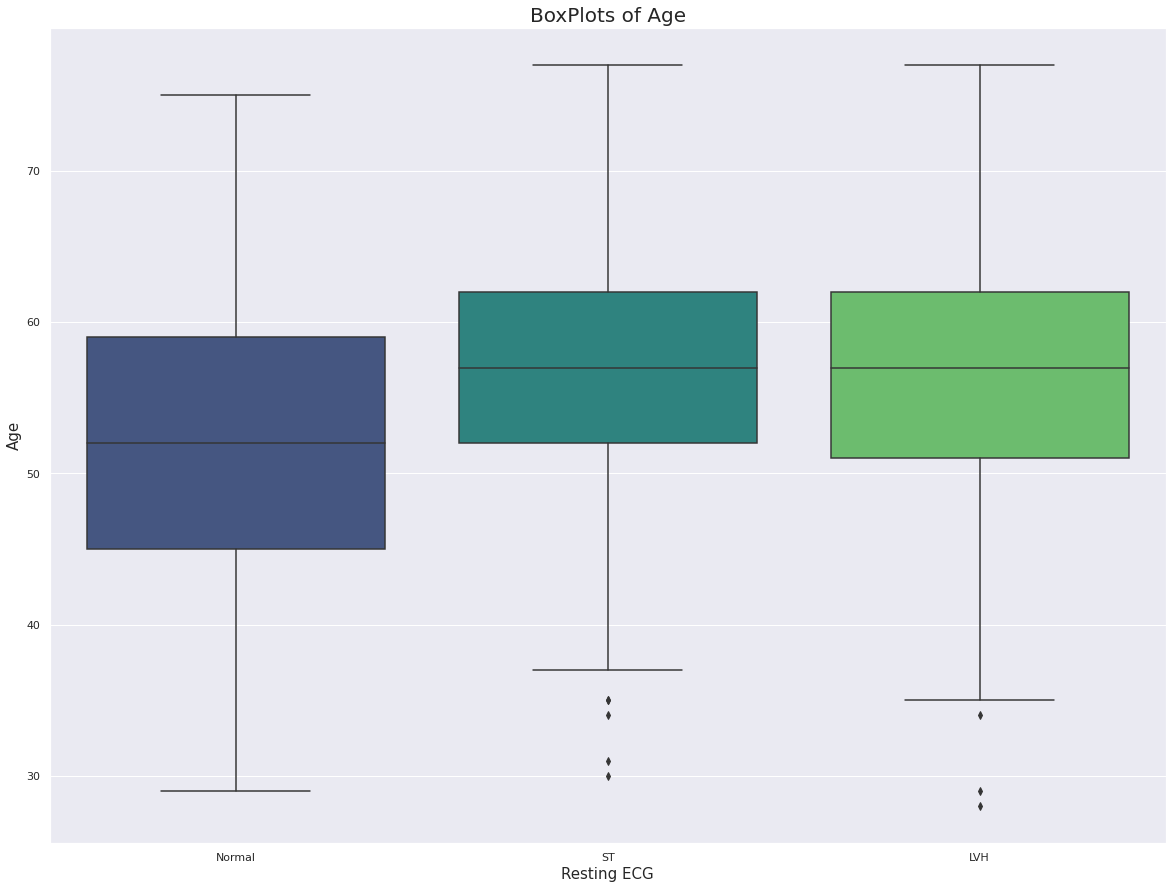

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='RestingECG', y='Age', data = df, palette="viridis"); 
plt.ylabel("Age", fontsize=15)
plt.xlabel("Resting ECG", fontsize=15)
plt.title('BoxPlots of Age', fontsize=20)

No significant Observation

Text(0.5, 1.0, 'BoxPlots of Age')

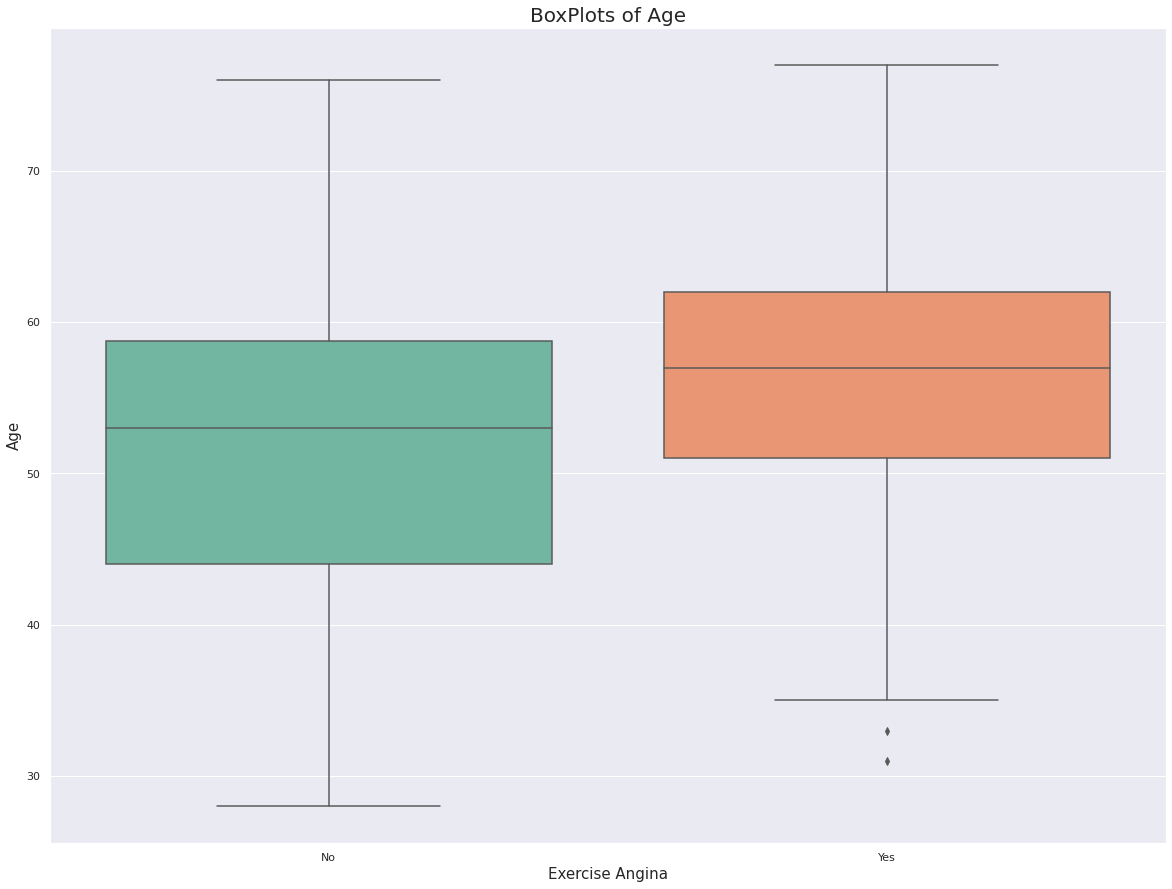

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='ExerciseAngina', y='Age', data = df, palette="Set2"); 
plt.ylabel("Age", fontsize=15)
plt.xlabel("Exercise Angina", fontsize=15)
plt.title('BoxPlots of Age', fontsize=20)

People with Exercise Angina have a higher median age

Text(0.5, 1.0, 'BoxPlots of Age')

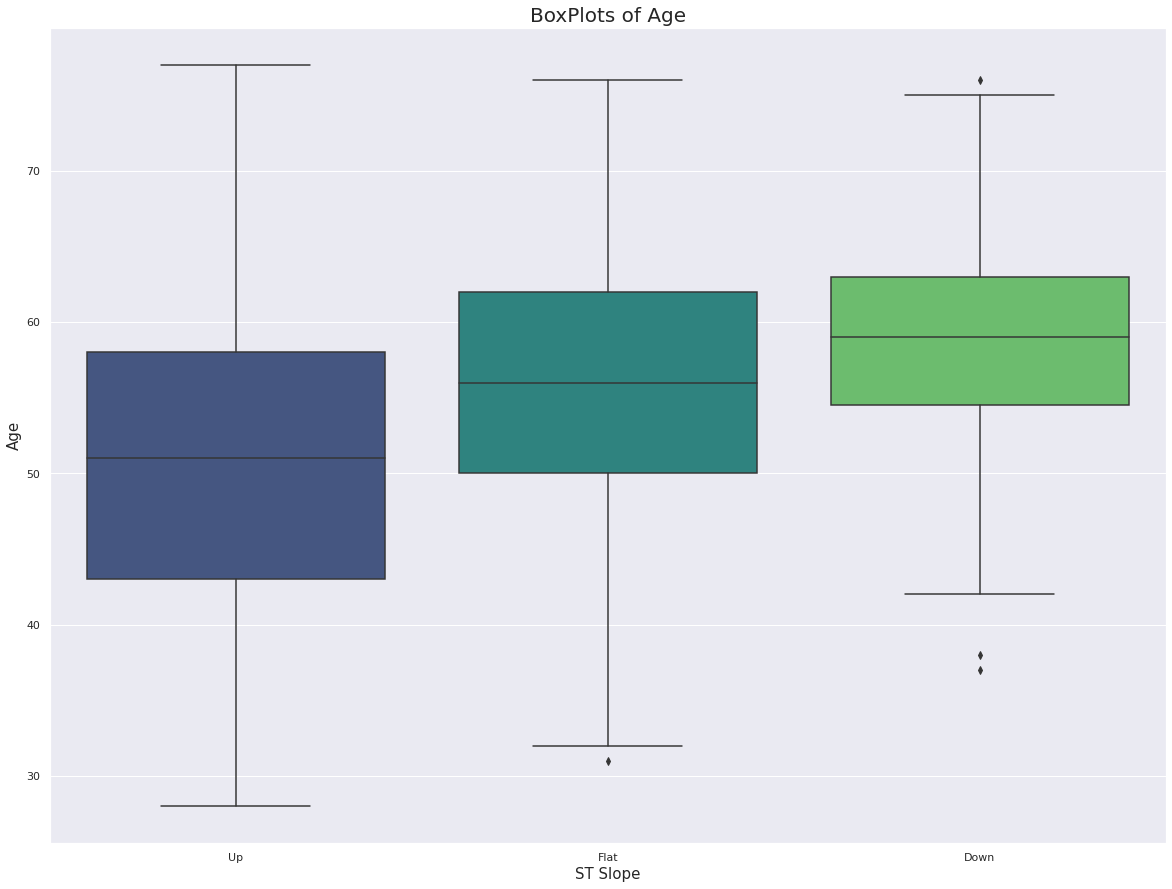

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='ST_Slope', y='Age', data = df, palette="viridis"); 
plt.ylabel("Age", fontsize=15)
plt.xlabel("ST Slope", fontsize=15)
plt.title('BoxPlots of Age', fontsize=20)

### Box and Whiskers Plot for Maximum Heart Rate

Text(0.5, 1.0, 'BoxPlots of Maximum Heart Rate')

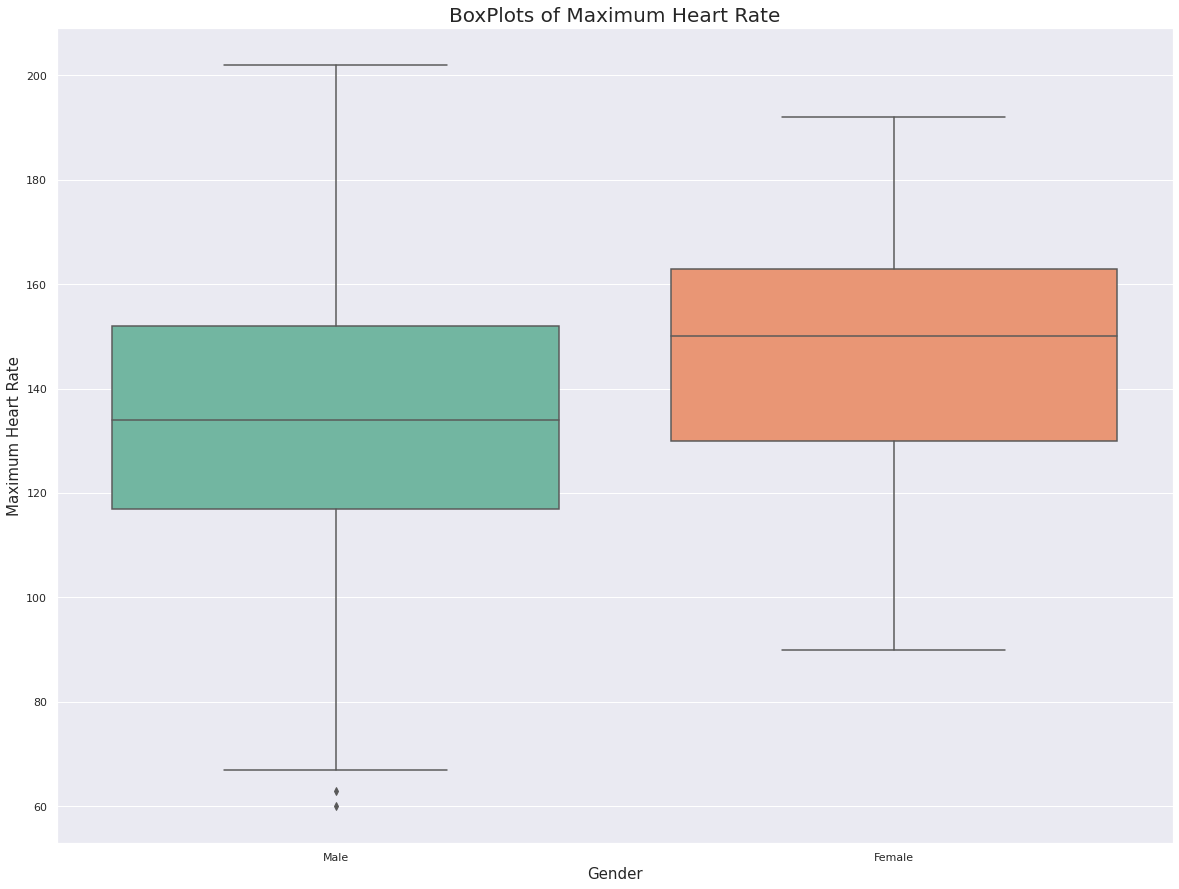

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='Sex', y='MaxHR', data = df, palette="Set2"); 
plt.ylabel("Maximum Heart Rate", fontsize=15)
plt.xlabel("Gender", fontsize=15)
plt.title('BoxPlots of Maximum Heart Rate', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Maximum Heart Rate')

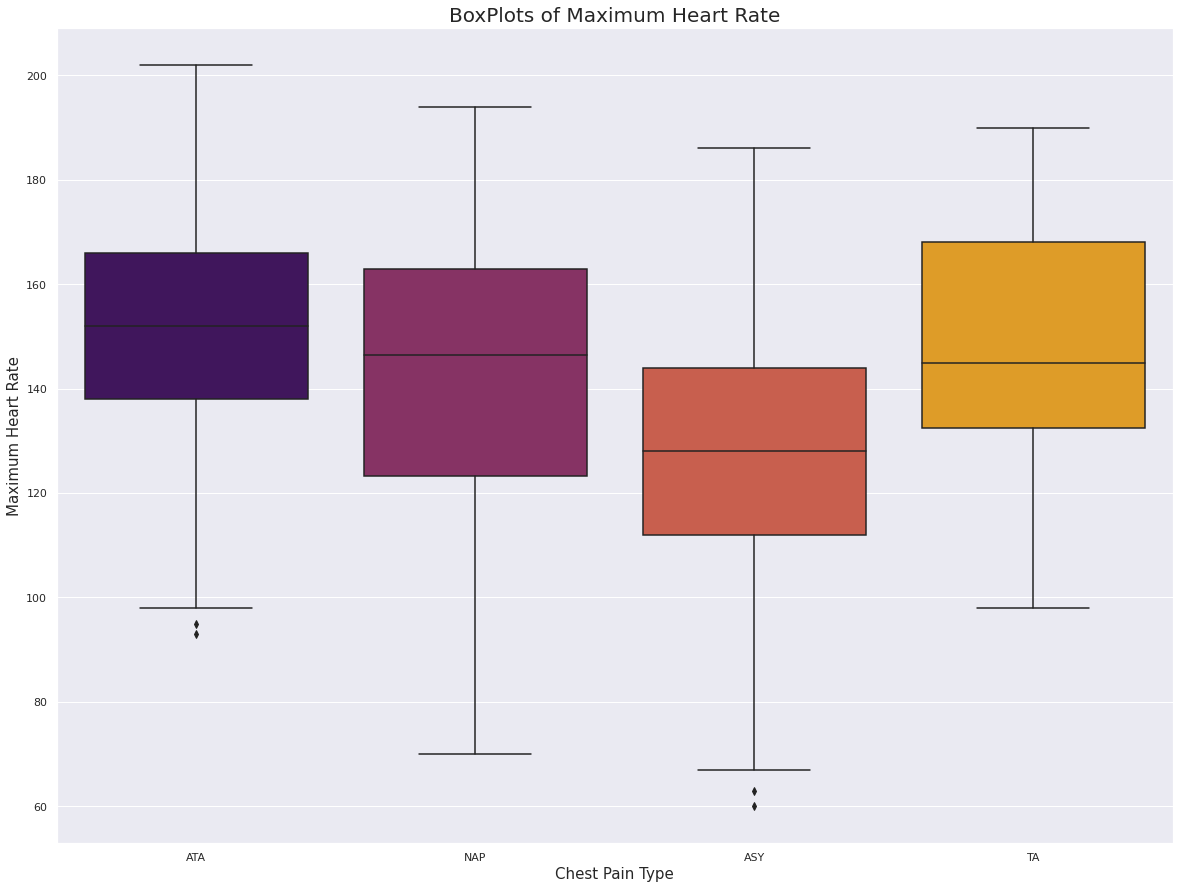

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='ChestPainType', y='MaxHR', data = df, palette="inferno"); 
plt.ylabel("Maximum Heart Rate", fontsize=15)
plt.xlabel("Chest Pain Type", fontsize=15)
plt.title('BoxPlots of Maximum Heart Rate', fontsize=20)

Asymptomatic Type have a lower Heart Rate

Text(0.5, 1.0, 'BoxPlots of Maximum Heart Rate')

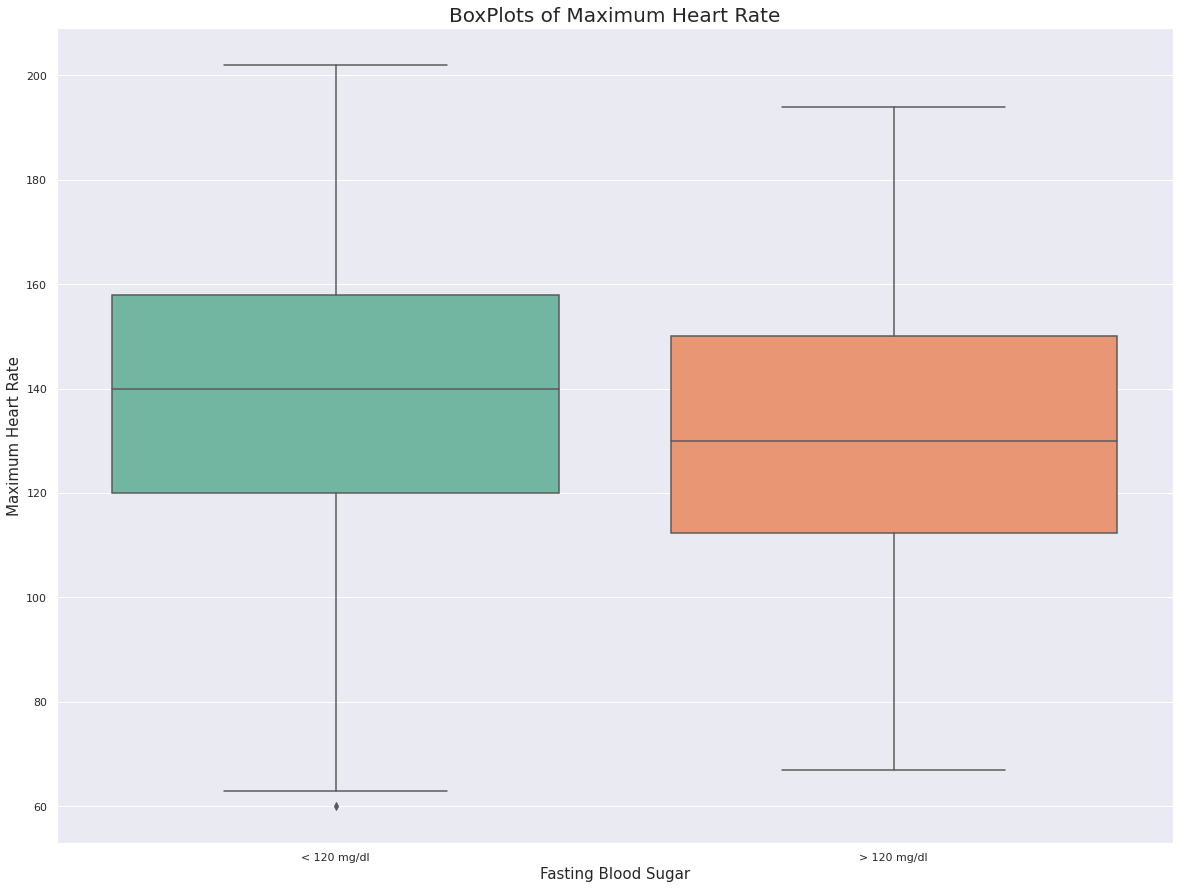

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='FastingBS', y='MaxHR', data = df, palette="Set2"); 
plt.ylabel("Maximum Heart Rate", fontsize=15)
plt.xlabel("Fasting Blood Sugar", fontsize=15)
plt.title('BoxPlots of Maximum Heart Rate', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Maximum Heart Rate')

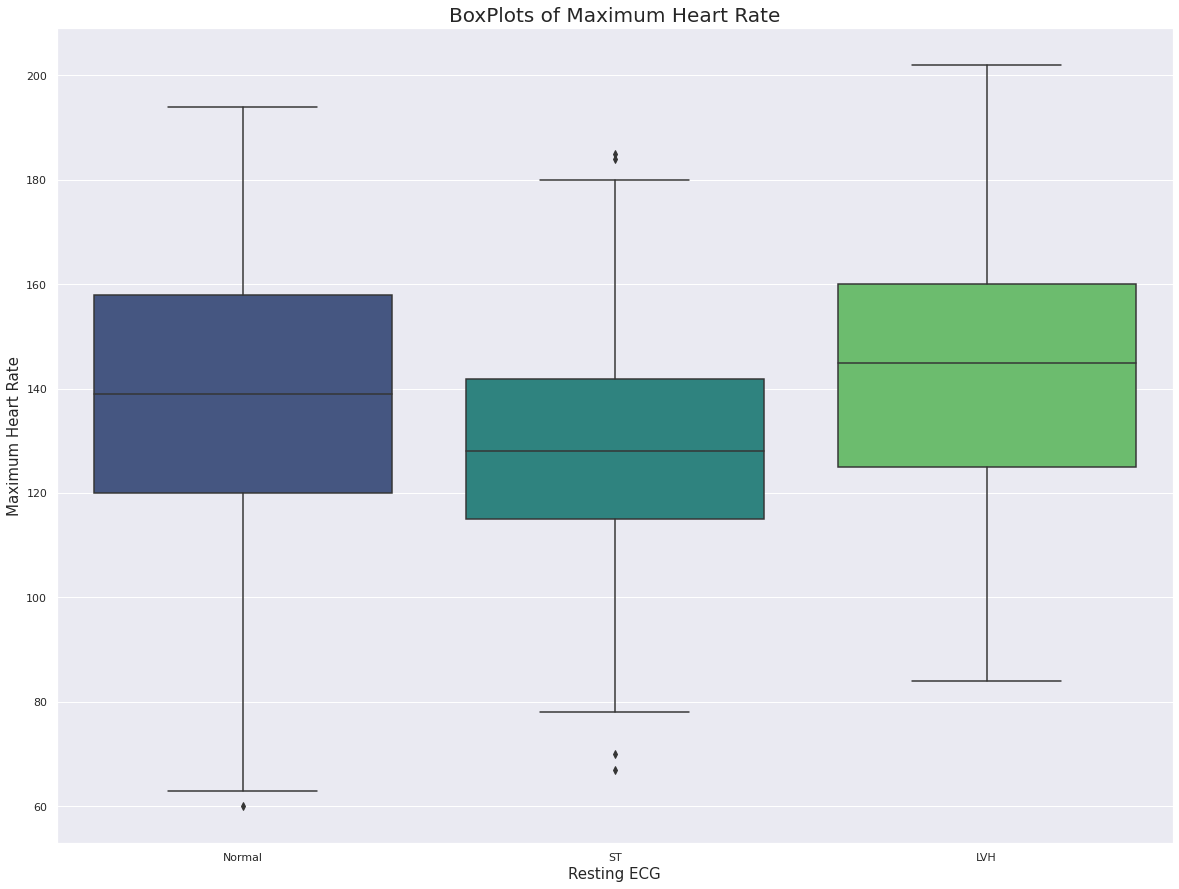

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='RestingECG', y='MaxHR', data = df, palette="viridis"); 
plt.ylabel("Maximum Heart Rate", fontsize=15)
plt.xlabel("Resting ECG", fontsize=15)
plt.title('BoxPlots of Maximum Heart Rate', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Maximum Heart Rate')

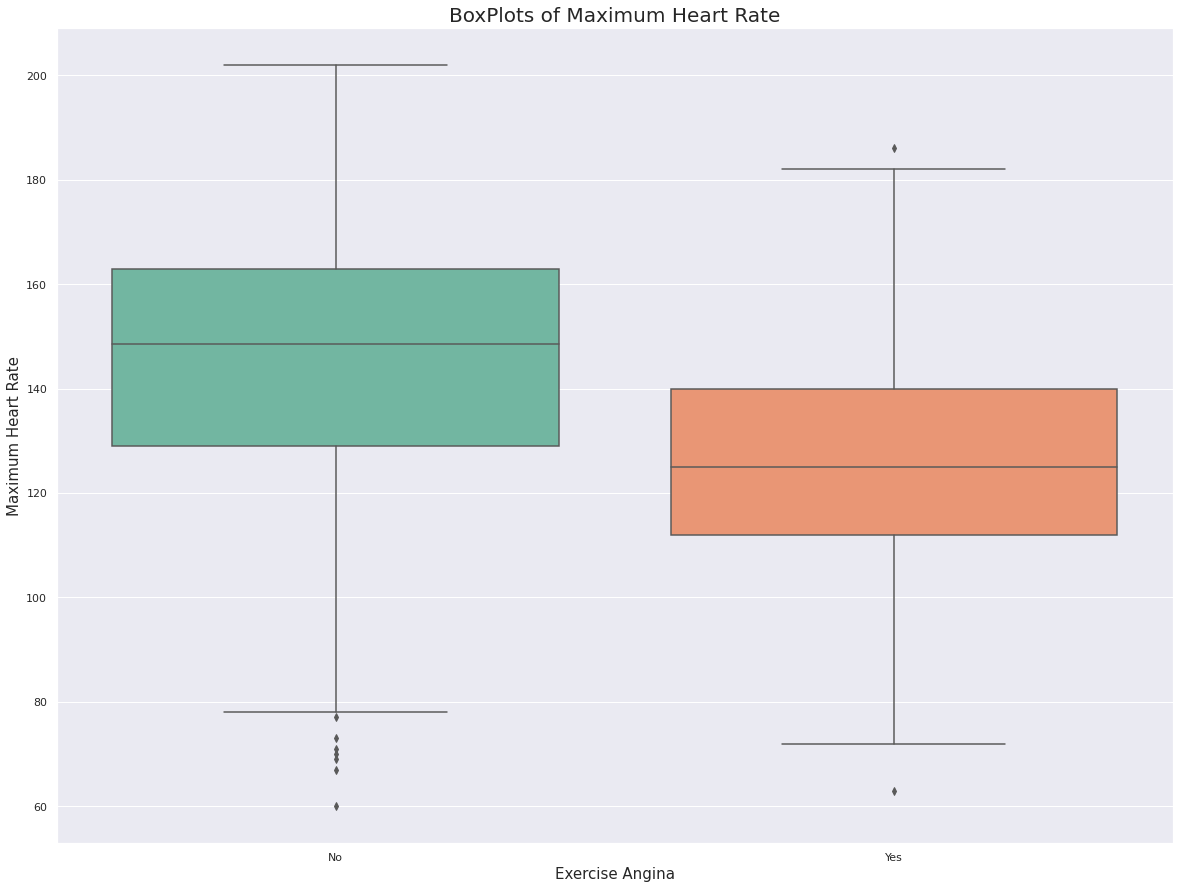

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='ExerciseAngina', y='MaxHR', data = df, palette="Set2"); 
plt.ylabel("Maximum Heart Rate", fontsize=15)
plt.xlabel("Exercise Angina", fontsize=15)
plt.title('BoxPlots of Maximum Heart Rate', fontsize=20)

Patients with exercise angina have a lower heart rate value

Text(0.5, 1.0, 'BoxPlots of Maximum Heart Rate')

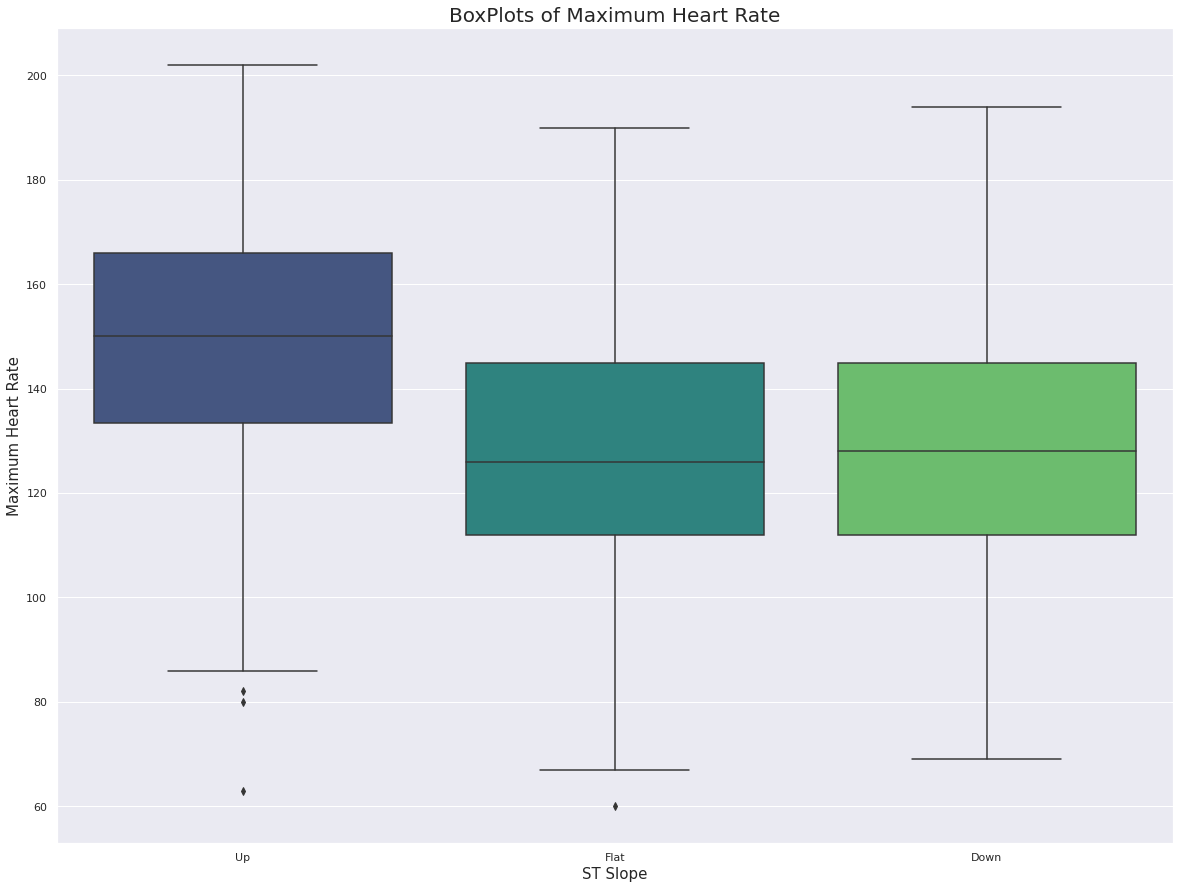

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='ST_Slope', y='MaxHR', data = df, palette="viridis"); 
plt.ylabel("Maximum Heart Rate", fontsize=15)
plt.xlabel("ST Slope", fontsize=15)
plt.title('BoxPlots of Maximum Heart Rate', fontsize=20)

### Box and Whiskers Plot for OldPeak



Text(0.5, 1.0, 'BoxPlots of Oldpeak')

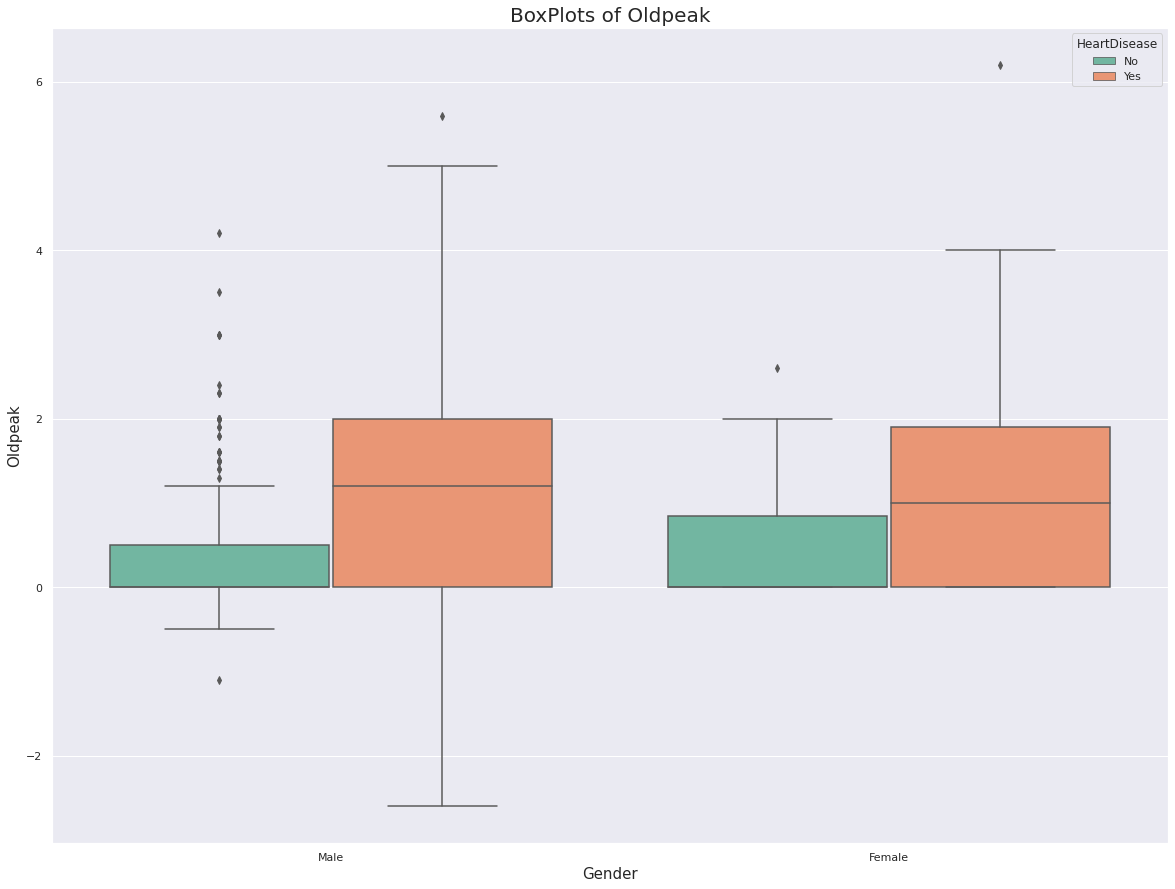

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='Sex', y='Oldpeak', hue='HeartDisease', data = df, palette="Set2"); 
plt.ylabel("Oldpeak", fontsize=15)
plt.xlabel("Gender", fontsize=15)
plt.title('BoxPlots of Oldpeak', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Oldpeak')

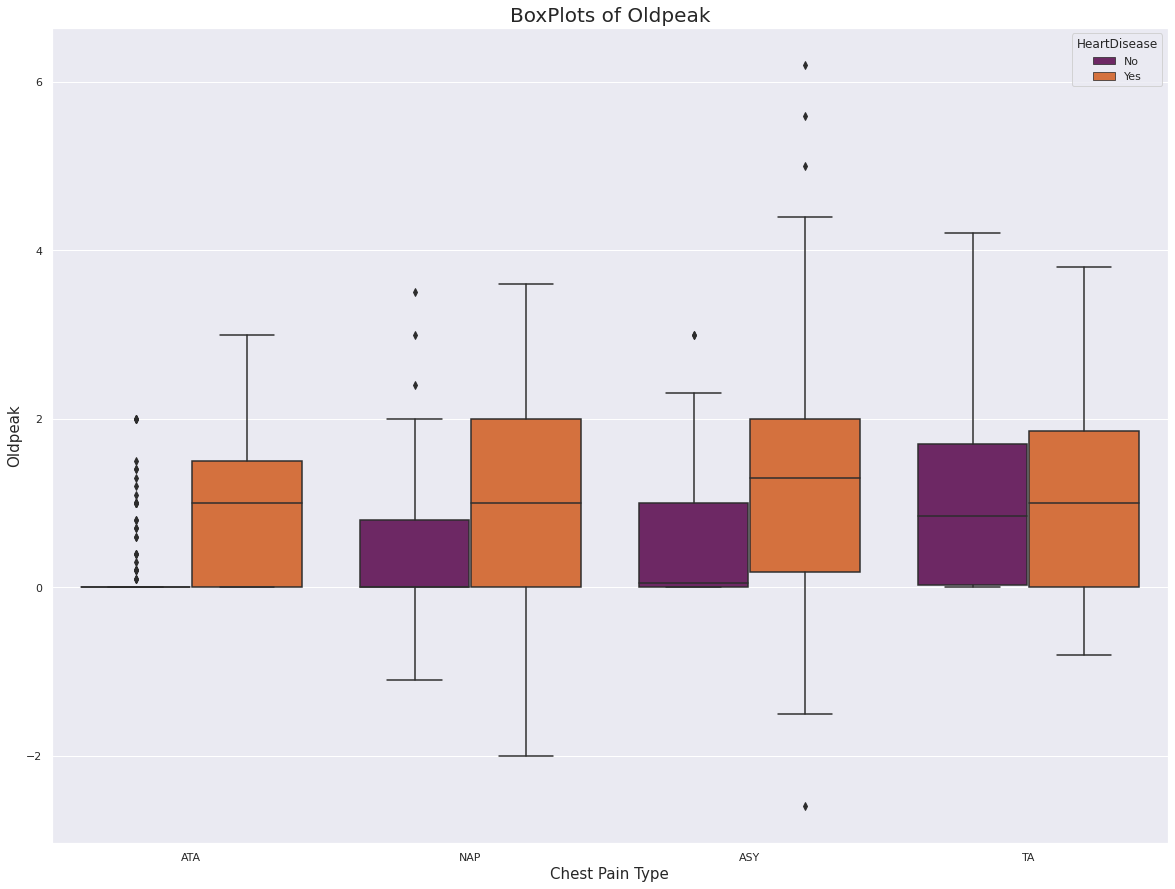

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='ChestPainType', y='Oldpeak', hue='HeartDisease', data = df, palette="inferno"); 
plt.ylabel("Oldpeak", fontsize=15)
plt.xlabel("Chest Pain Type", fontsize=15)
plt.title('BoxPlots of Oldpeak', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Oldpeak')

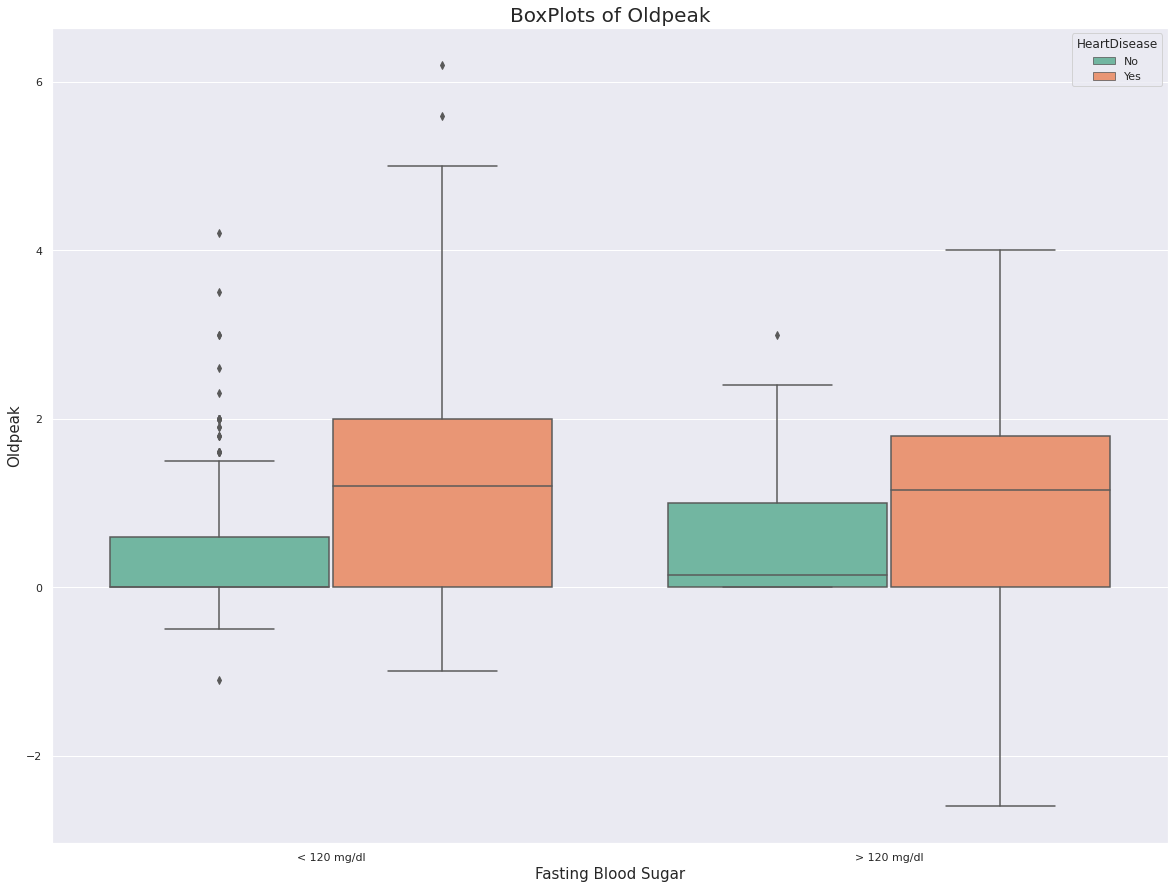

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='FastingBS', y='Oldpeak', hue='HeartDisease', data = df, palette="Set2"); 
plt.ylabel("Oldpeak", fontsize=15)
plt.xlabel("Fasting Blood Sugar", fontsize=15)
plt.title('BoxPlots of Oldpeak', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Oldpeak')

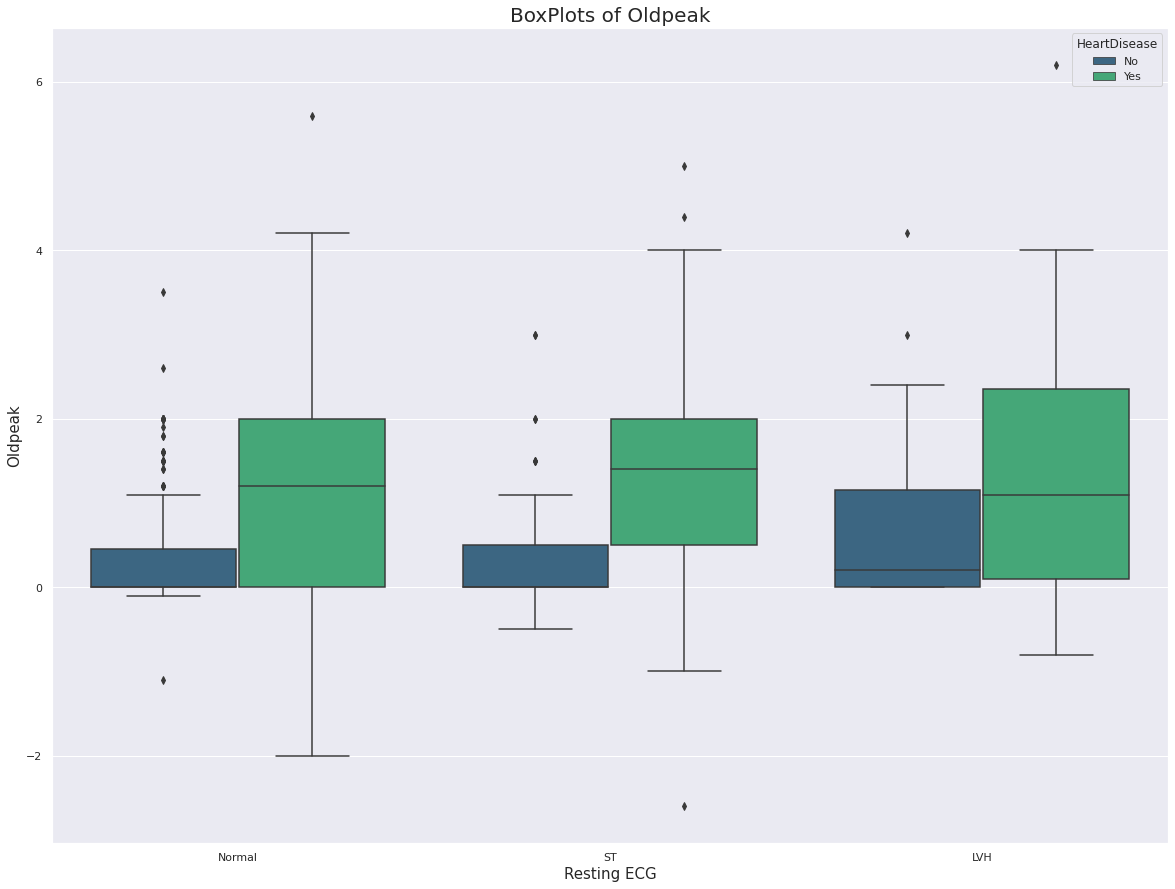

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='RestingECG', y='Oldpeak', hue='HeartDisease', data = df, palette="viridis"); 
plt.ylabel("Oldpeak", fontsize=15)
plt.xlabel("Resting ECG", fontsize=15)
plt.title('BoxPlots of Oldpeak', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Oldpeak')

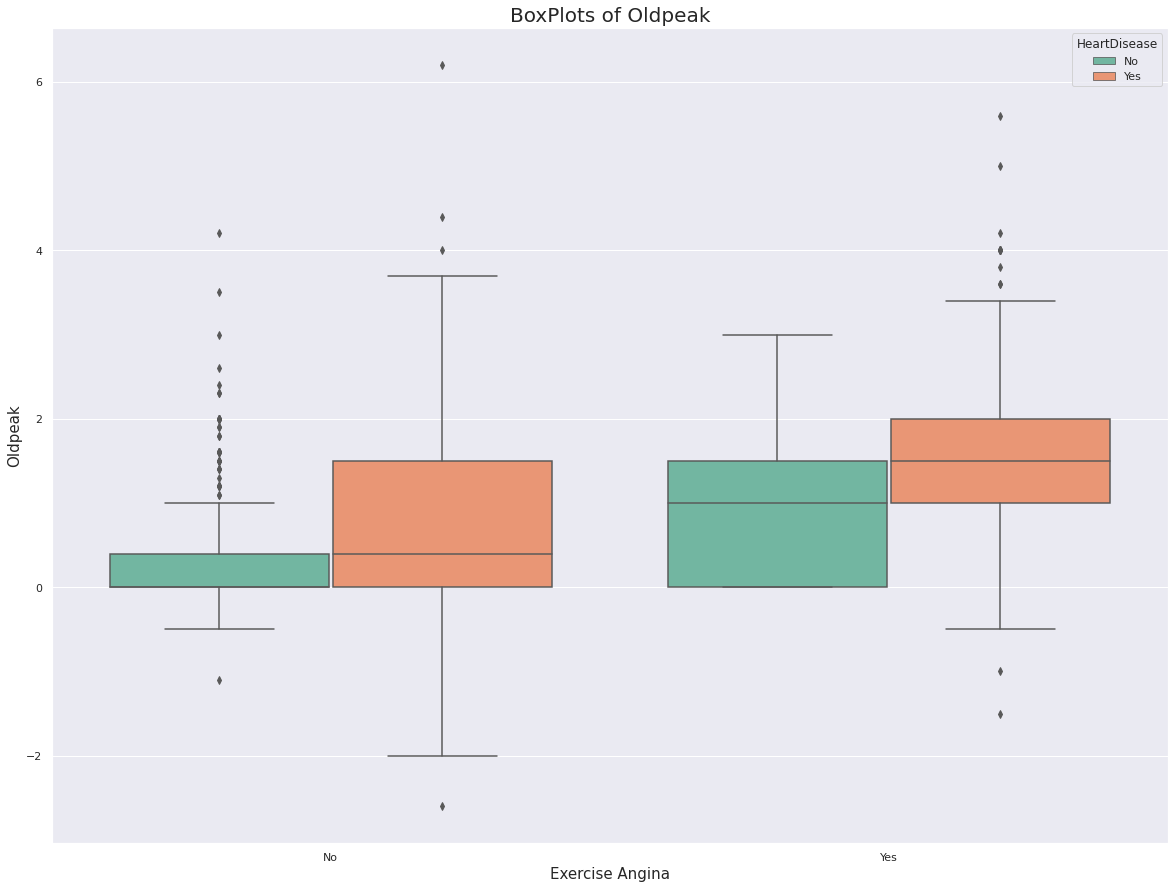

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='ExerciseAngina', y='Oldpeak', hue='HeartDisease', data = df, palette="Set2"); 
plt.ylabel("Oldpeak", fontsize=15)
plt.xlabel("Exercise Angina", fontsize=15)
plt.title('BoxPlots of Oldpeak', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Oldpeak')

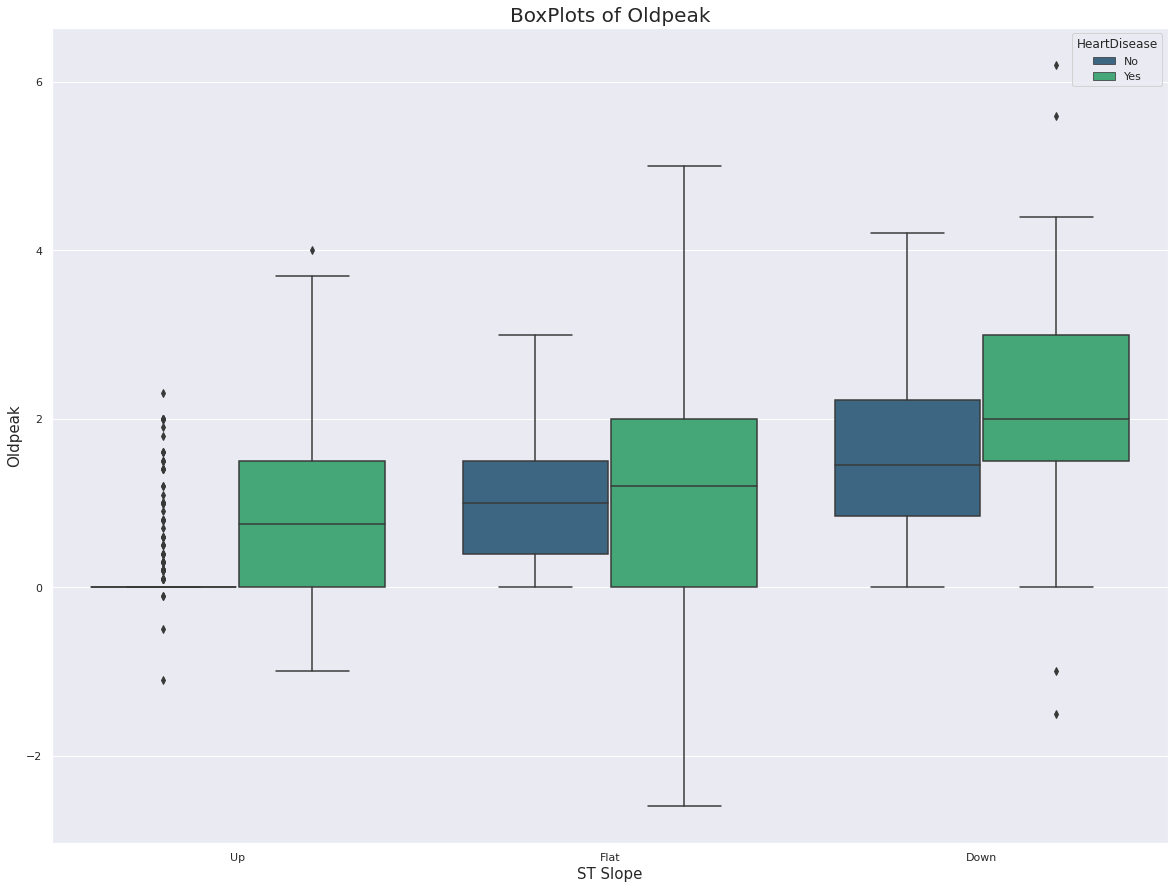

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='ST_Slope', y='Oldpeak', hue='HeartDisease', data = df, palette="viridis"); 
plt.ylabel("Oldpeak", fontsize=15)
plt.xlabel("ST Slope", fontsize=15)
plt.title('BoxPlots of Oldpeak', fontsize=20)

In all of these, we see that there is more variance in oldpeak values 

## Box and Whiskers Plot of continous variables with hue Heart Disease

### Box and Whiskers Plot for Resting BP

Text(0.5, 1.0, 'BoxPlots of Resting Blood Pressure')

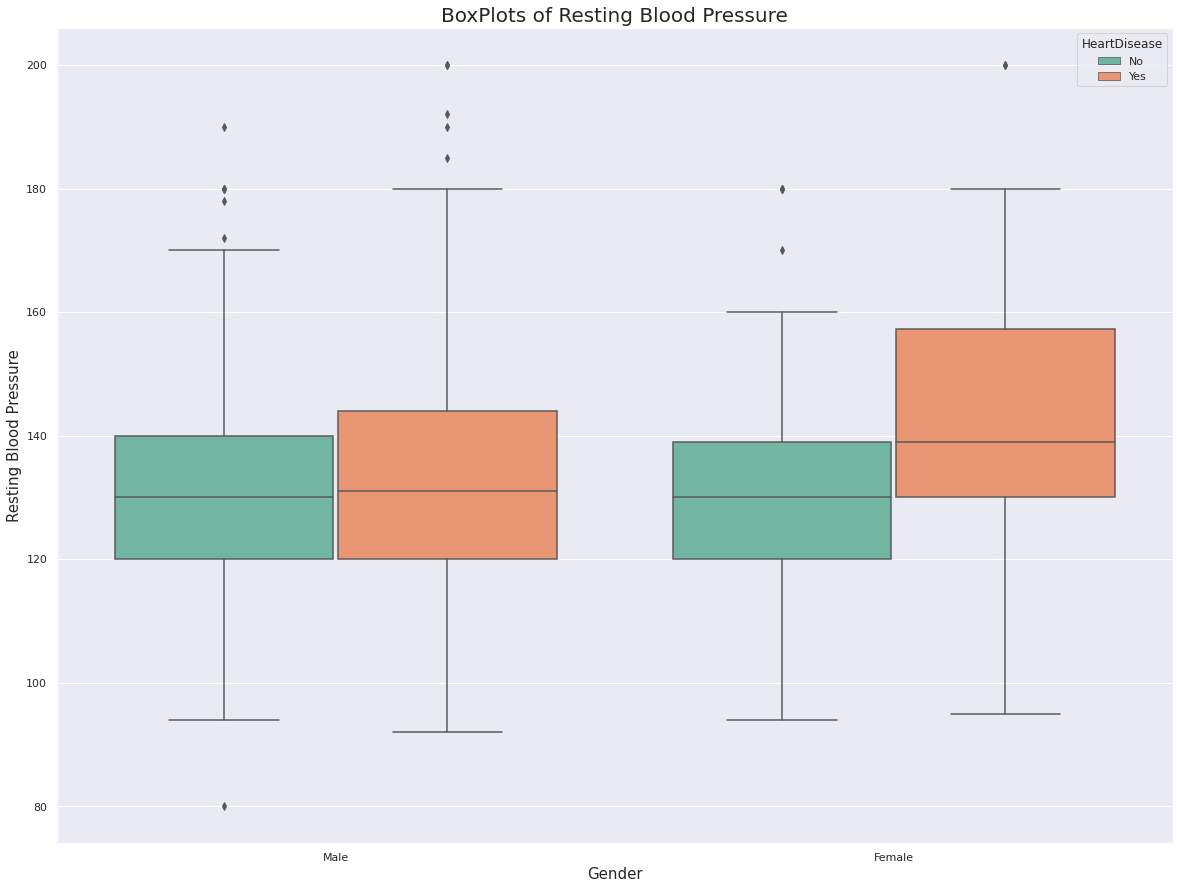

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='Sex', y='RestingBP', hue='HeartDisease', data = df, palette="Set2"); 
plt.ylabel("Resting Blood Pressure", fontsize=15)
plt.xlabel("Gender", fontsize=15)
plt.title('BoxPlots of Resting Blood Pressure', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Resting Blood Pressure')

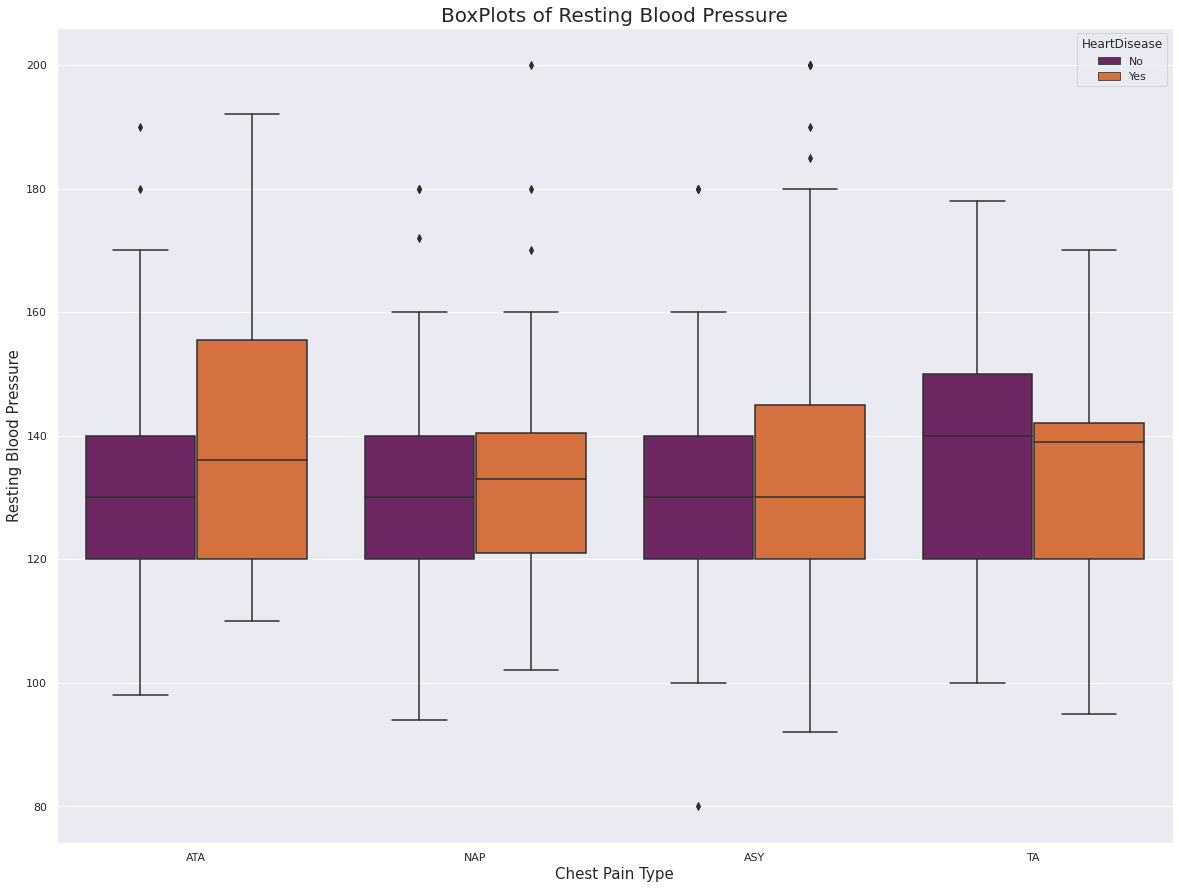

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='ChestPainType', y='RestingBP', hue='HeartDisease', data = df, palette="inferno"); 
plt.ylabel("Resting Blood Pressure", fontsize=15)
plt.xlabel("Chest Pain Type", fontsize=15)
plt.title('BoxPlots of Resting Blood Pressure', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Resting Blood Pressure')

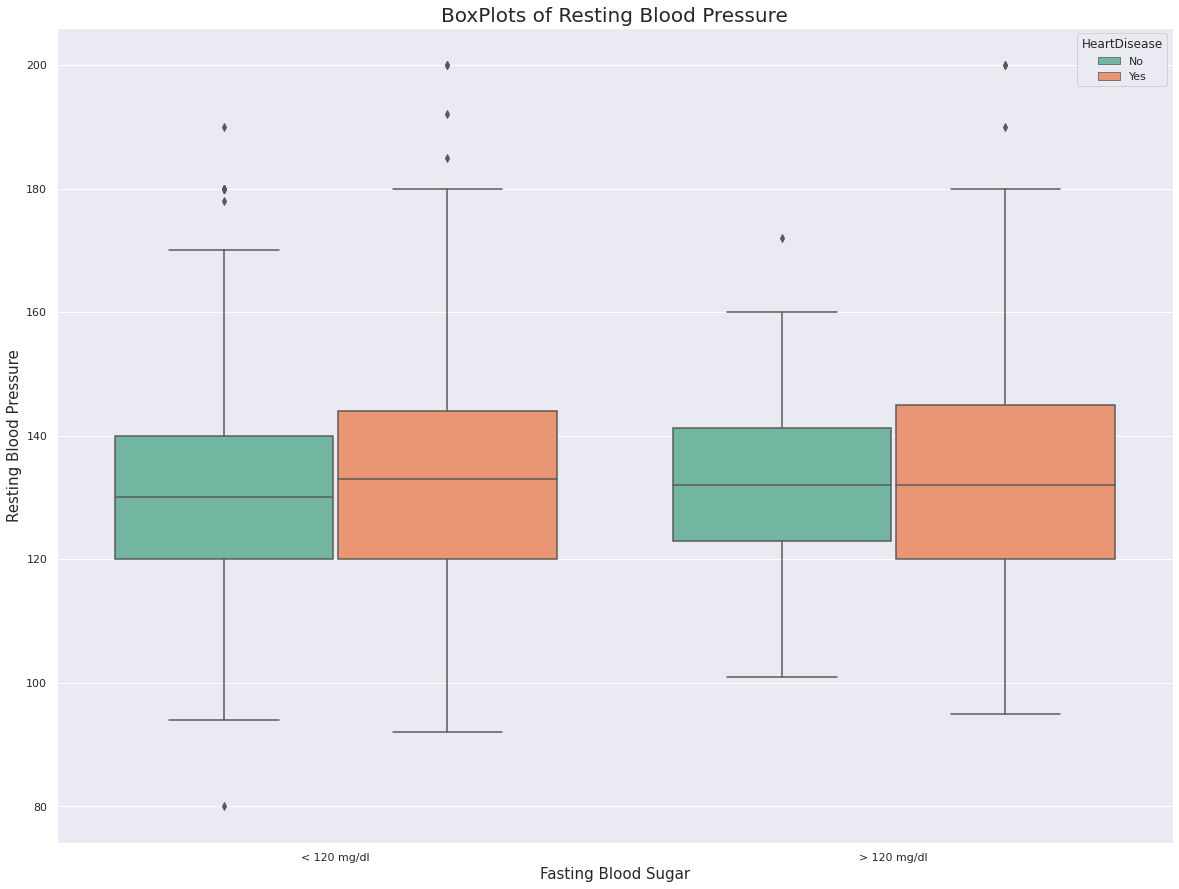

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='FastingBS', y='RestingBP', hue='HeartDisease', data = df, palette="Set2"); 
plt.ylabel("Resting Blood Pressure", fontsize=15)
plt.xlabel("Fasting Blood Sugar", fontsize=15)
plt.title('BoxPlots of Resting Blood Pressure', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Resting Blood Pressure')

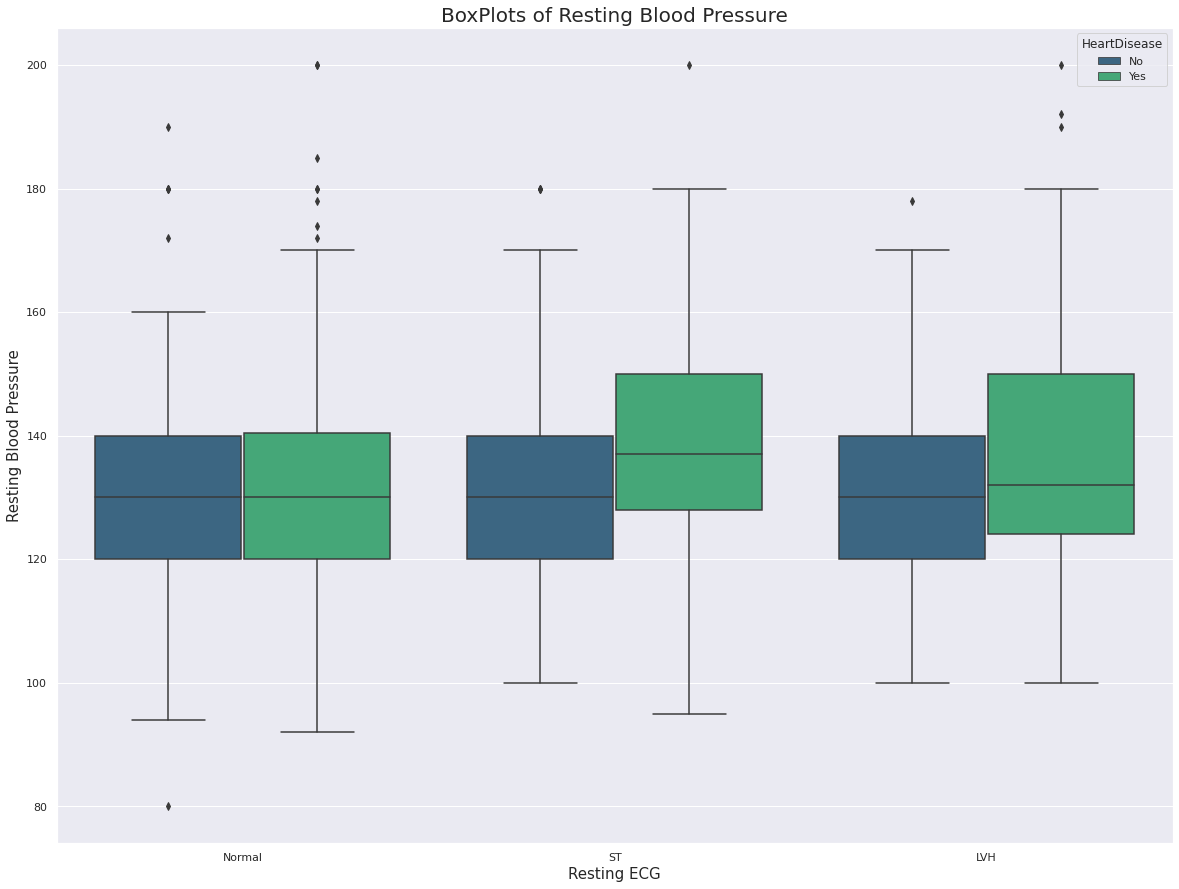

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='RestingECG', y='RestingBP', hue='HeartDisease', data = df, palette="viridis"); 
plt.ylabel("Resting Blood Pressure", fontsize=15)
plt.xlabel("Resting ECG", fontsize=15)
plt.title('BoxPlots of Resting Blood Pressure', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Resting Blood Pressure')

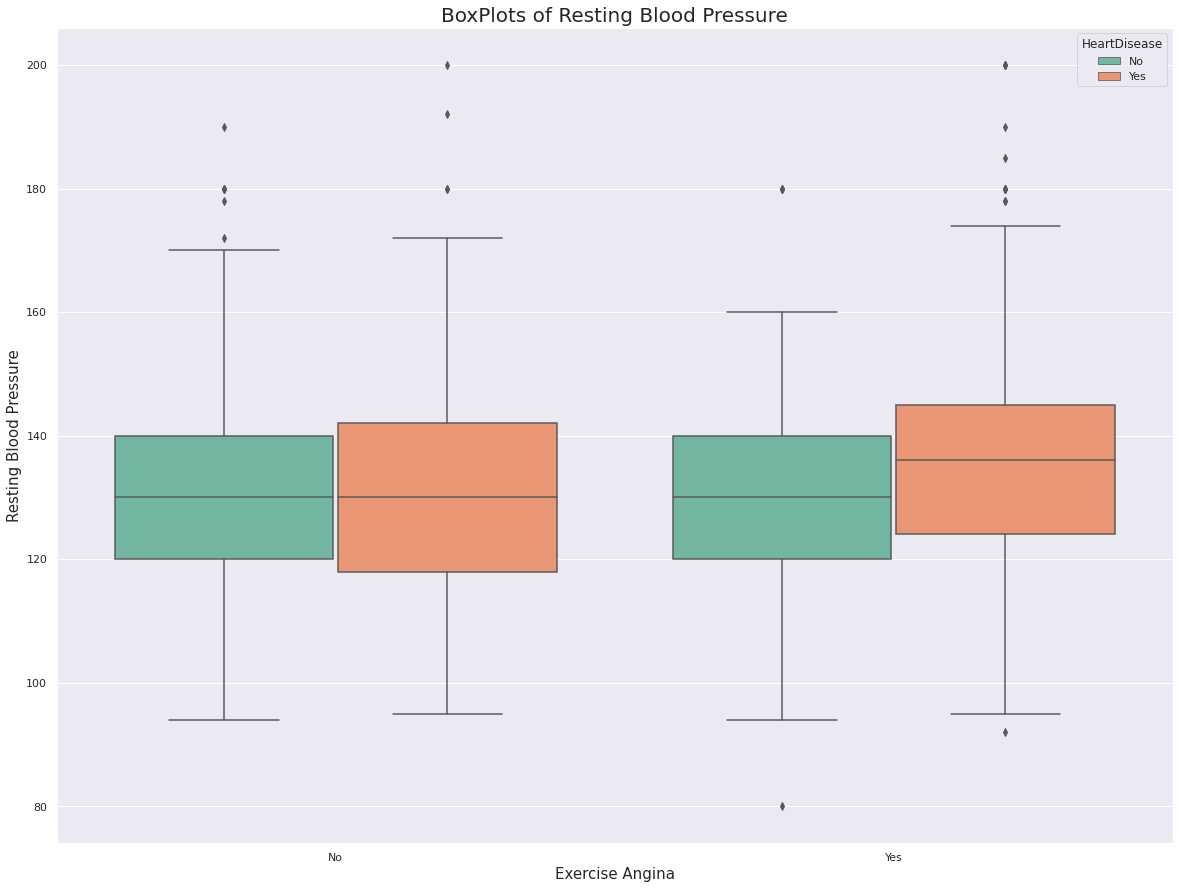

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='ExerciseAngina', y='RestingBP', hue='HeartDisease', data = df, palette="Set2"); 
plt.ylabel("Resting Blood Pressure", fontsize=15)
plt.xlabel("Exercise Angina", fontsize=15)
plt.title('BoxPlots of Resting Blood Pressure', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Resting Blood Pressure')

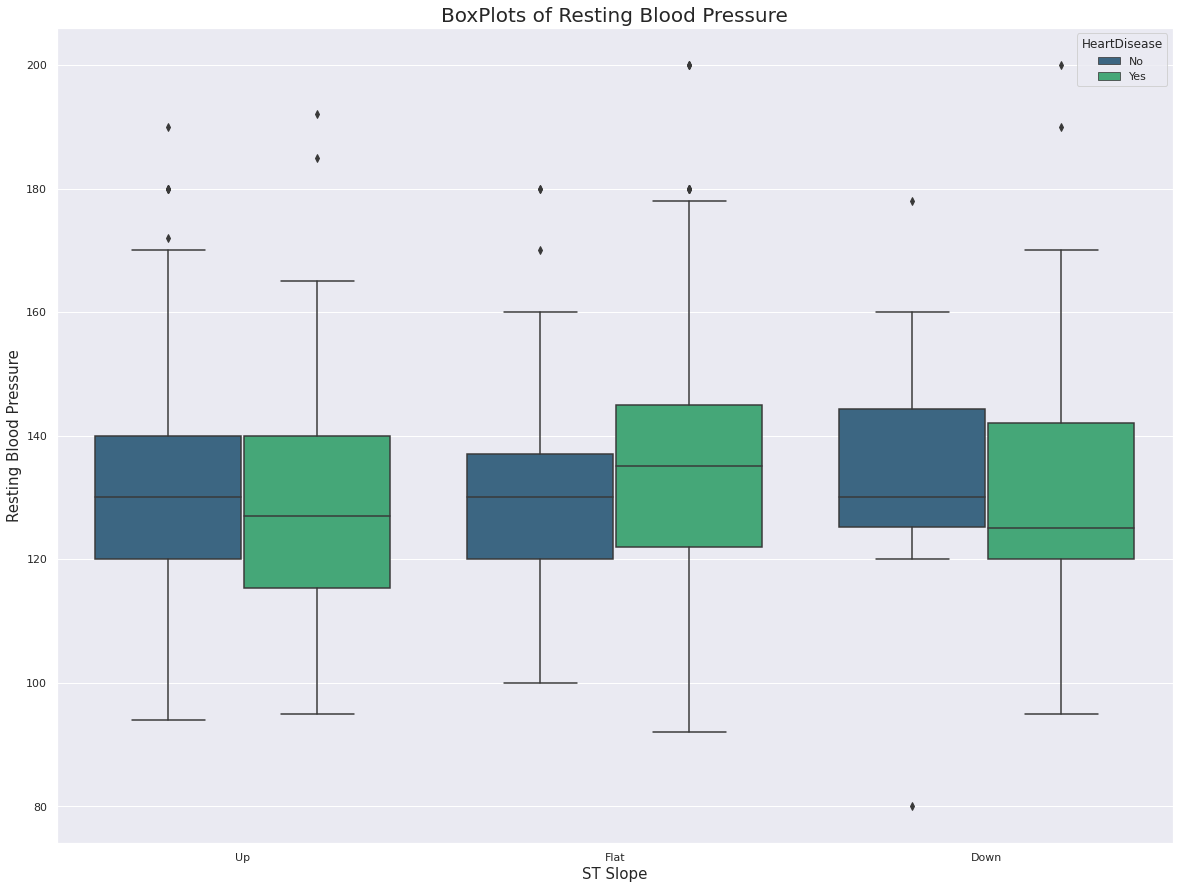

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='ST_Slope', y='RestingBP', hue='HeartDisease', data = df, palette="viridis"); 
plt.ylabel("Resting Blood Pressure", fontsize=15)
plt.xlabel("ST Slope", fontsize=15)
plt.title('BoxPlots of Resting Blood Pressure', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Resting Blood Pressure')

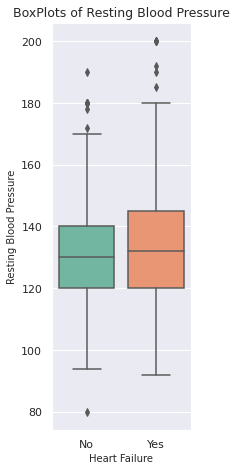

In [ ]:
plt.figure(figsize=(2.5, 7.5))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='HeartDisease', y='RestingBP', data = df, palette="Set2"); 
plt.ylabel("Resting Blood Pressure", fontsize=10)
plt.xlabel("Heart Failure", fontsize=10)
plt.title('BoxPlots of Resting Blood Pressure', fontsize=12.5)

We can see the trend across all categorical variables that for patients with heart failures have a higher median resting blood pressure

### Box and Whiskers Plot for Cholestrol

In [ ]:
bool=df['Cholesterol']!=0
df_chol=df[bool]

Text(0.5, 1.0, 'BoxPlots of Cholesterol')

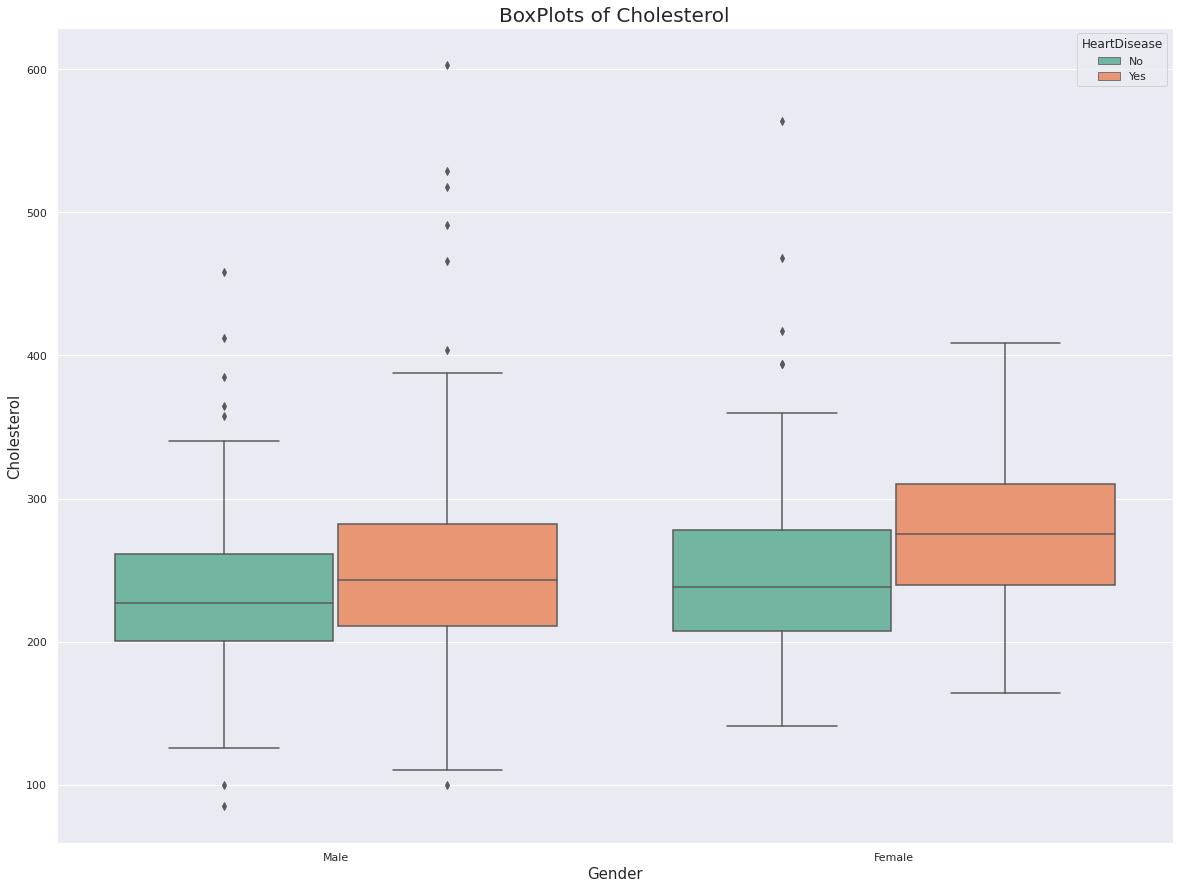

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='Sex', y='Cholesterol', hue='HeartDisease', data = df_chol, palette="Set2"); 
plt.ylabel("Cholesterol", fontsize=15)
plt.xlabel("Gender", fontsize=15)
plt.title('BoxPlots of Cholesterol', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Cholesterol')

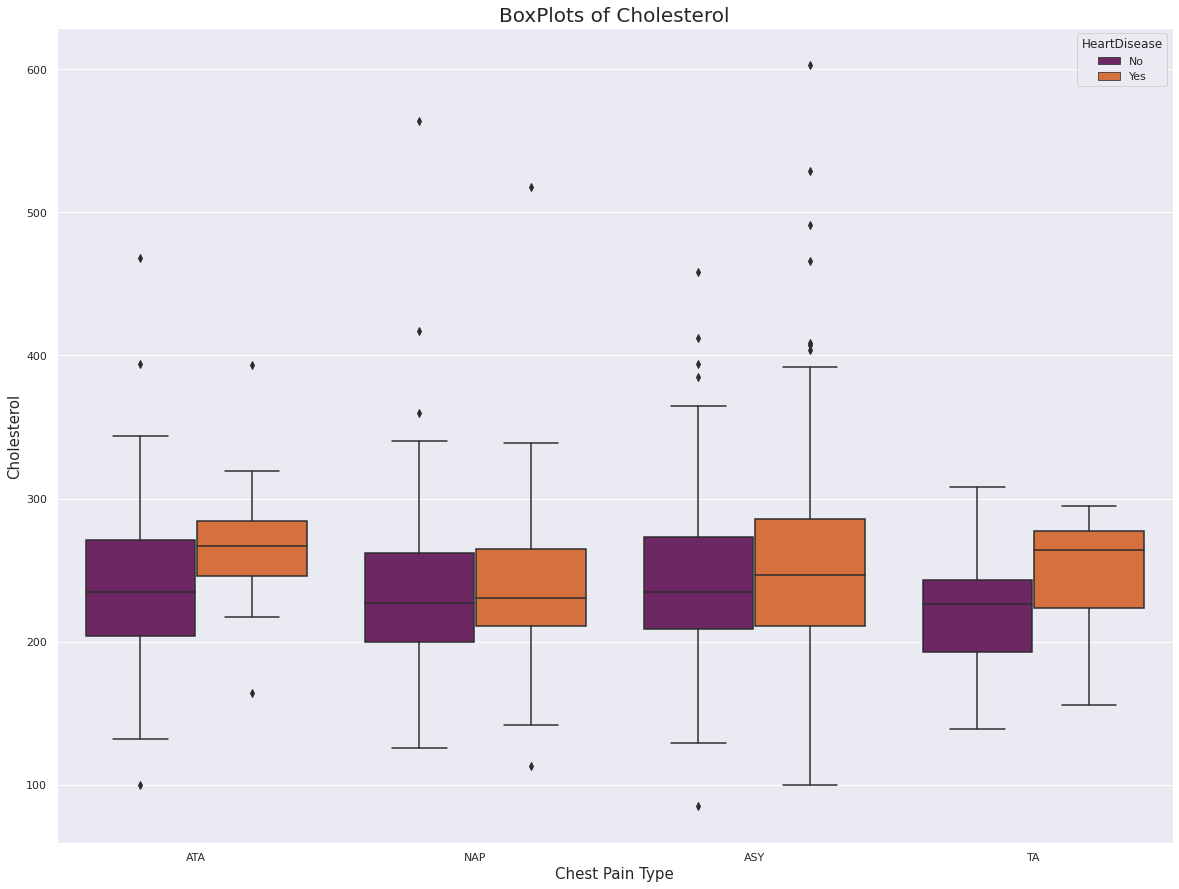

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='ChestPainType', y='Cholesterol', hue='HeartDisease', data = df_chol, palette="inferno"); 
plt.ylabel("Cholesterol", fontsize=15)
plt.xlabel("Chest Pain Type", fontsize=15)
plt.title('BoxPlots of Cholesterol', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Cholesterol')

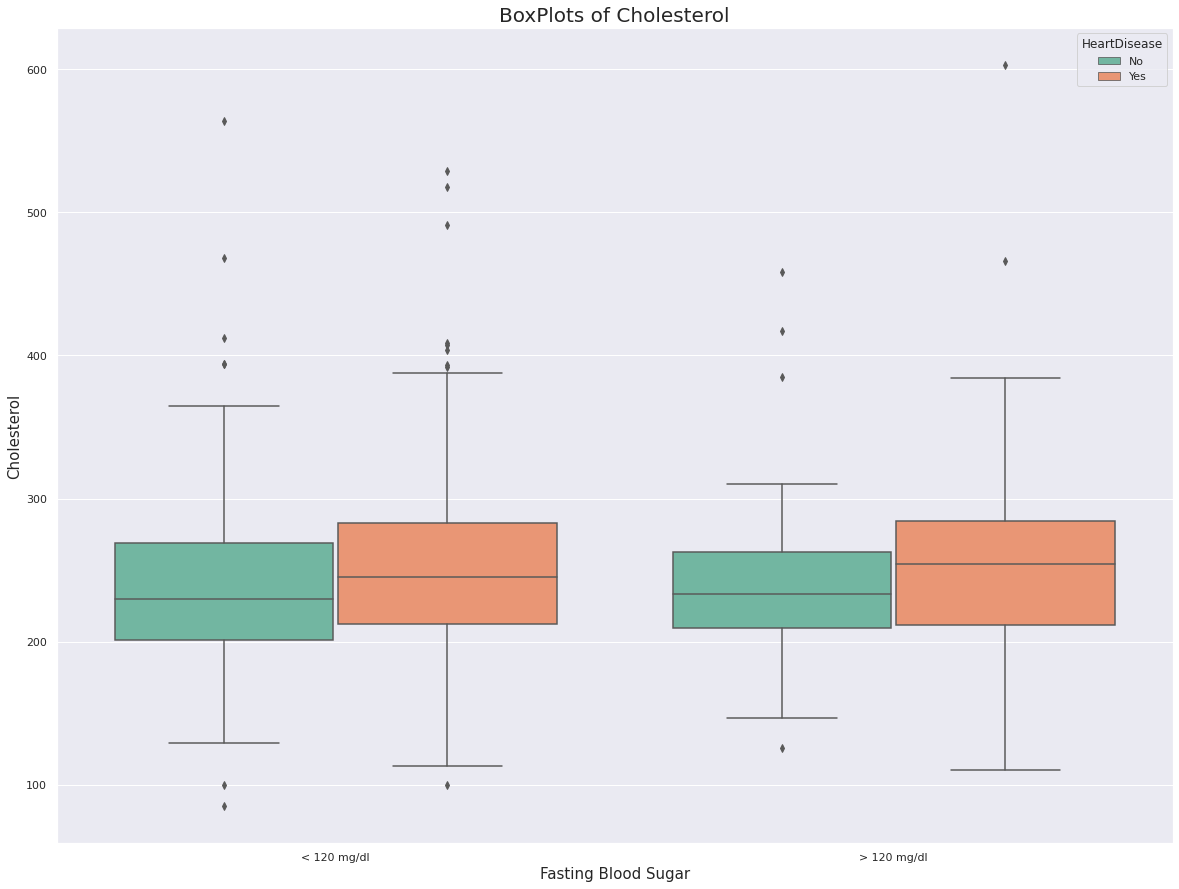

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='FastingBS', y='Cholesterol', hue='HeartDisease', data = df_chol, palette="Set2"); 
plt.ylabel("Cholesterol", fontsize=15)
plt.xlabel("Fasting Blood Sugar", fontsize=15)
plt.title('BoxPlots of Cholesterol', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Cholesterol')

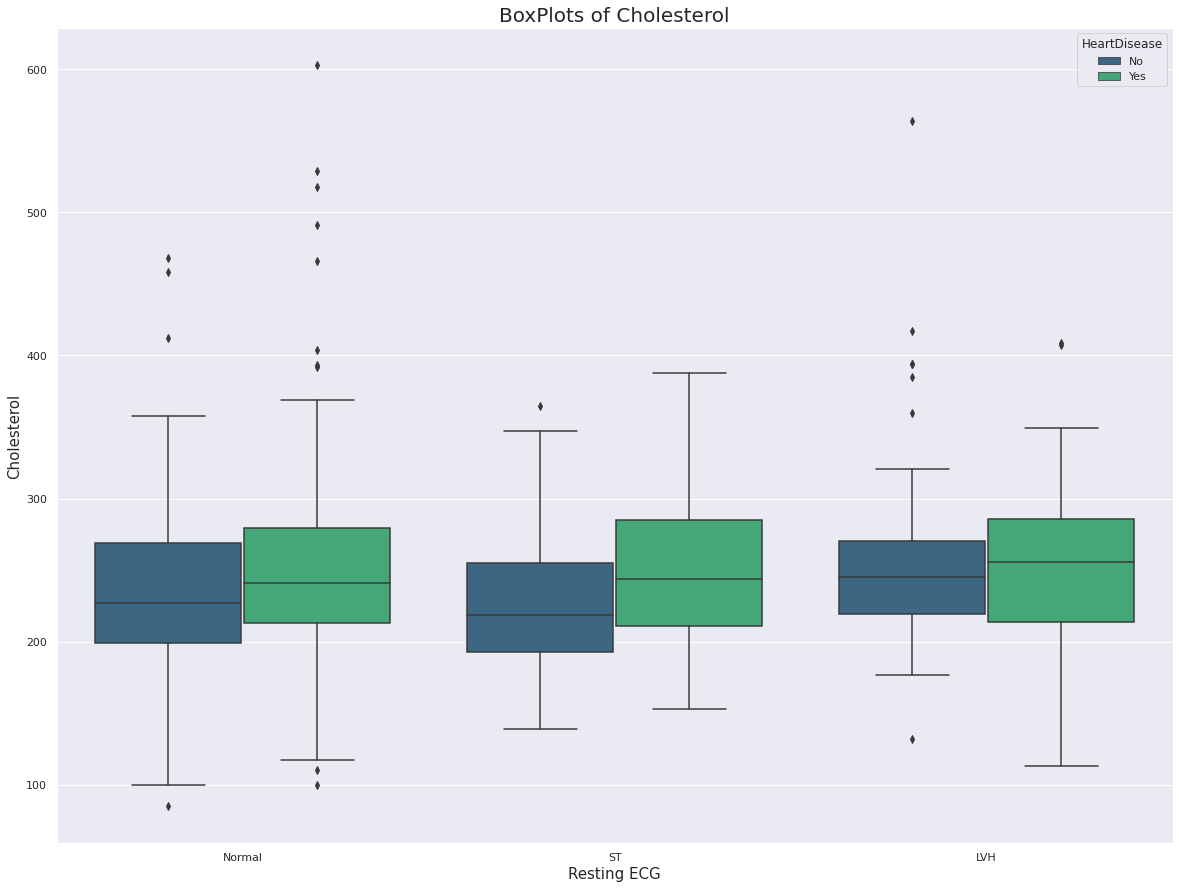

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='RestingECG', y='Cholesterol', hue='HeartDisease', data = df_chol, palette="viridis"); 
plt.ylabel("Cholesterol", fontsize=15)
plt.xlabel("Resting ECG", fontsize=15)
plt.title('BoxPlots of Cholesterol', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Cholesterol')

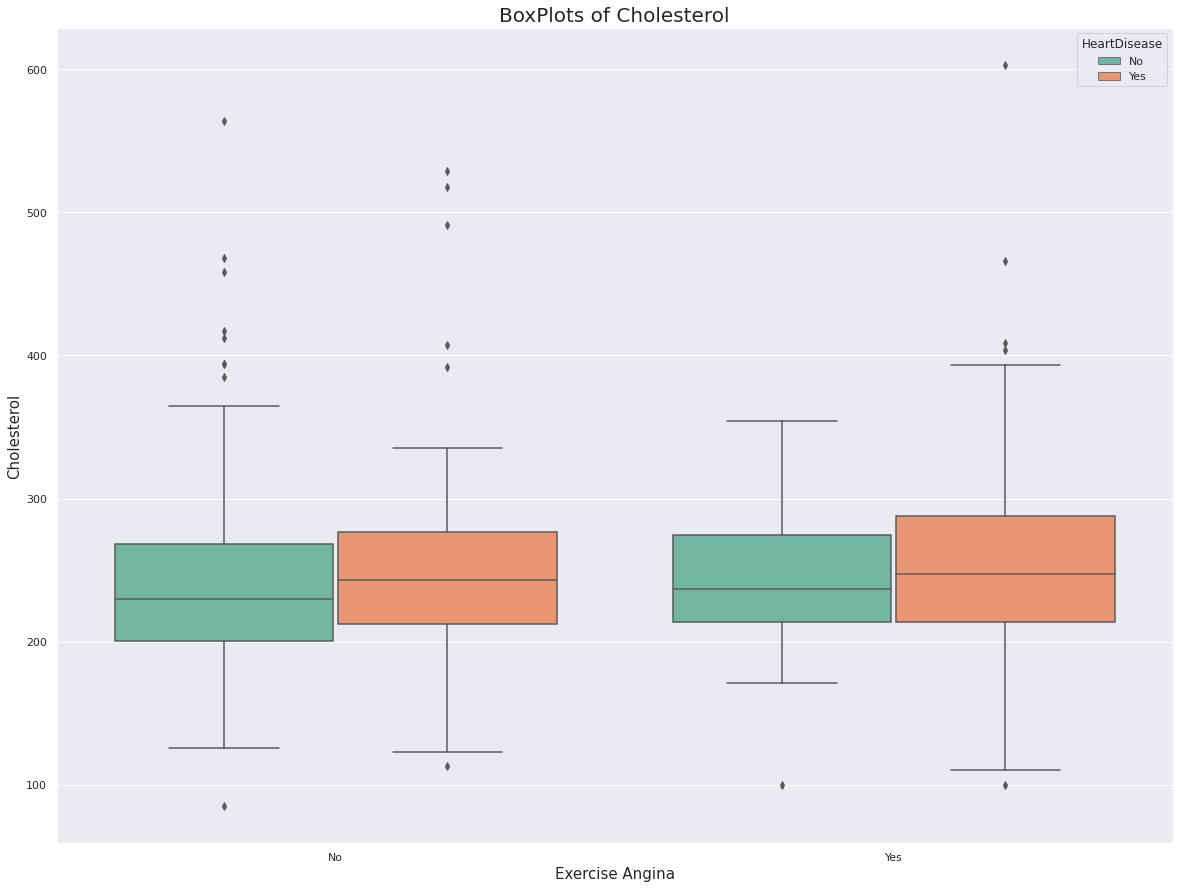

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='ExerciseAngina', y='Cholesterol', hue='HeartDisease', data = df_chol, palette="Set2"); 
plt.ylabel("Cholesterol", fontsize=15)
plt.xlabel("Exercise Angina", fontsize=15)
plt.title('BoxPlots of Cholesterol', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Cholesterol')

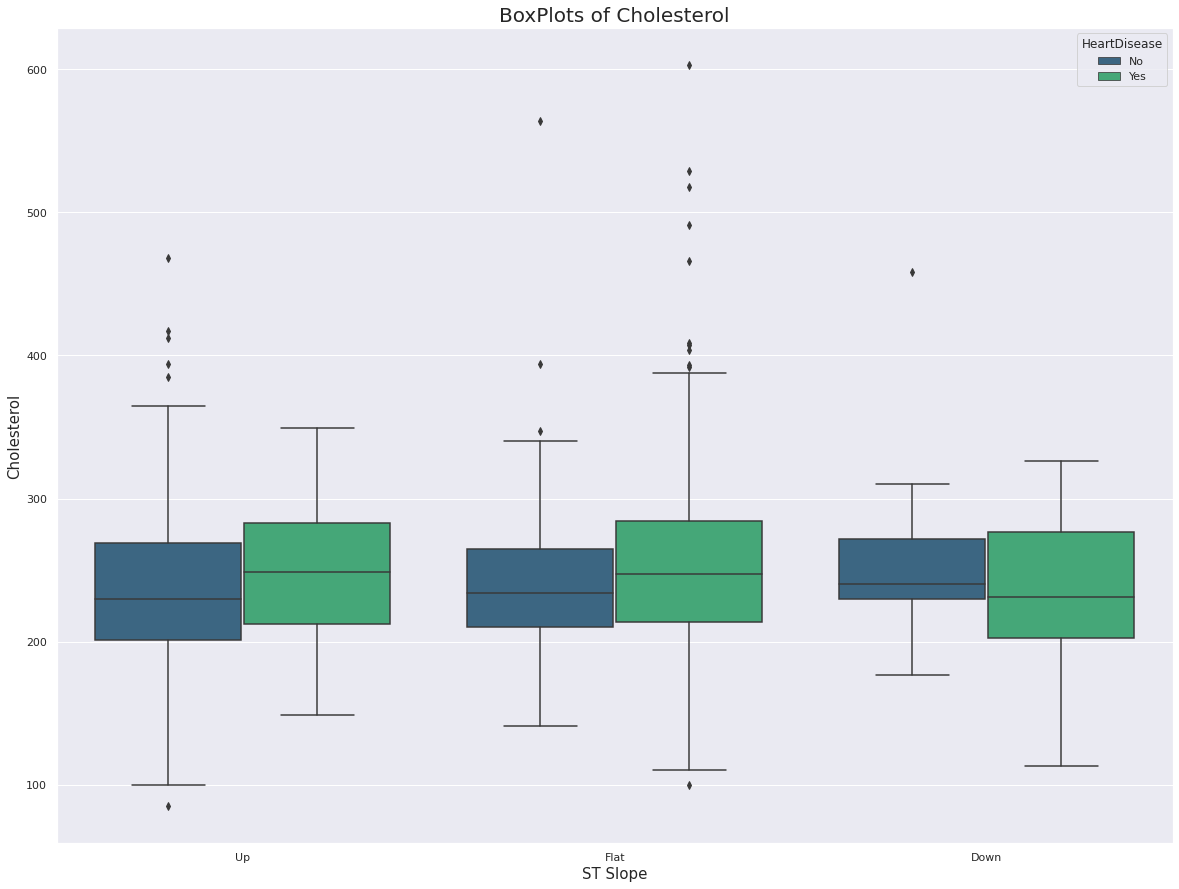

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='ST_Slope', y='Cholesterol', hue='HeartDisease', data = df_chol, palette="viridis"); 
plt.ylabel("Cholesterol", fontsize=15)
plt.xlabel("ST Slope", fontsize=15)
plt.title('BoxPlots of Cholesterol', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Cholesterol')

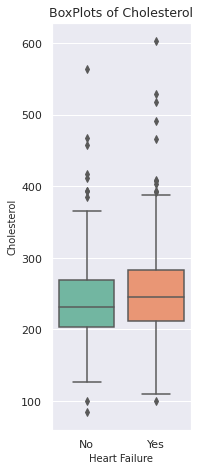

In [ ]:
plt.figure(figsize=(2.5, 7.5))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='HeartDisease', y='Cholesterol', data = df_chol, palette="Set2"); 
plt.ylabel("Cholesterol", fontsize=10)
plt.xlabel("Heart Failure", fontsize=10)
plt.title('BoxPlots of Cholesterol', fontsize=12.5)

We can see the trend across all categorical variables that for patients with heart failures have a higher median cholesterol levels

### Box and Whiskers Plot for Age

Text(0.5, 1.0, 'BoxPlots of Age')

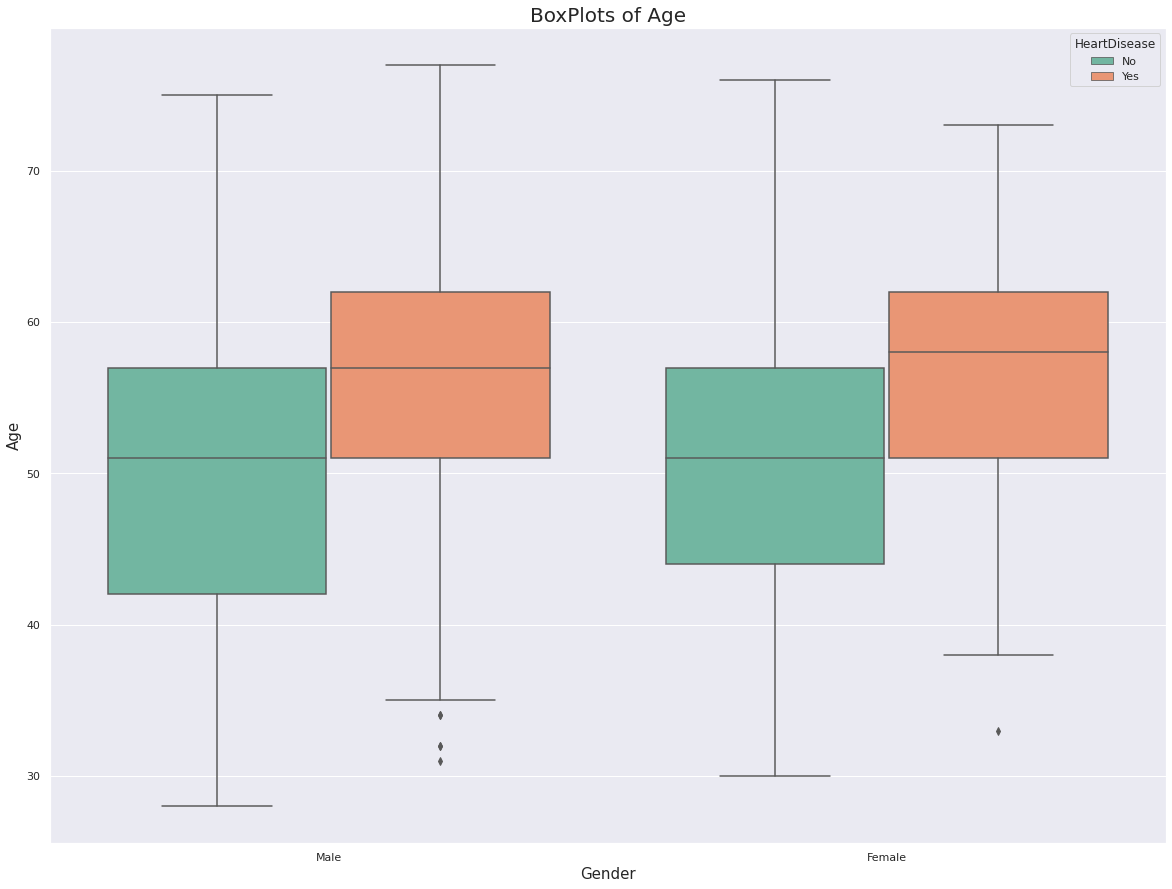

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='Sex', y='Age', hue='HeartDisease', data = df, palette="Set2"); 
plt.ylabel("Age", fontsize=15)
plt.xlabel("Gender", fontsize=15)
plt.title('BoxPlots of Age', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Age')

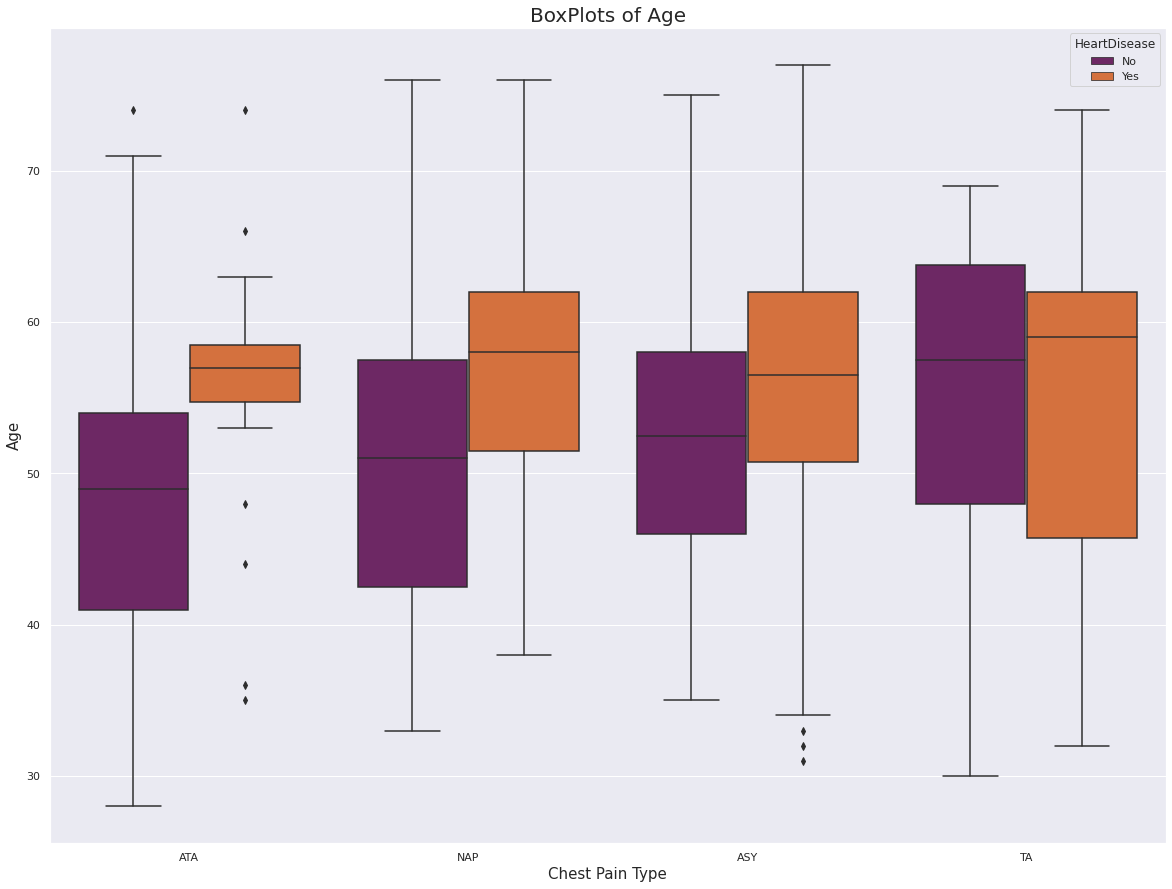

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='ChestPainType', y='Age', hue='HeartDisease', data = df, palette="inferno"); 
plt.ylabel("Age", fontsize=15)
plt.xlabel("Chest Pain Type", fontsize=15)
plt.title('BoxPlots of Age', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Age')

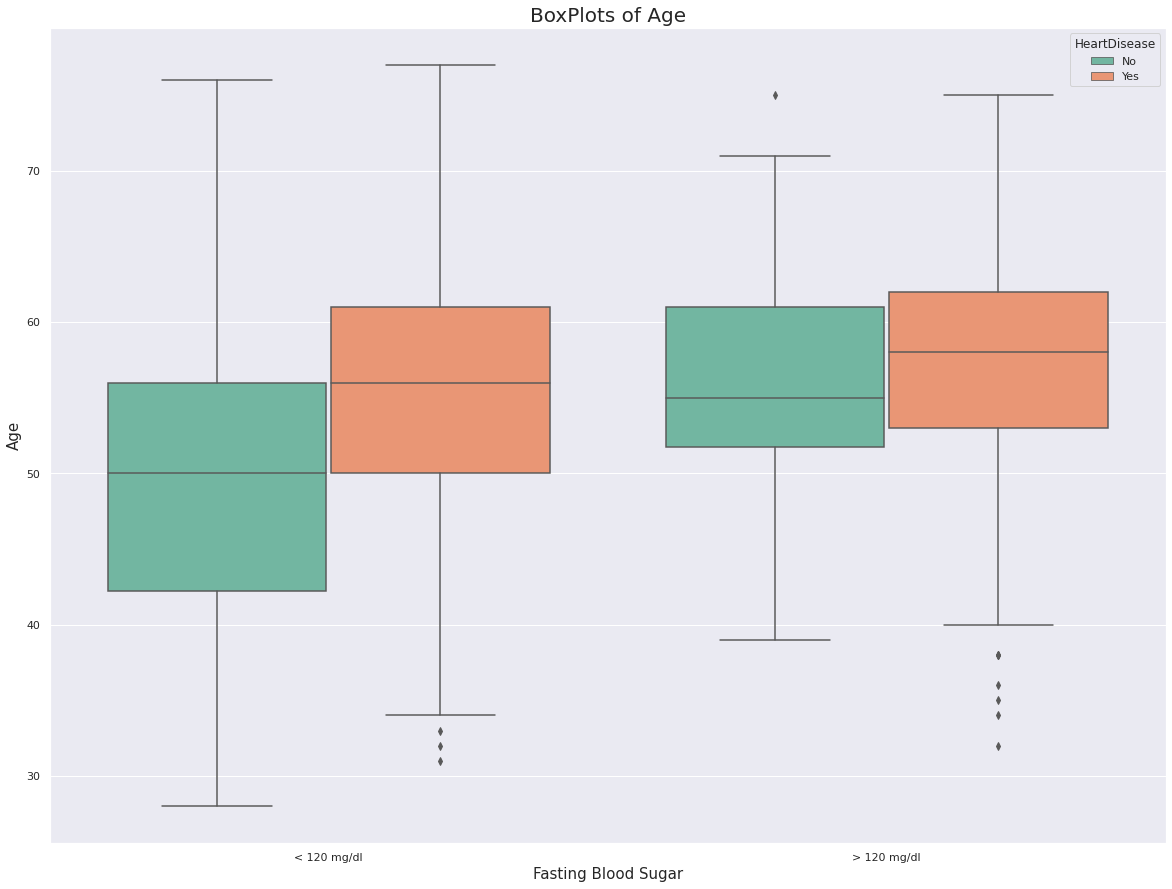

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='FastingBS', y='Age', hue='HeartDisease', data = df, palette="Set2"); 
plt.ylabel("Age", fontsize=15)
plt.xlabel("Fasting Blood Sugar", fontsize=15)
plt.title('BoxPlots of Age', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Age')

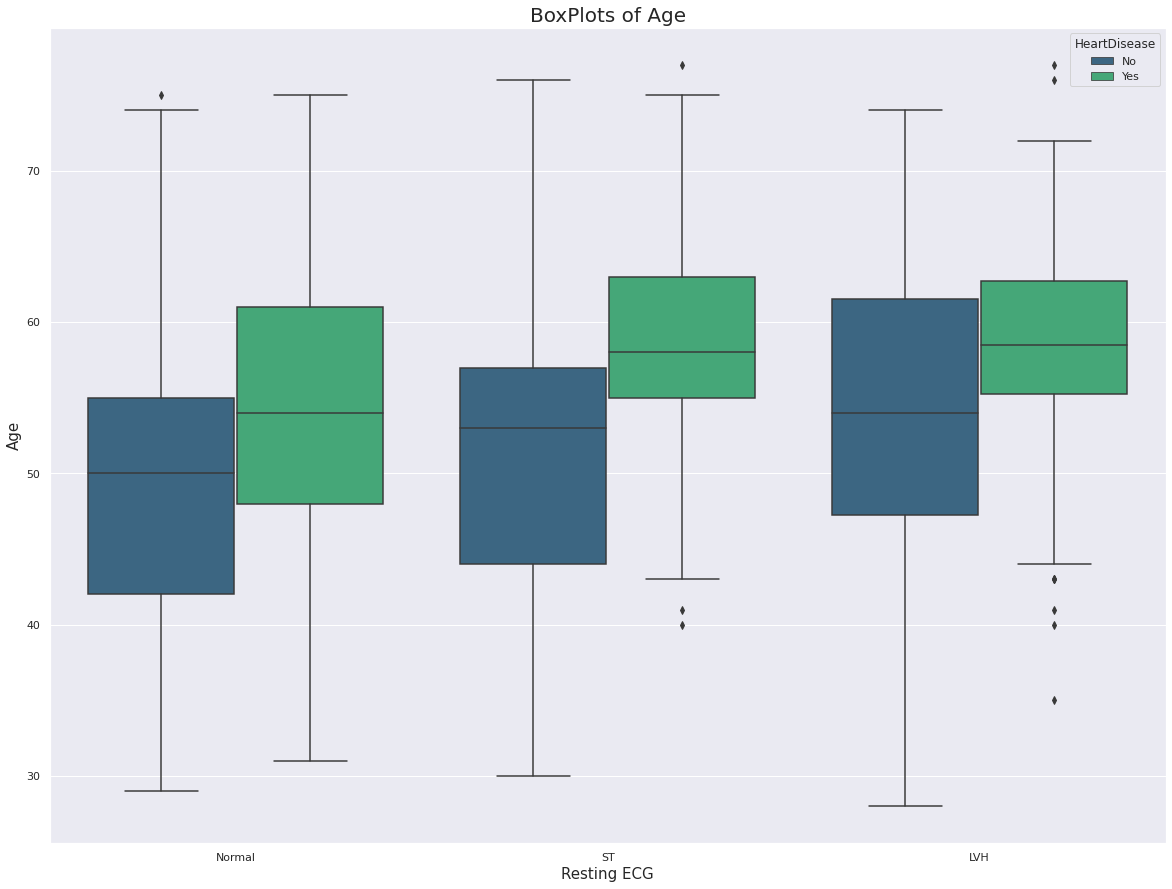

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='RestingECG', y='Age', hue='HeartDisease', data = df, palette="viridis"); 
plt.ylabel("Age", fontsize=15)
plt.xlabel("Resting ECG", fontsize=15)
plt.title('BoxPlots of Age', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Age')

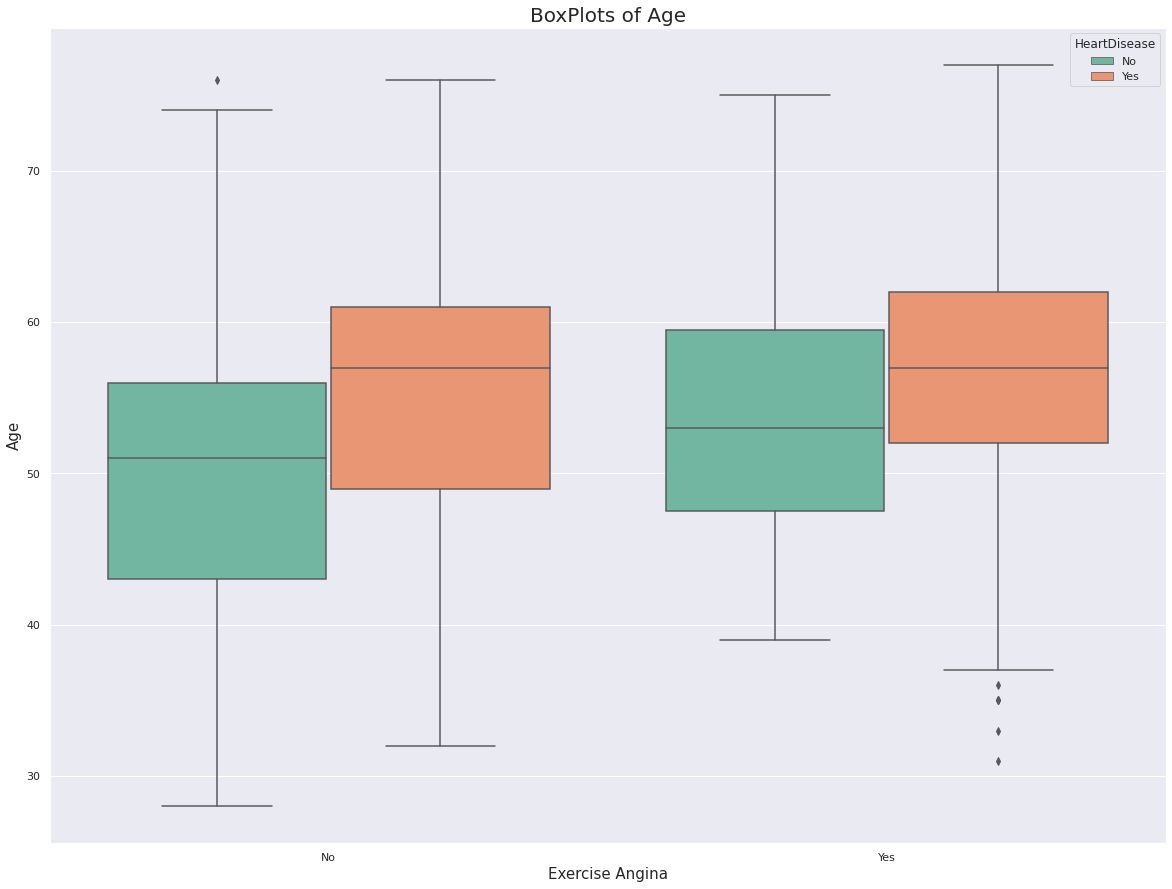

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='ExerciseAngina', y='Age', hue='HeartDisease', data = df, palette="Set2"); 
plt.ylabel("Age", fontsize=15)
plt.xlabel("Exercise Angina", fontsize=15)
plt.title('BoxPlots of Age', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Age')

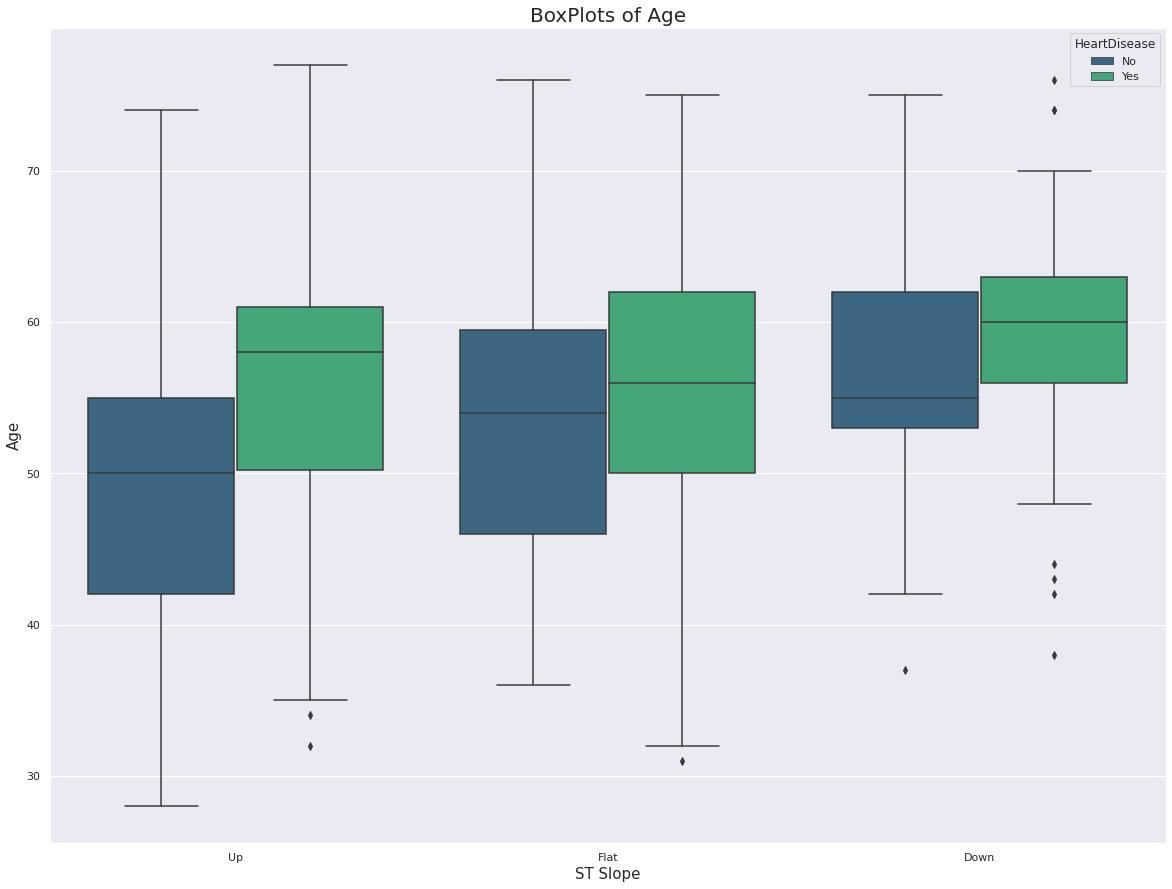

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='ST_Slope', y='Age', hue='HeartDisease', data = df, palette="viridis"); 
plt.ylabel("Age", fontsize=15)
plt.xlabel("ST Slope", fontsize=15)
plt.title('BoxPlots of Age', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Age')

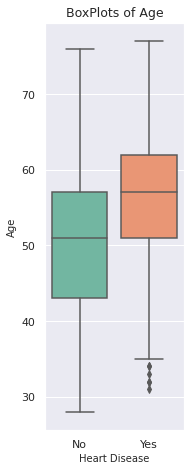

In [ ]:
plt.figure(figsize=(2.5, 7.5))
#plotting box and whiskers plot
plot = sns.boxplot(x='HeartDisease', y='Age', data = df, palette="Set2"); 
plt.ylabel("Age", fontsize=10)
plt.xlabel("Heart Disease", fontsize=10)
plt.title('BoxPlots of Age', fontsize=12.5)

We can see the trend across all categorical variables that aged patients stand at a higher risk of having heart failure.

### Box and Whiskers Plot for Maximum Heart Rate

Text(0.5, 1.0, 'BoxPlots of Maximum Heart Rate')

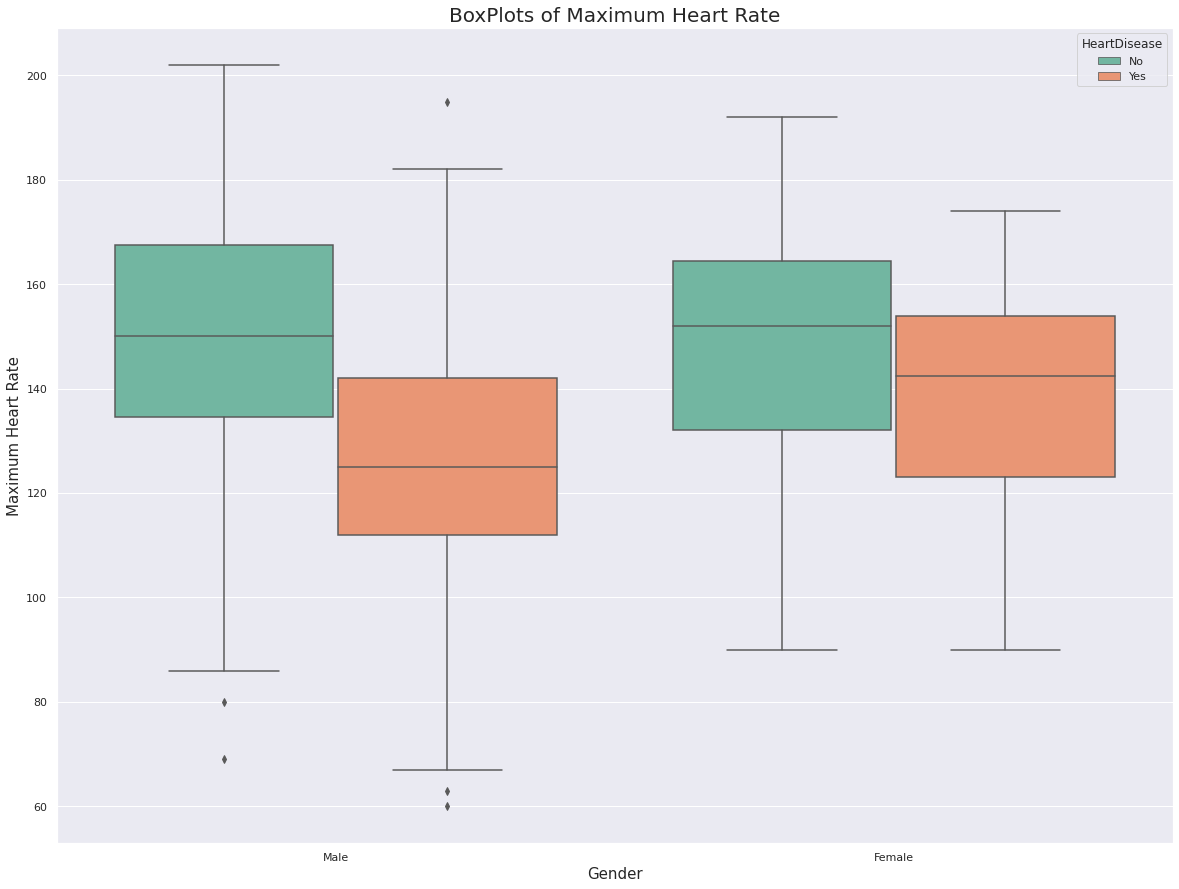

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='Sex', y='MaxHR', hue='HeartDisease', data = df, palette="Set2"); 
plt.ylabel("Maximum Heart Rate", fontsize=15)
plt.xlabel("Gender", fontsize=15)
plt.title('BoxPlots of Maximum Heart Rate', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Maximum Heart Rate')

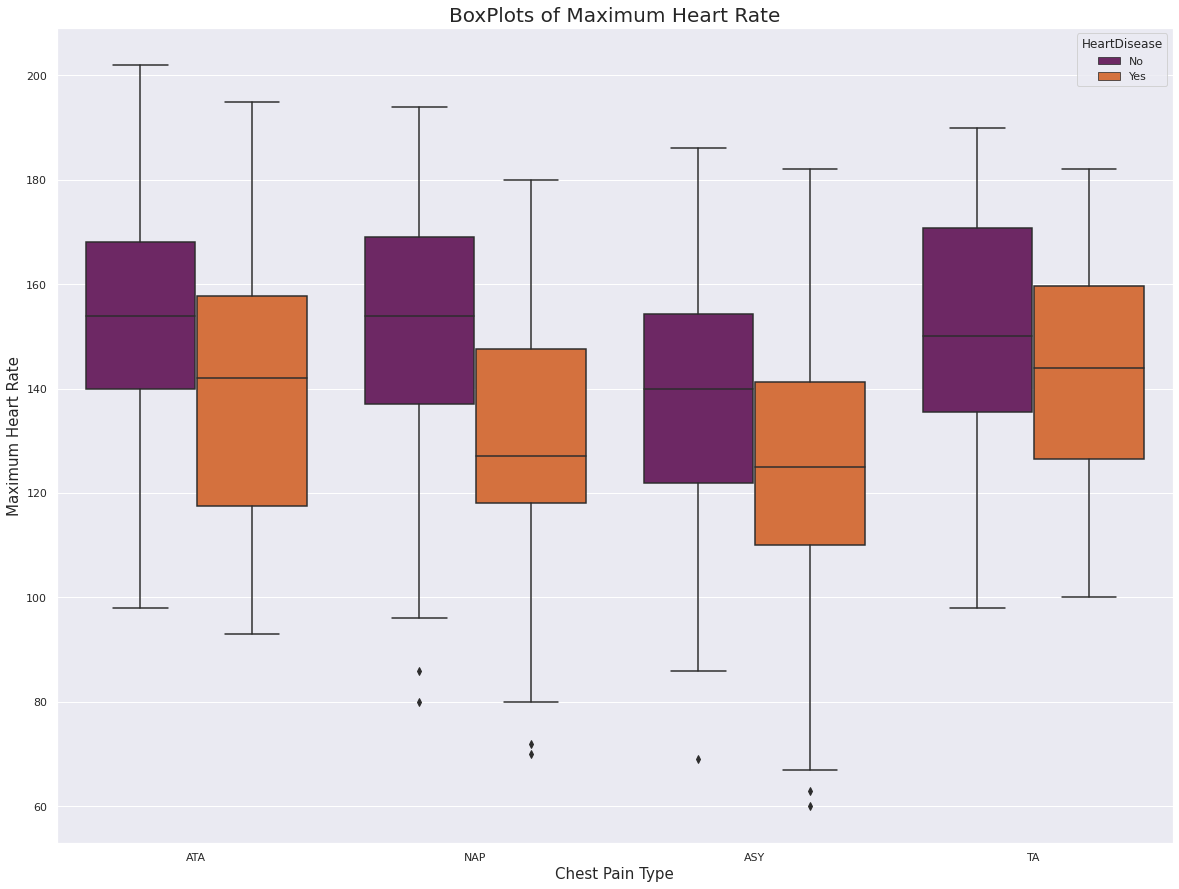

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='ChestPainType', y='MaxHR', hue='HeartDisease', data = df, palette="inferno"); 
plt.ylabel("Maximum Heart Rate", fontsize=15)
plt.xlabel("Chest Pain Type", fontsize=15)
plt.title('BoxPlots of Maximum Heart Rate', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Maximum Heart Rate')

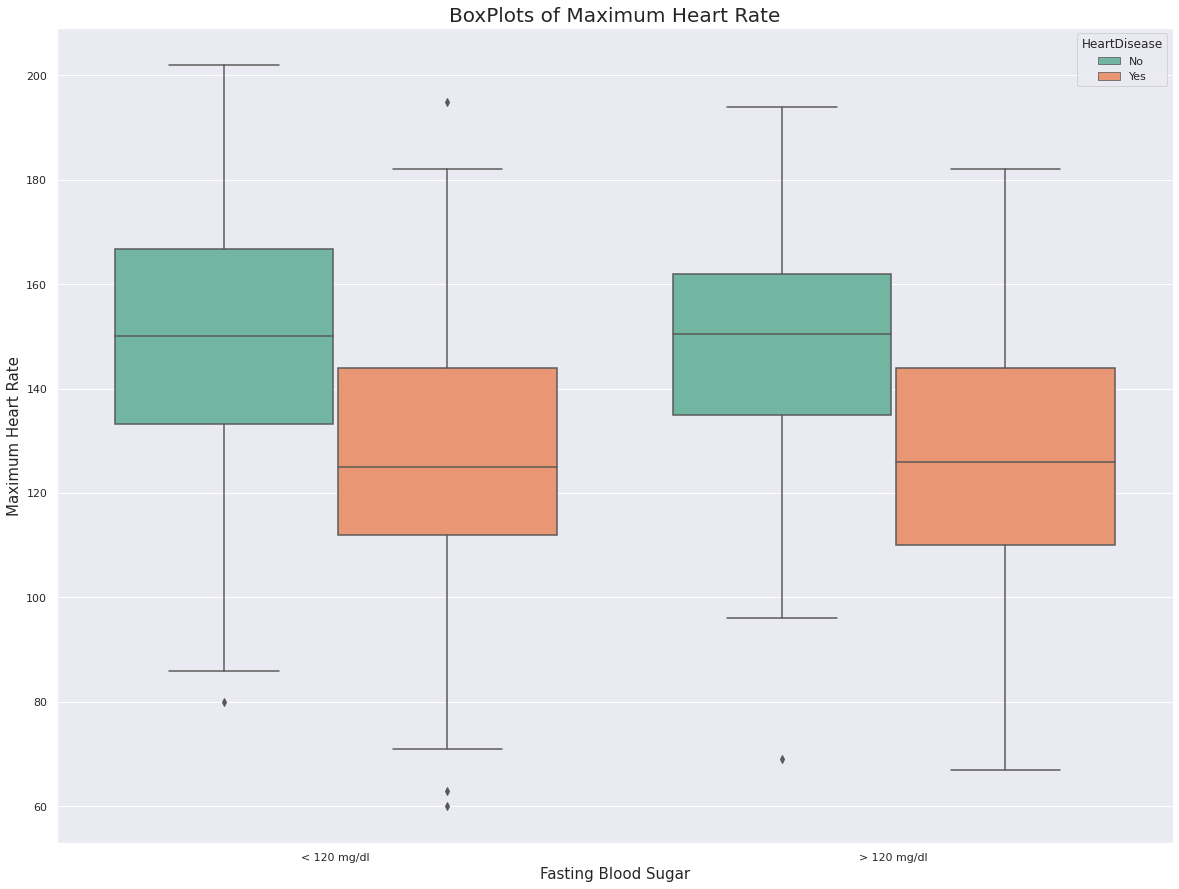

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='FastingBS', y='MaxHR', hue='HeartDisease', data = df, palette="Set2"); 
plt.ylabel("Maximum Heart Rate", fontsize=15)
plt.xlabel("Fasting Blood Sugar", fontsize=15)
plt.title('BoxPlots of Maximum Heart Rate', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Maximum Heart Rate')

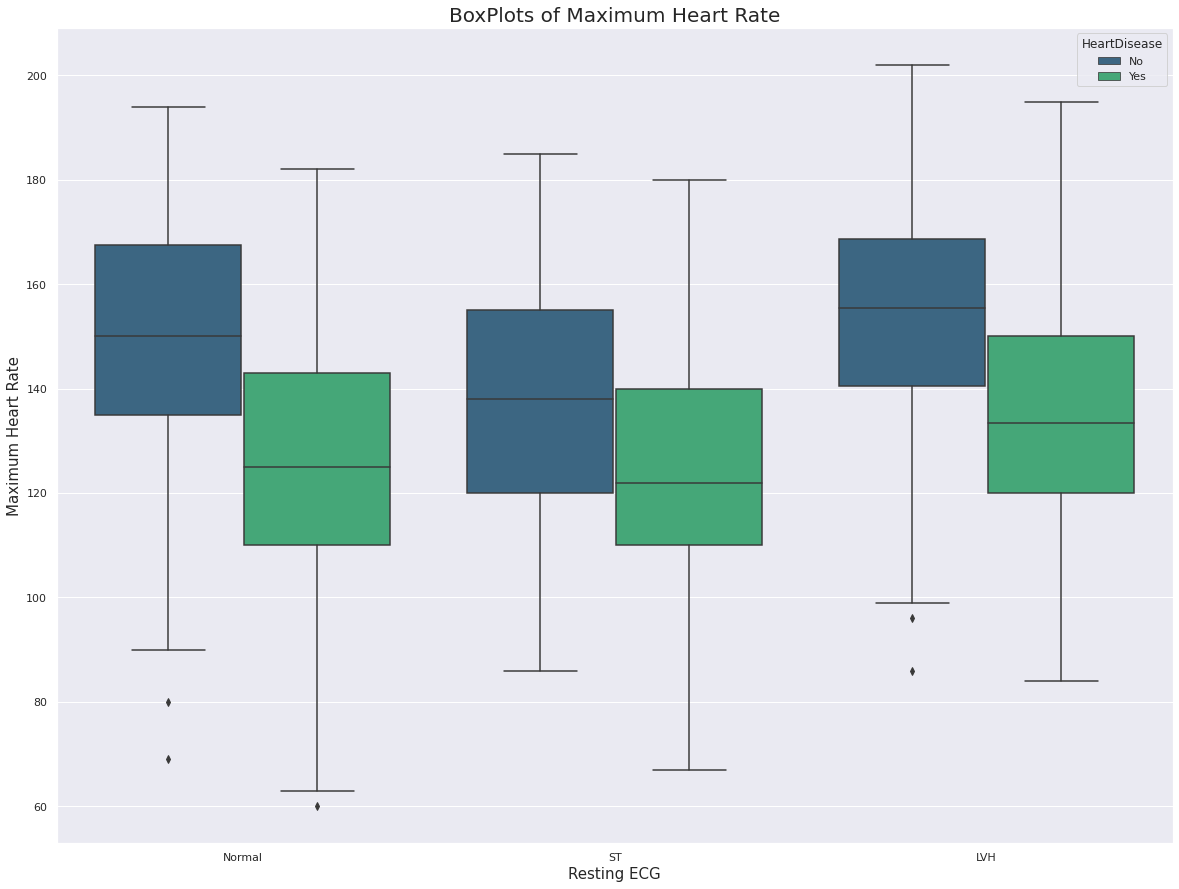

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='RestingECG', y='MaxHR', hue='HeartDisease', data = df, palette="viridis"); 
plt.ylabel("Maximum Heart Rate", fontsize=15)
plt.xlabel("Resting ECG", fontsize=15)
plt.title('BoxPlots of Maximum Heart Rate', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Maximum Heart Rate')

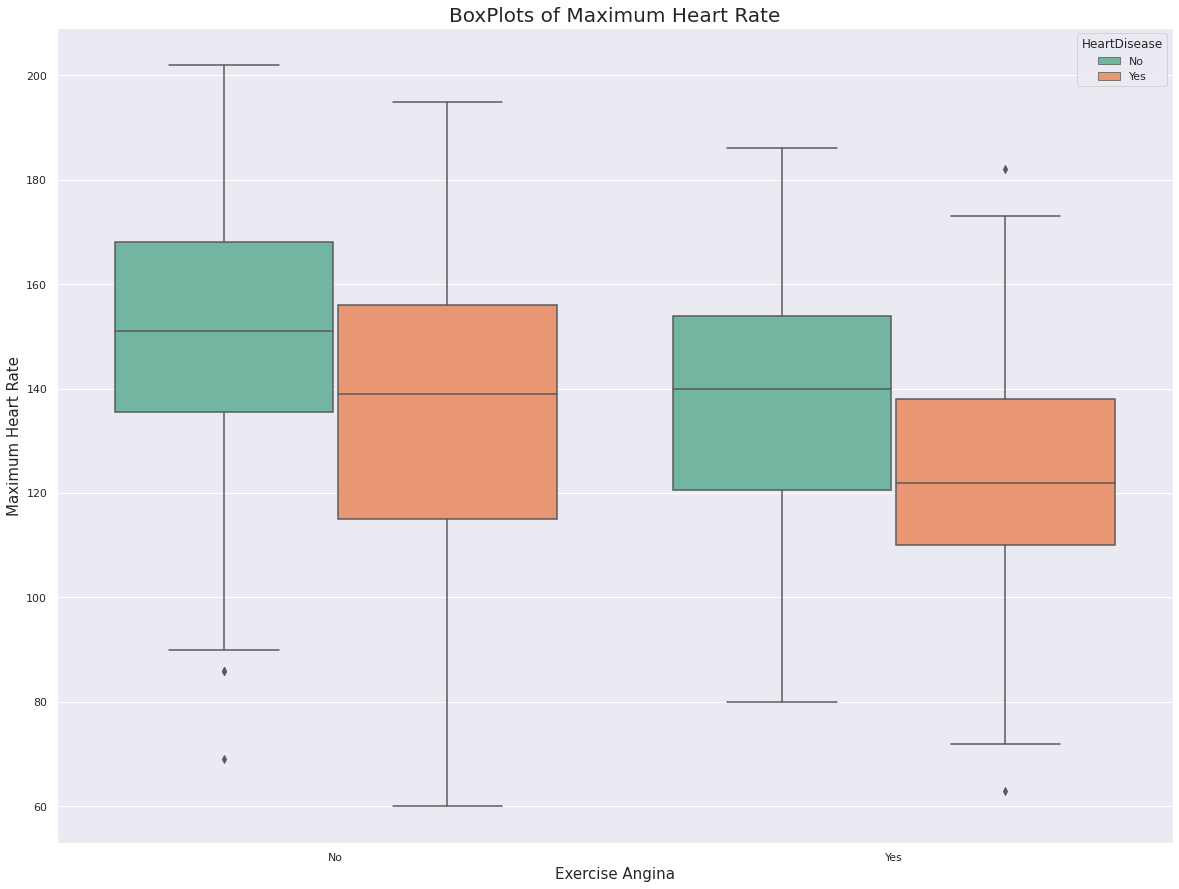

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='ExerciseAngina', y='MaxHR', hue='HeartDisease', data = df, palette="Set2"); 
plt.ylabel("Maximum Heart Rate", fontsize=15)
plt.xlabel("Exercise Angina", fontsize=15)
plt.title('BoxPlots of Maximum Heart Rate', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Maximum Heart Rate')

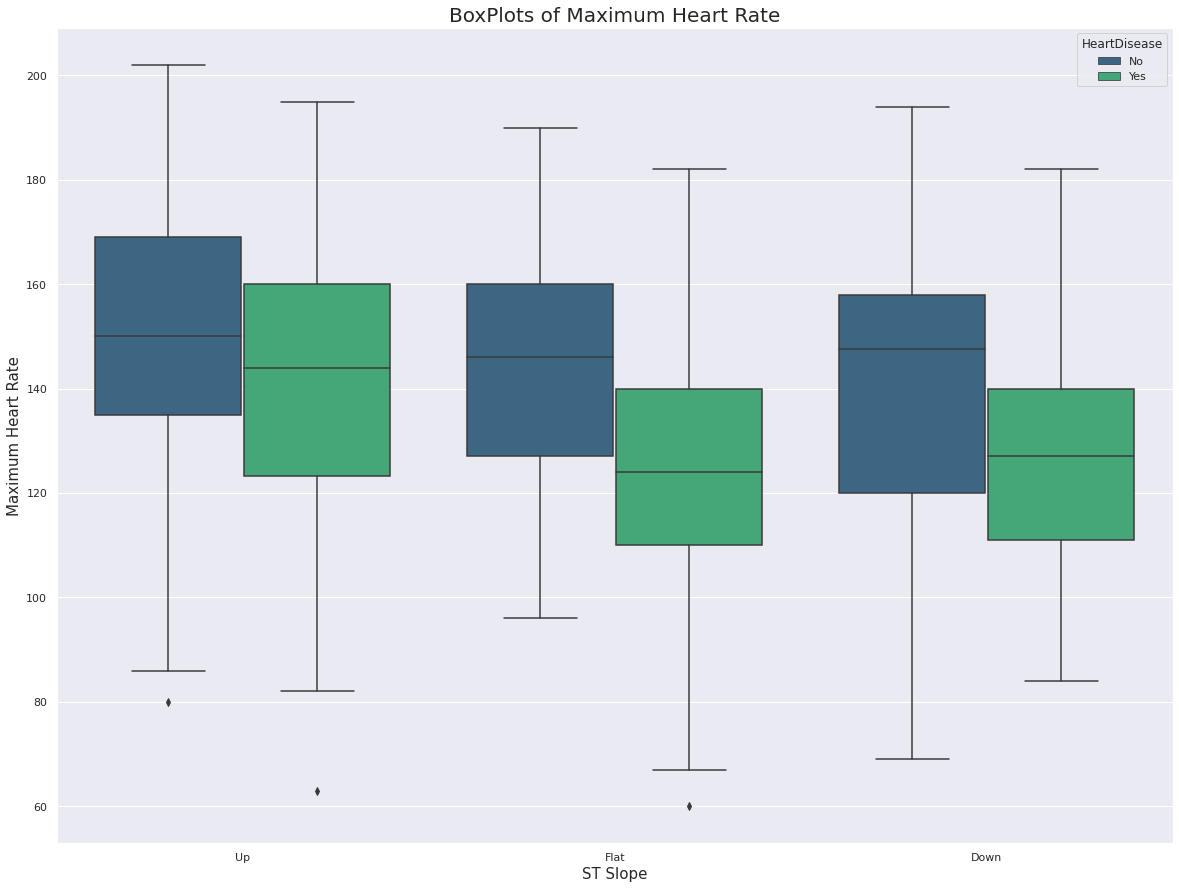

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='ST_Slope', y='MaxHR', hue='HeartDisease', data = df, palette="viridis"); 
plt.ylabel("Maximum Heart Rate", fontsize=15)
plt.xlabel("ST Slope", fontsize=15)
plt.title('BoxPlots of Maximum Heart Rate', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Maximum Heart Rate')

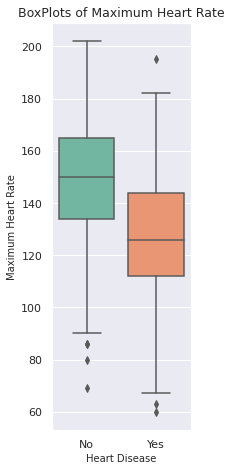

In [ ]:
plt.figure(figsize=(2.5, 7.5))
#plotting box and whiskers plot
plot = sns.boxplot(x='HeartDisease', y='MaxHR', data = df, palette="Set2"); 
plt.ylabel("Maximum Heart Rate", fontsize=10)
plt.xlabel("Heart Disease", fontsize=10)
plt.title('BoxPlots of Maximum Heart Rate', fontsize=12.5)

We can see the trend across all categorical variables is that patients with a low maximum heart rate have higher chances of having heart failure.

### Box and Whiskers Plot for OldPeak



Text(0.5, 1.0, 'BoxPlots of Oldpeak')

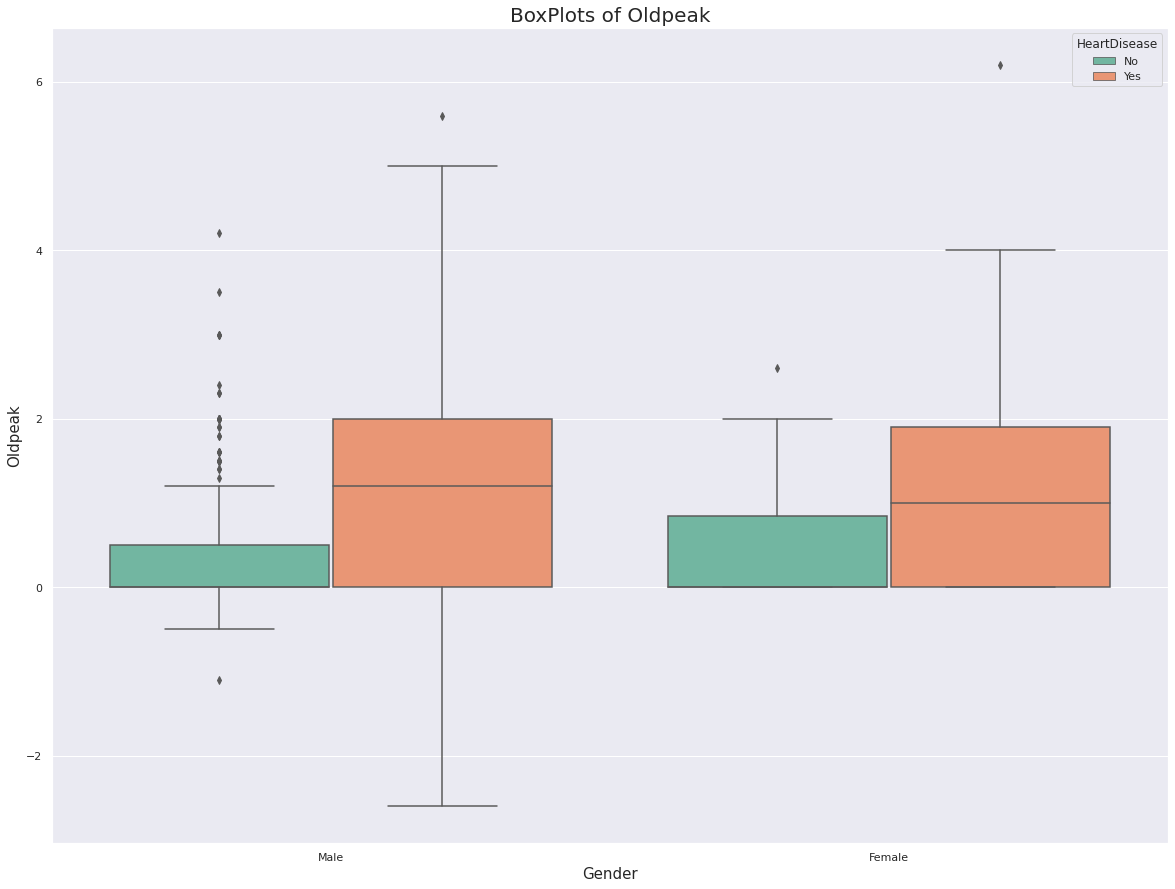

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='Sex', y='Oldpeak', hue='HeartDisease', data = df, palette="Set2"); 
plt.ylabel("Oldpeak", fontsize=15)
plt.xlabel("Gender", fontsize=15)
plt.title('BoxPlots of Oldpeak', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Oldpeak')

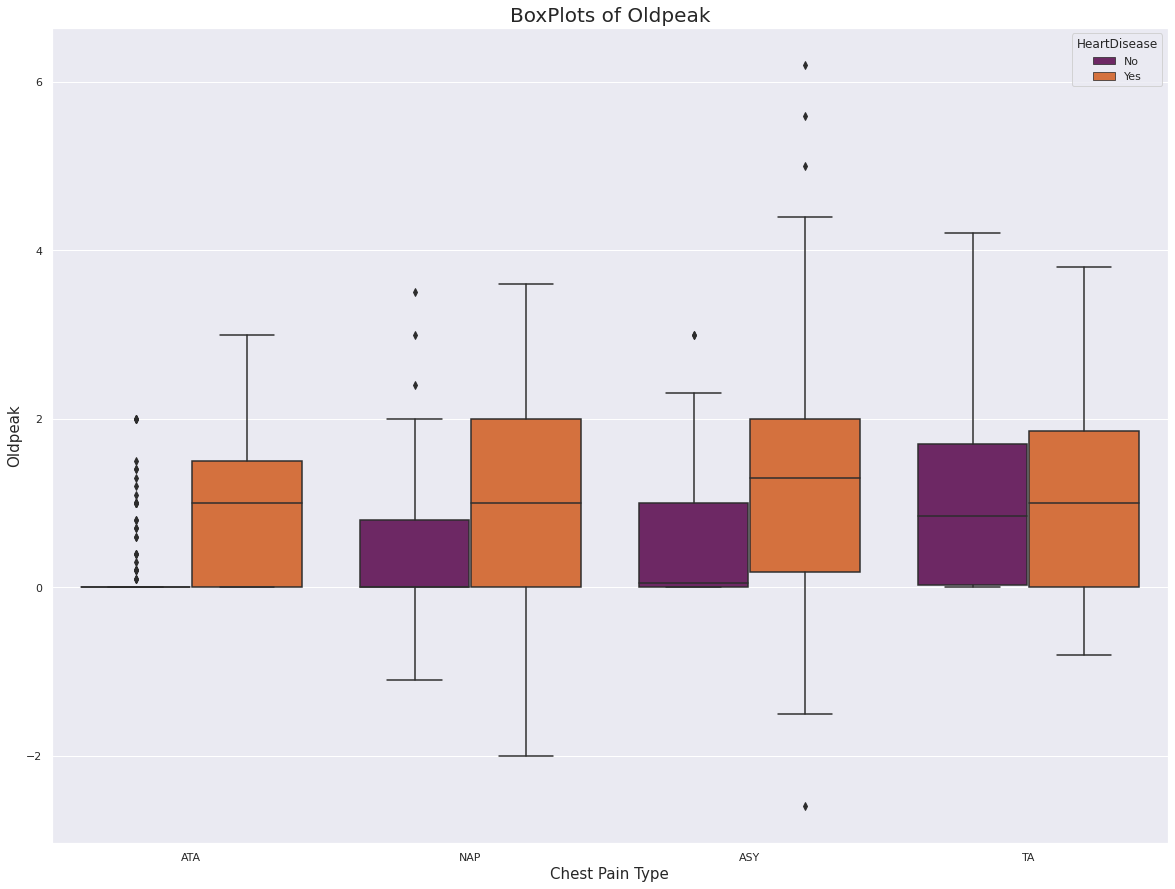

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='ChestPainType', y='Oldpeak', hue='HeartDisease', data = df, palette="inferno"); 
plt.ylabel("Oldpeak", fontsize=15)
plt.xlabel("Chest Pain Type", fontsize=15)
plt.title('BoxPlots of Oldpeak', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Oldpeak')

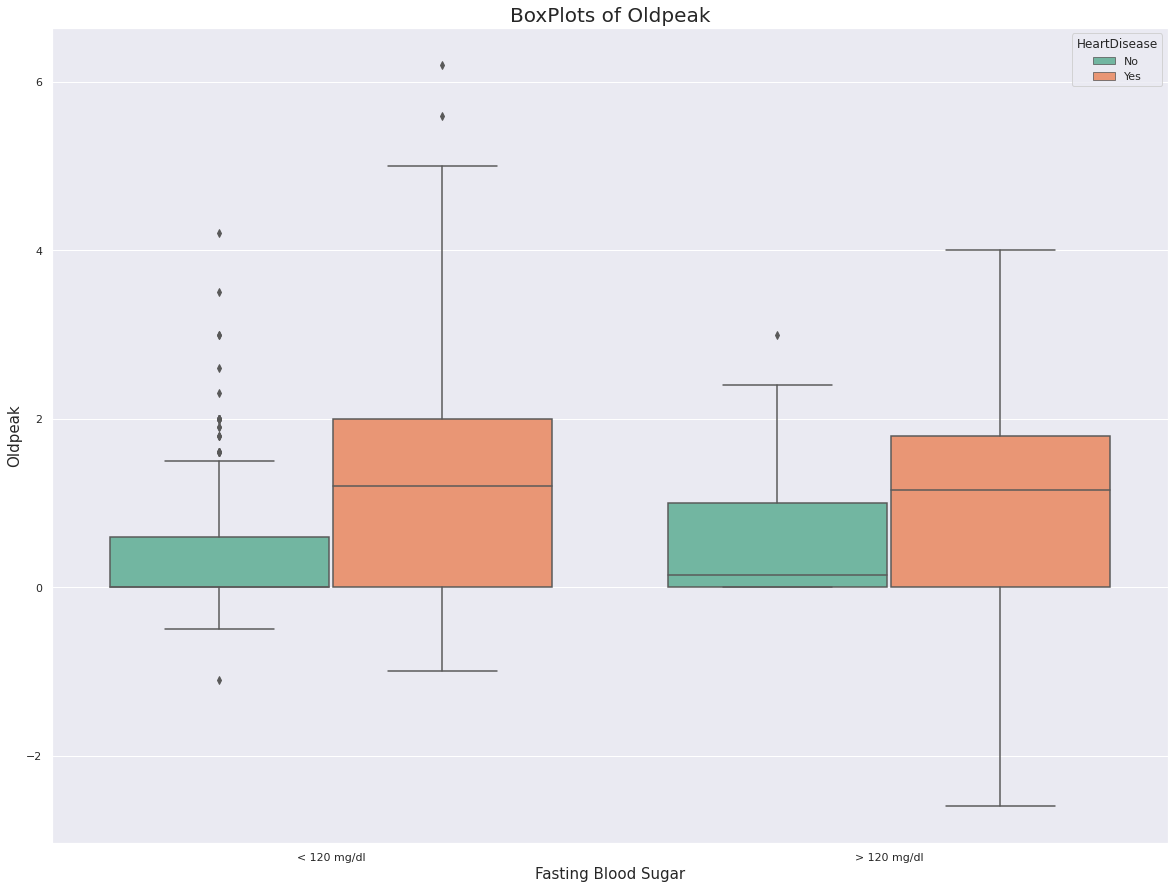

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='FastingBS', y='Oldpeak', hue='HeartDisease', data = df, palette="Set2"); 
plt.ylabel("Oldpeak", fontsize=15)
plt.xlabel("Fasting Blood Sugar", fontsize=15)
plt.title('BoxPlots of Oldpeak', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Oldpeak')

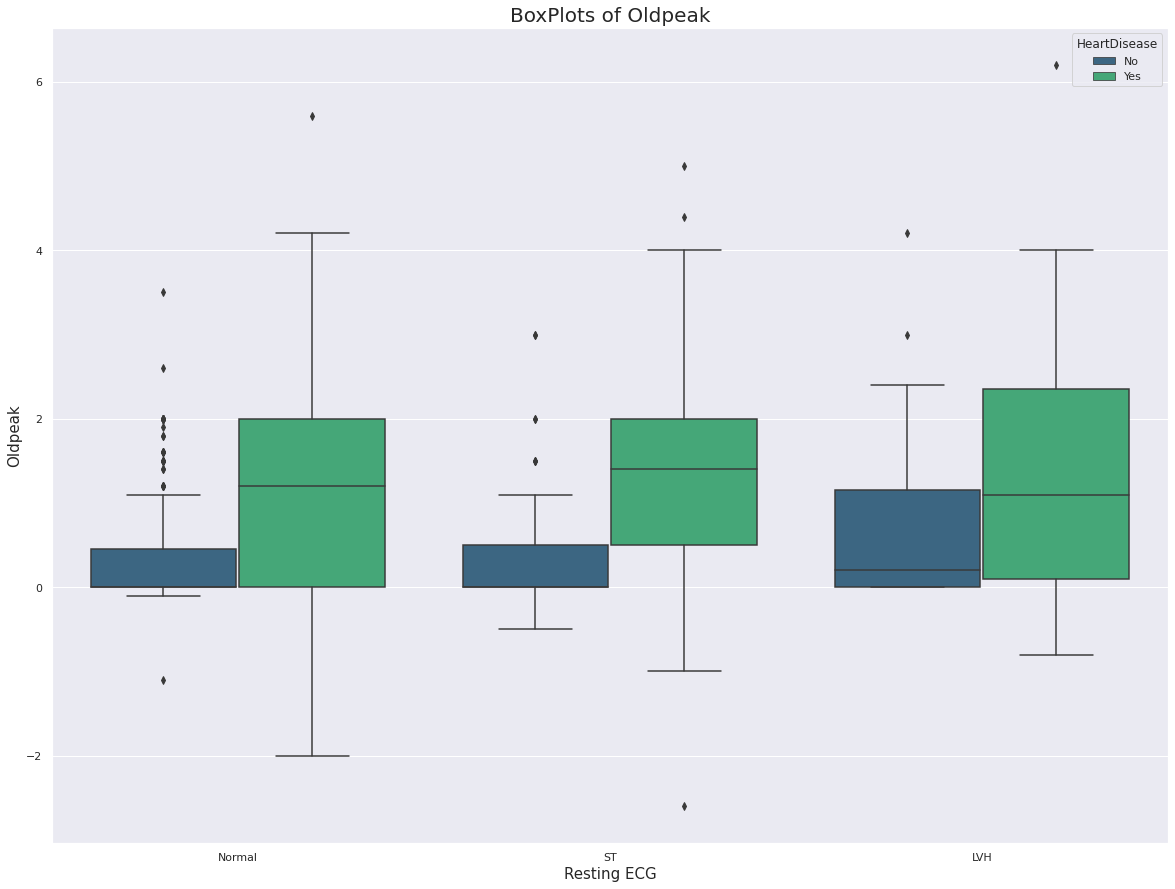

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='RestingECG', y='Oldpeak', hue='HeartDisease', data = df, palette="viridis"); 
plt.ylabel("Oldpeak", fontsize=15)
plt.xlabel("Resting ECG", fontsize=15)
plt.title('BoxPlots of Oldpeak', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Oldpeak')

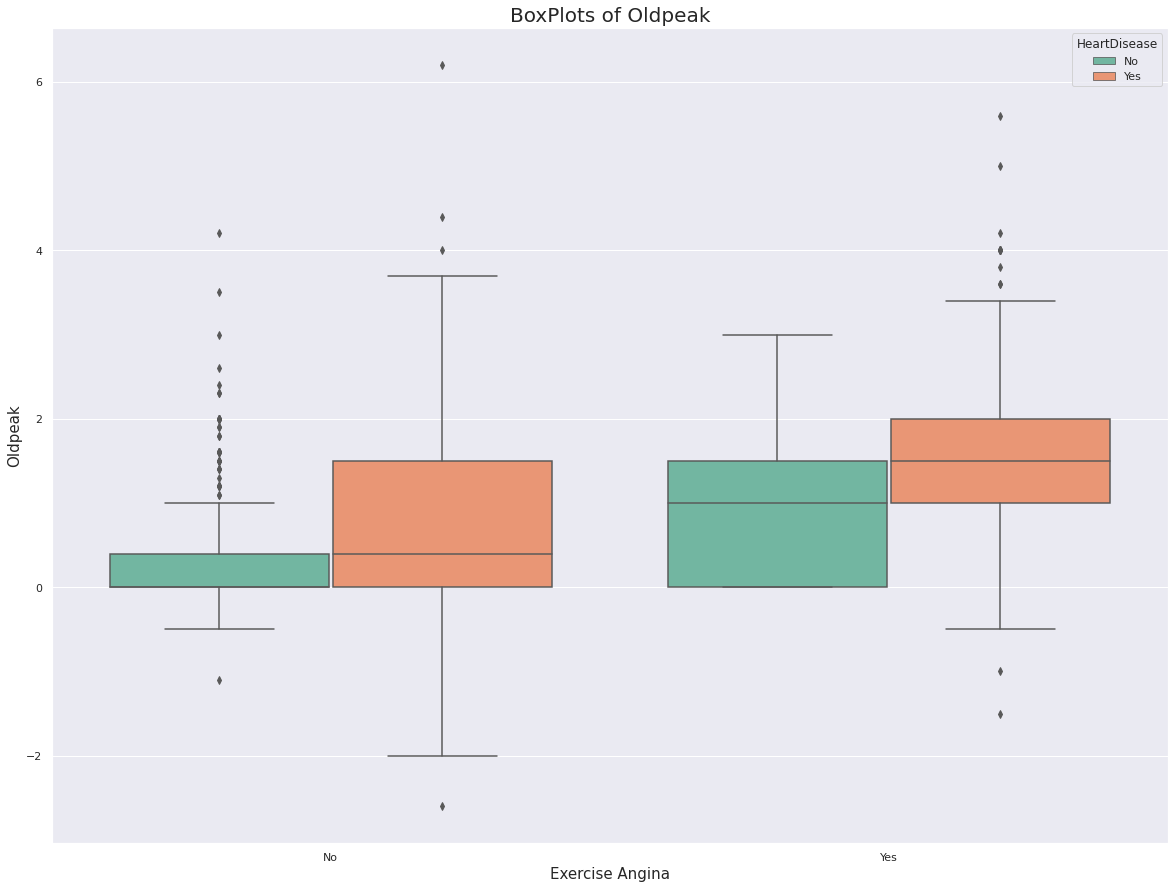

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='ExerciseAngina', y='Oldpeak', hue='HeartDisease', data = df, palette="Set2"); 
plt.ylabel("Oldpeak", fontsize=15)
plt.xlabel("Exercise Angina", fontsize=15)
plt.title('BoxPlots of Oldpeak', fontsize=20)

Text(0.5, 1.0, 'BoxPlots of Oldpeak')

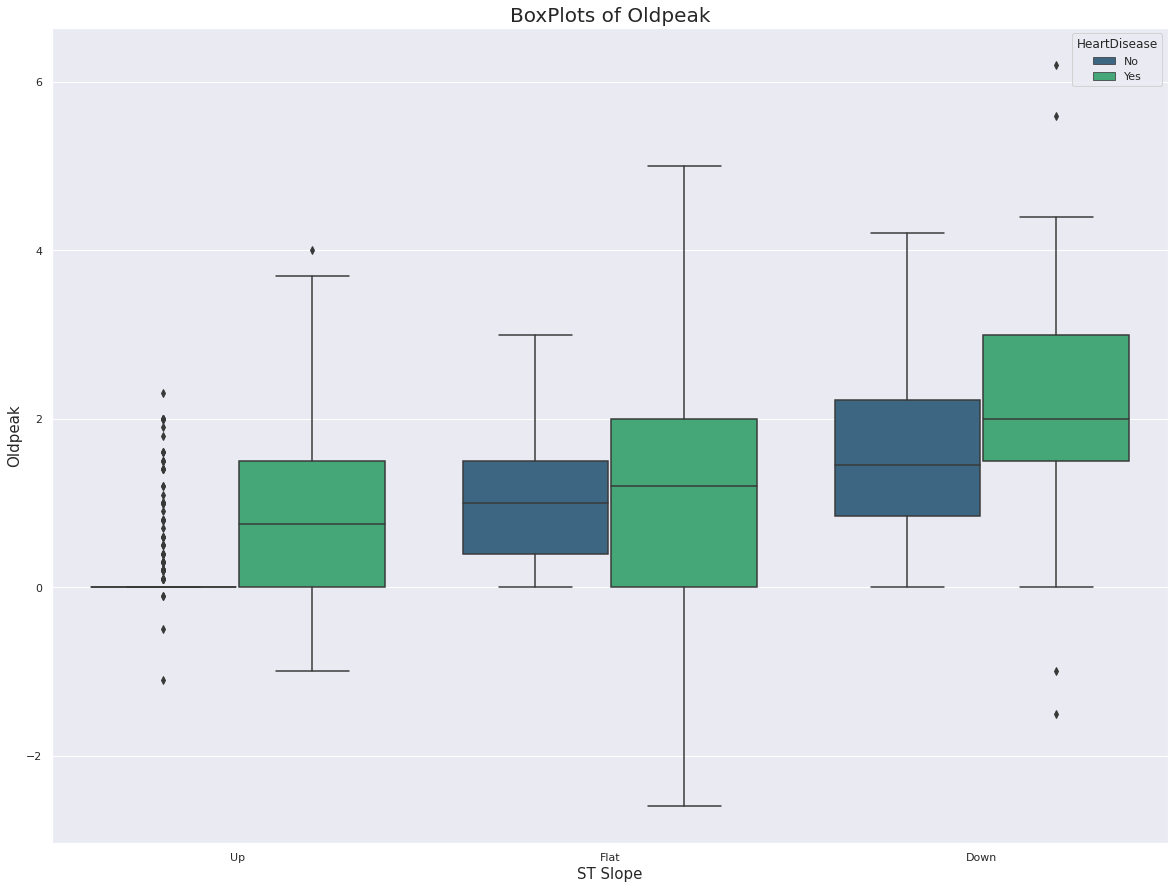

In [ ]:
plt.figure(figsize=(20,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.boxplot(x='ST_Slope', y='Oldpeak', hue='HeartDisease', data = df, palette="viridis"); 
plt.ylabel("Oldpeak", fontsize=15)
plt.xlabel("ST Slope", fontsize=15)
plt.title('BoxPlots of Oldpeak', fontsize=20)

In all of these, we see that there is more variance in oldpeak values 

## Histogram Plot

For each continous variable plotting their histogram plots

Text(0.5, 1.0, 'Histogram of Resting Blood Pressure')

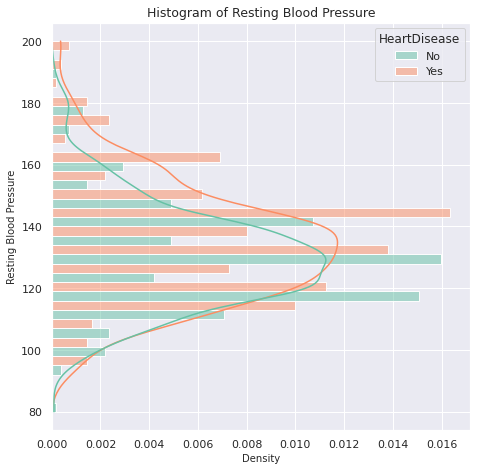

In [ ]:
plt.figure(figsize=(7.5, 7.5))
sns.set_theme(style="darkgrid")
#plotting histogram plot
plot = sns.histplot(data=df, y="RestingBP", hue='HeartDisease', bins=20, multiple="dodge", stat="density", kde=True, palette="Set2")
plt.xlabel("Density", fontsize=10)
plt.ylabel("Resting Blood Pressure", fontsize=10)
plt.title('Histogram of Resting Blood Pressure', fontsize=12.5)

We see that for reesting Blood Pressure, patients with heart disease have a peka at higher resting Blood Pressure.

Text(0.5, 1.0, 'Histogram of Cholesterol')

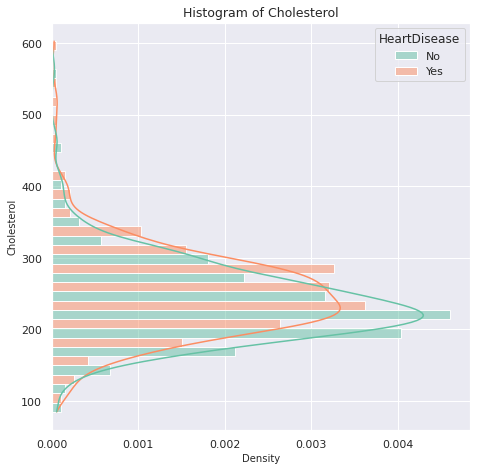

In [ ]:
bool=df['Cholesterol']!=0
df_chol=df[bool]
plt.figure(figsize=(7.5, 7.5))
#plotting histogram
plot = sns.histplot(data=df_chol, y="Cholesterol", hue='HeartDisease', bins=20, multiple="dodge", stat="density", kde=True, palette="Set2")
#plot = sns.boxplot(x='Sex', y='RestingBP', hue='HeartDisease', data = df, palette="Set2"); 
plt.xlabel("Density", fontsize=10)
plt.ylabel("Cholesterol", fontsize=10)
plt.title('Histogram of Cholesterol', fontsize=12.5)

We see that for Cholesterol, patients with heart disease have a peak at higher Cholesterol Level.

Text(0.5, 1.0, 'Histogram of Age')

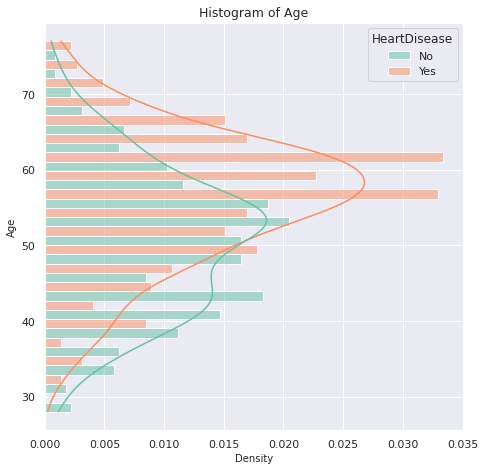

In [ ]:
plt.figure(figsize=(7.5, 7.5))
sns.set_theme(style="darkgrid")
plot = sns.histplot(data=df, y="Age", hue='HeartDisease', bins=20, multiple="dodge", stat="density", kde=True, palette="Set2")
#plot = sns.boxplot(x='Sex', y='RestingBP', hue='HeartDisease', data = df, palette="Set2"); 
plt.xlabel("Density", fontsize=10)
plt.ylabel("Age", fontsize=10)
plt.title('Histogram of Age', fontsize=12.5)

Significant difference can be seen, people with heart failure have a peak at a higher age

Text(0.5, 1.0, 'Histogram of Maximum Heart Rate')

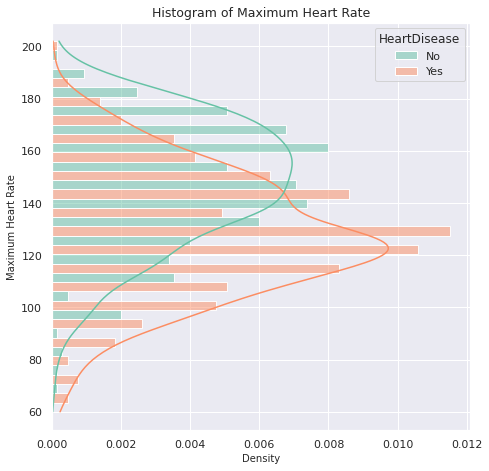

In [ ]:
plt.figure(figsize=(7.5, 7.5))
plot = sns.histplot(data=df, y="MaxHR", hue='HeartDisease', bins=20, multiple="dodge", stat="density", kde=True, palette="Set2")
#plot = sns.boxplot(x='Sex', y='RestingBP', hue='HeartDisease', data = df, palette="Set2"); 
plt.xlabel("Density", fontsize=10)
plt.ylabel("Maximum Heart Rate", fontsize=10)
plt.title('Histogram of Maximum Heart Rate', fontsize=12.5)

As seen in the boxplot, we can see that people with heart failure peak at a lower maximum heart rate

Text(0.5, 1.0, 'Histogram of Old Peak')

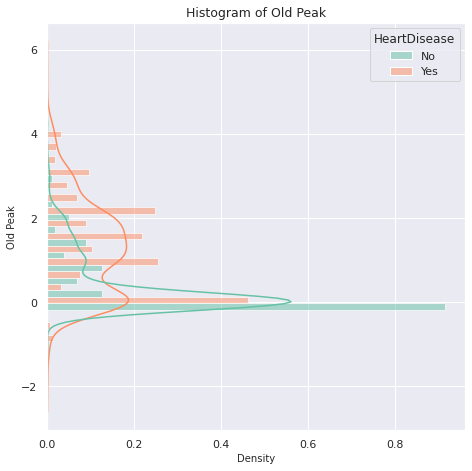

In [ ]:
plt.figure(figsize=(7.5, 7.5))
plot = sns.histplot(data=df, y="Oldpeak", hue='HeartDisease', multiple="dodge", stat="density", kde=True, palette="Set2")
#plot = sns.boxplot(x='Sex', y='RestingBP', hue='HeartDisease', data = df, palette="Set2"); 
plt.xlabel("Density", fontsize=10)
plt.ylabel("Old Peak", fontsize=10)
plt.title('Histogram of Old Peak', fontsize=12.5)

We see that for people without heart failure have oldpeak values clustered around 0

## Joint Plots

### Joint Histogram Plots

Text(0.5, 1.0, 'Joint Plot')

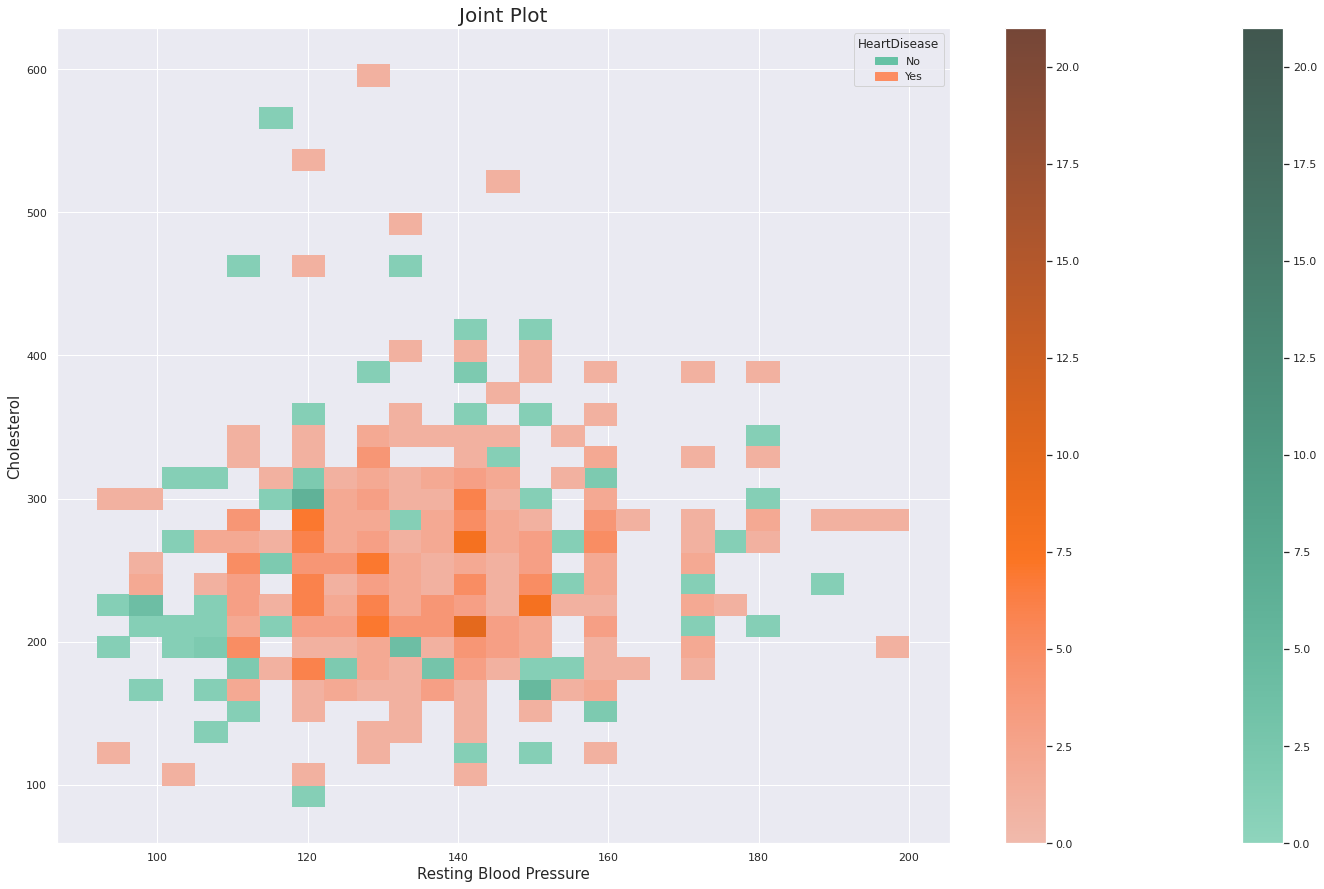

In [ ]:
plt.figure(figsize=(25,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.histplot(x="RestingBP", y="Cholesterol", hue='HeartDisease', data=df_chol, stat="count", cbar=True, palette="Set2")
plt.ylabel("Cholesterol", fontsize=15)
plt.xlabel("Resting Blood Pressure", fontsize=15)
plt.title('Joint Plot', fontsize=20)

Text(0.5, 1.0, 'Joint Plot')

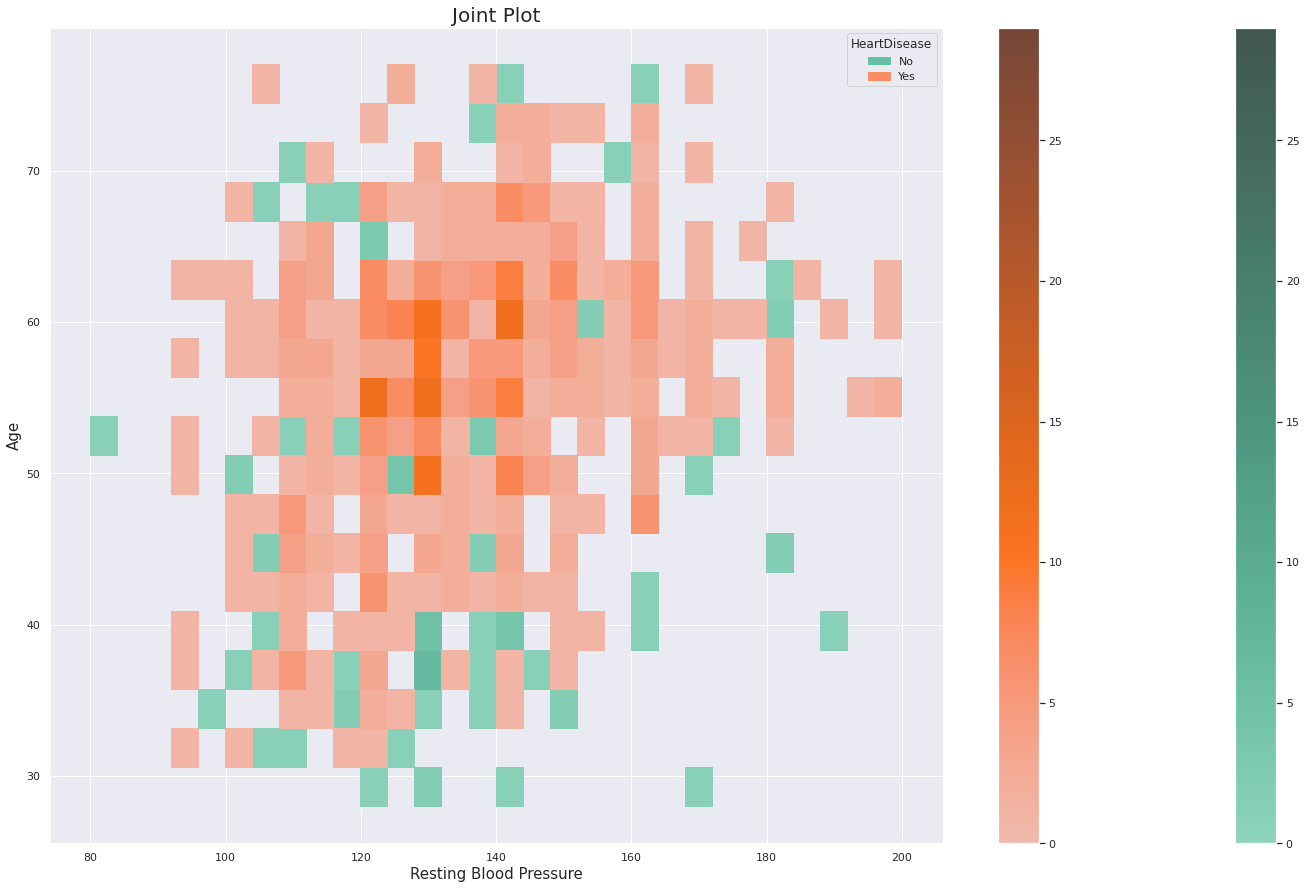

In [ ]:
plt.figure(figsize=(25,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.histplot(x="RestingBP", y="Age", hue='HeartDisease', data=df, stat="count", cbar=True, palette="Set2")
plt.ylabel("Age", fontsize=15)
plt.xlabel("Resting Blood Pressure", fontsize=15)
plt.title('Joint Plot', fontsize=20)

Text(0.5, 1.0, 'Joint Plot')

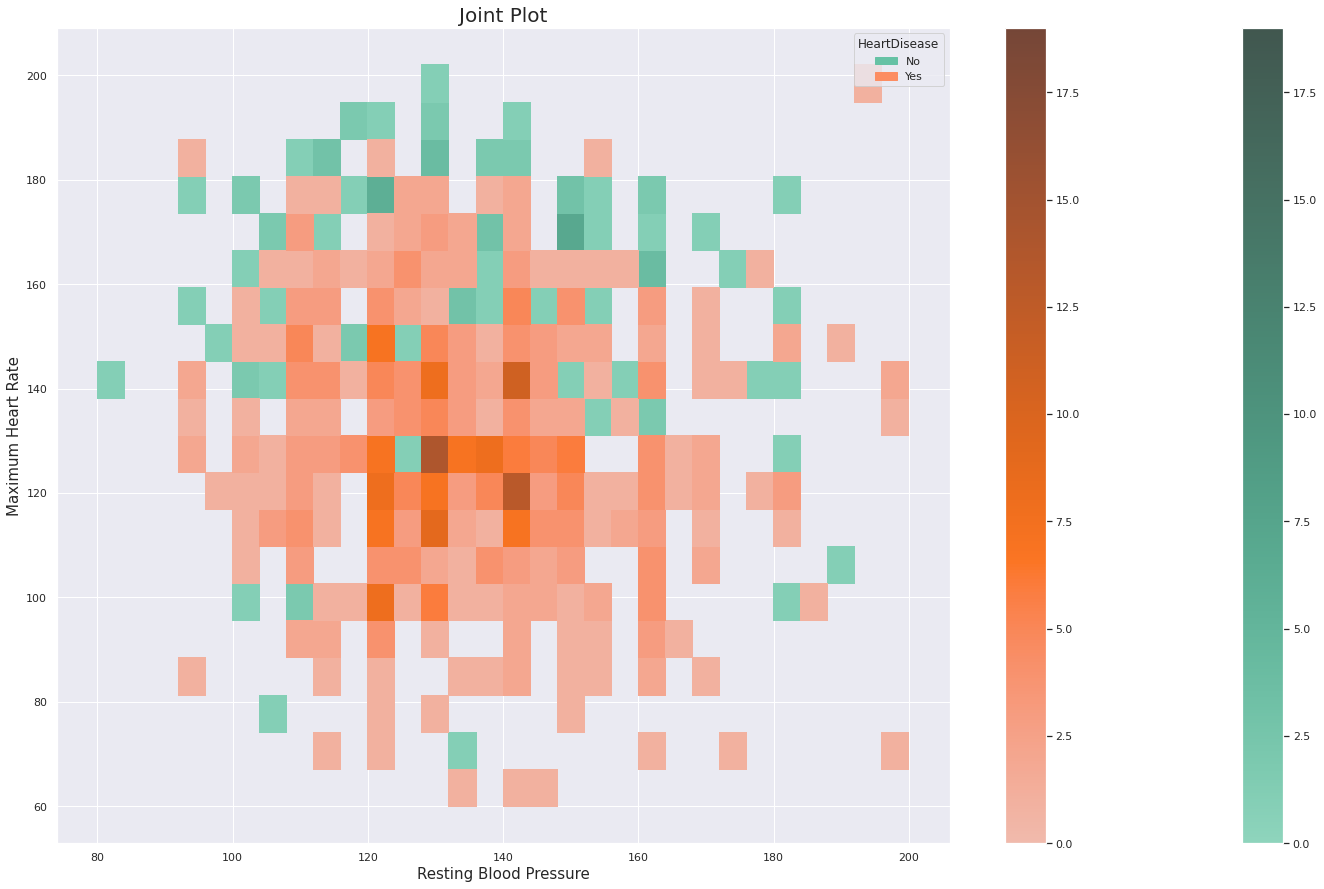

In [ ]:
plt.figure(figsize=(25,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.histplot(x="RestingBP", y="MaxHR", hue='HeartDisease', data=df, stat="count", cbar=True, palette="Set2")
plt.ylabel("Maximum Heart Rate", fontsize=15)
plt.xlabel("Resting Blood Pressure", fontsize=15)
plt.title('Joint Plot', fontsize=20)

Text(0.5, 1.0, 'Joint Plot')

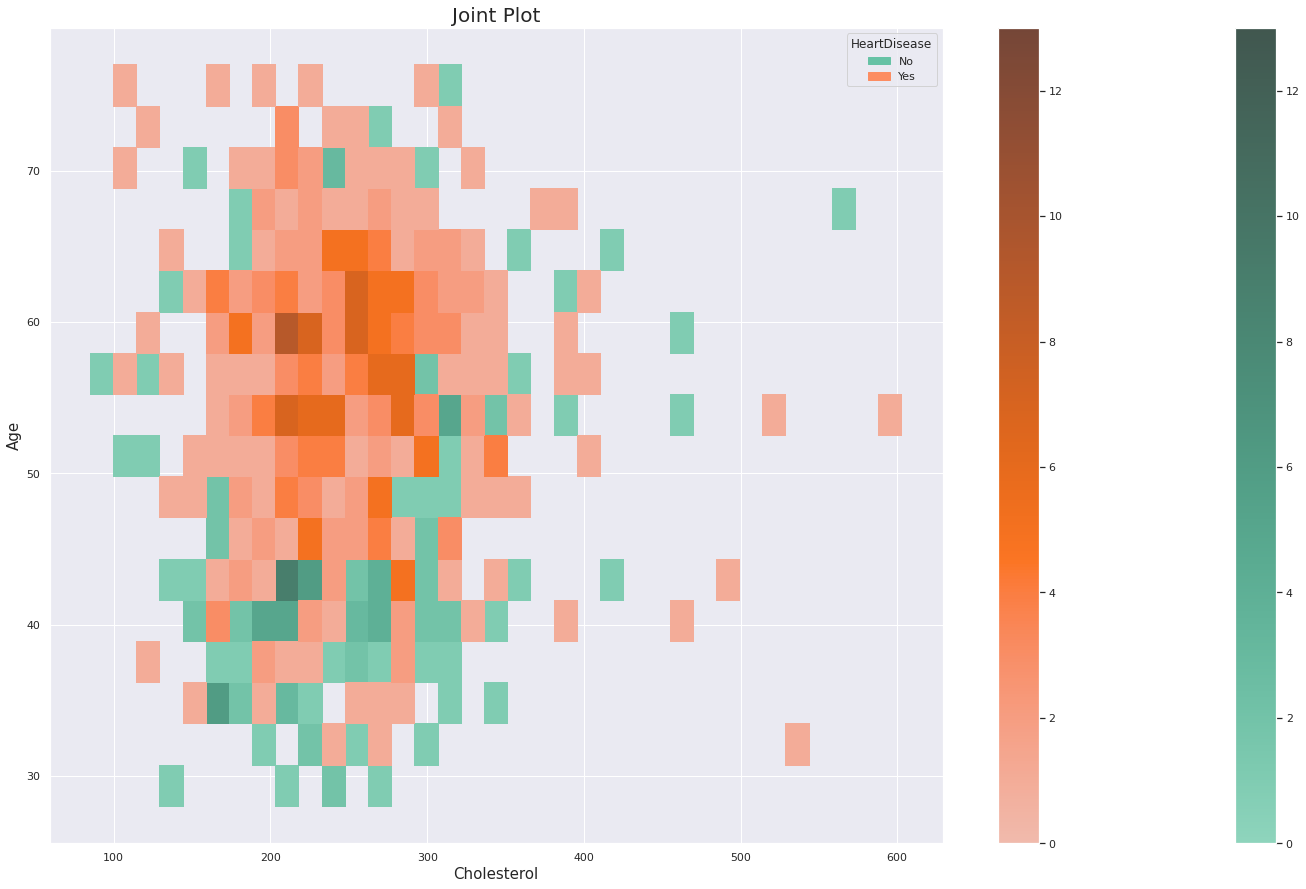

In [ ]:
plt.figure(figsize=(25,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.histplot(x="Cholesterol", y="Age", hue='HeartDisease', data=df_chol, stat="count", cbar=True, palette="Set2")
plt.ylabel("Age", fontsize=15)
plt.xlabel("Cholesterol", fontsize=15)
plt.title('Joint Plot', fontsize=20)

Text(0.5, 1.0, 'Joint Plot')

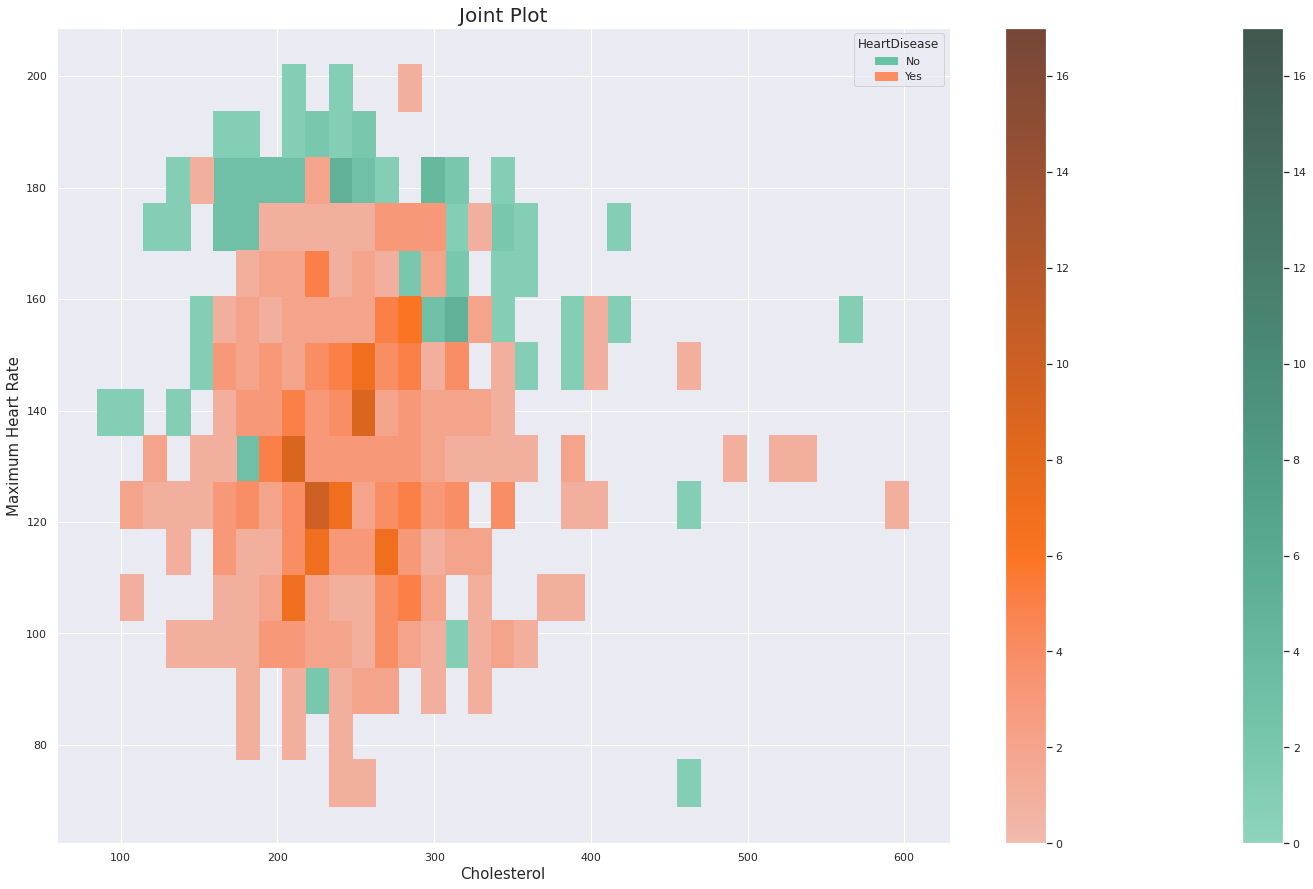

In [ ]:
plt.figure(figsize=(25,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.histplot(x="Cholesterol", y="MaxHR", hue='HeartDisease', data=df_chol, stat="count", cbar=True, palette="Set2")
plt.ylabel("Maximum Heart Rate", fontsize=15)
plt.xlabel("Cholesterol", fontsize=15)
plt.title('Joint Plot', fontsize=20)

Text(0.5, 1.0, 'Joint Plot')

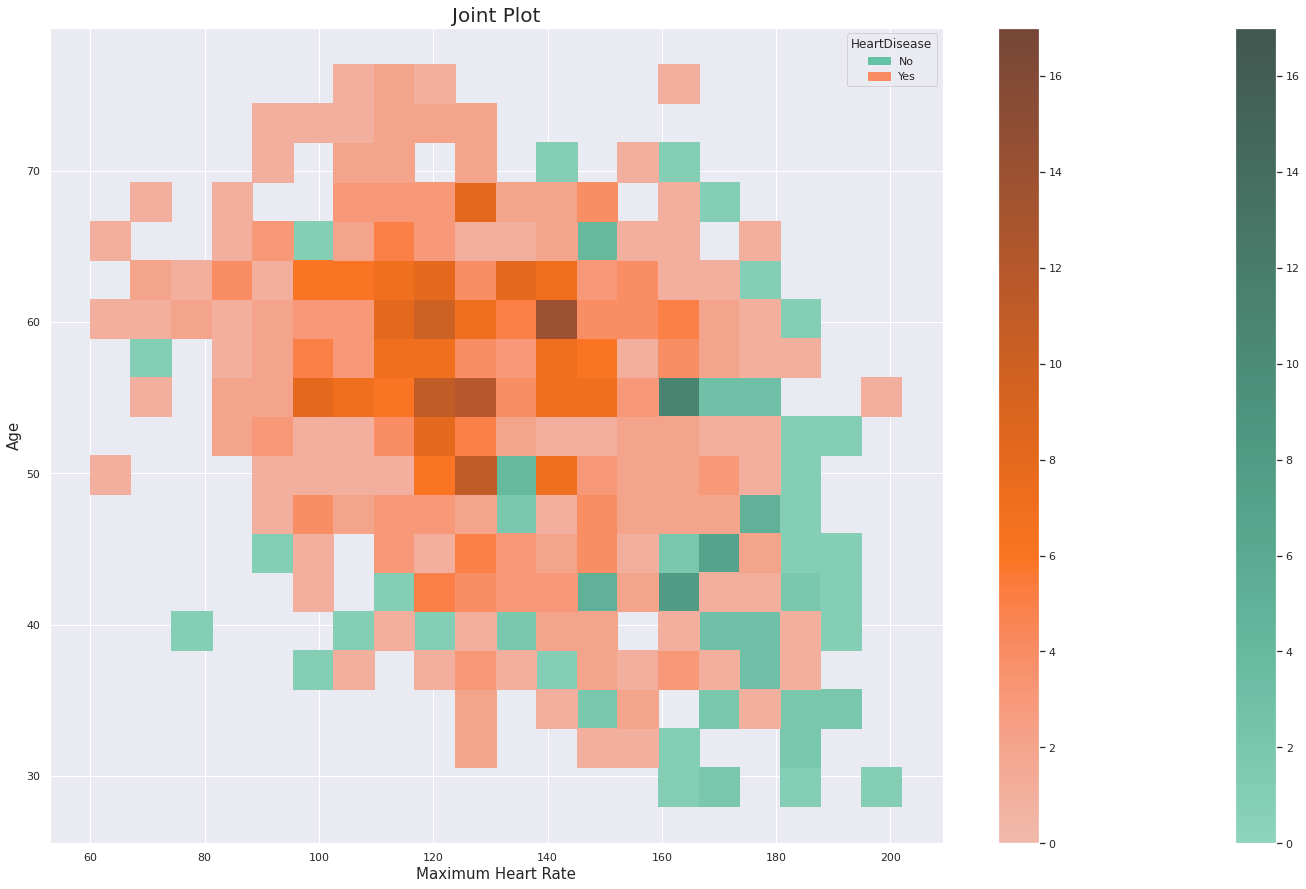

In [ ]:
plt.figure(figsize=(25,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.histplot(x="MaxHR", y="Age", hue='HeartDisease', data=df, stat="count", cbar=True, palette="Set2")
plt.ylabel("Age", fontsize=15)
plt.xlabel("Maximum Heart Rate", fontsize=15)
plt.title('Joint Plot', fontsize=20)

### Joint Plots of numerical variales (KDE and RegPlots)

#### Resting BP

Text(0.5, 85.99999999999991, 'Resting Blood Pressure')

<Figure size 1800x1080 with 0 Axes>

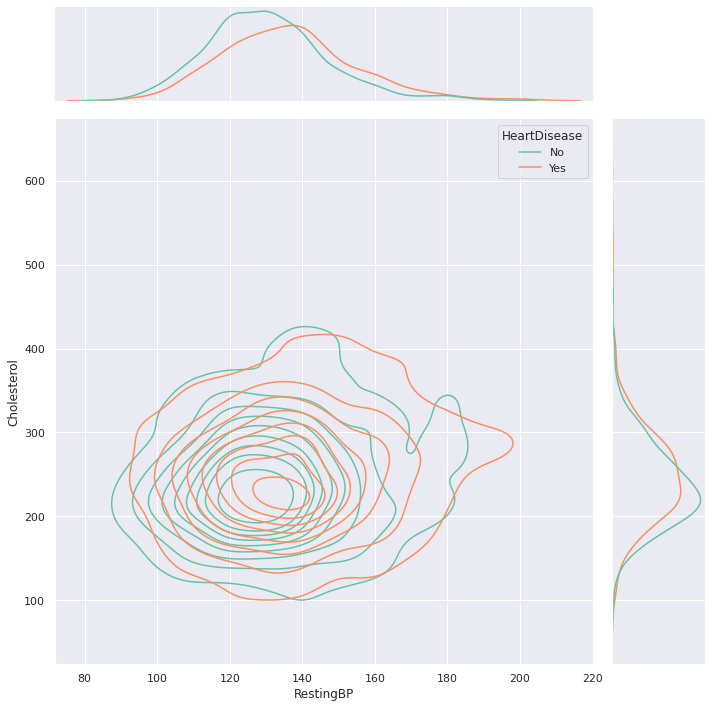

In [ ]:
bool=df['Cholesterol']!=0
df_chol=df[bool]
plt.figure(figsize=(25,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.jointplot(data=df_chol, x="RestingBP", y="Cholesterol", hue='HeartDisease', kind="kde", palette="Set2", height=10)
plt.ylabel("Cholesterol", fontsize=15)
plt.xlabel("Resting Blood Pressure", fontsize=15)
#plt.title('Joint Plot', fontsize=20)

Text(0.5, 85.99999999999991, 'Resting Blood Pressure')

<Figure size 1800x1080 with 0 Axes>

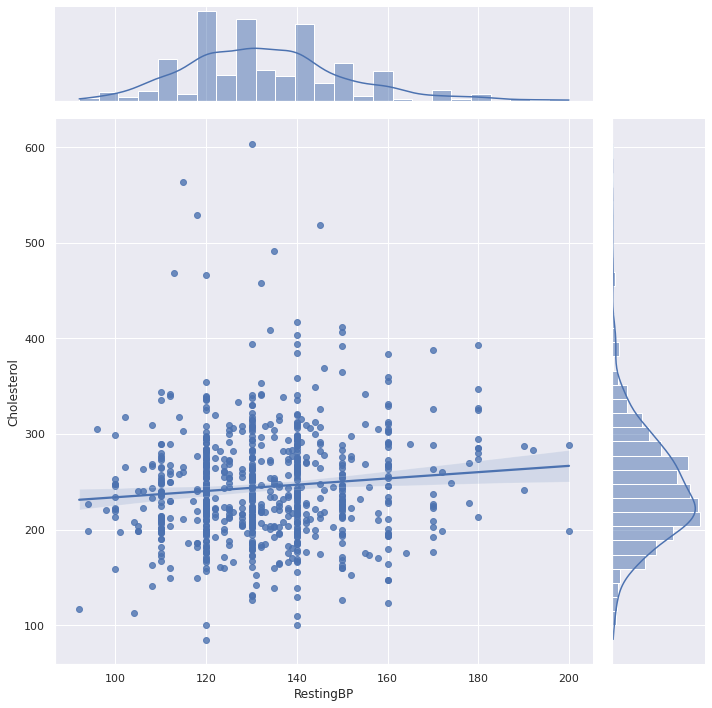

In [ ]:
bool=df['Cholesterol']!=0
df_chol=df[bool]
plt.figure(figsize=(25,15))
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.jointplot(data=df_chol, x="RestingBP", y="Cholesterol", kind="reg", height=10)
plt.ylabel("Cholesterol", fontsize=15)
plt.xlabel("Resting Blood Pressure", fontsize=15)
#plt.title('Joint Plot', fontsize=20)

Text(0.5, 85.99999999999991, 'Resting Blood Pressure')

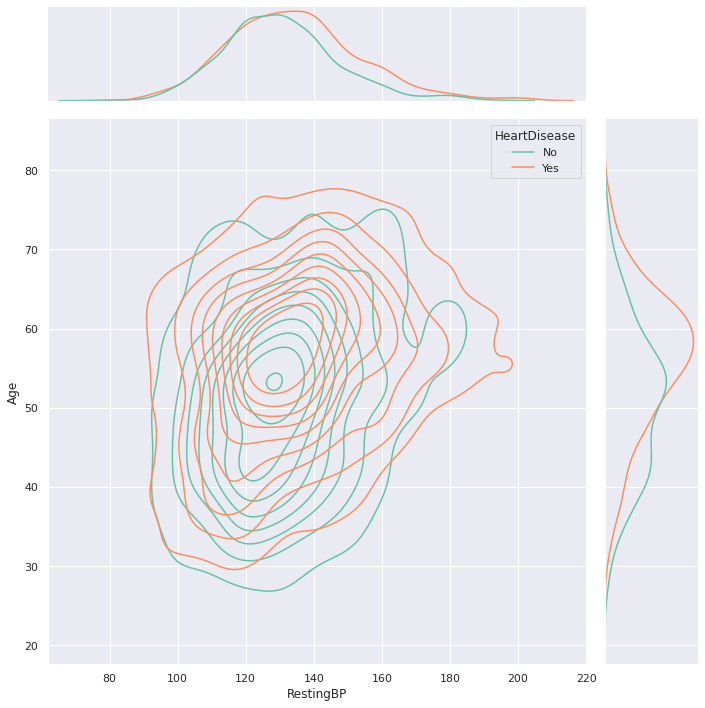

In [ ]:
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.jointplot(data=df, x="RestingBP", y="Age", hue='HeartDisease', kind="kde", palette="Set2", height=10)
plt.ylabel("Age", fontsize=10)
plt.xlabel("Resting Blood Pressure", fontsize=10)
#plt.title('Joint Plot', fontsize=20)

Text(564.2857142857143, 0.5, 'Resting Blood Pressure')

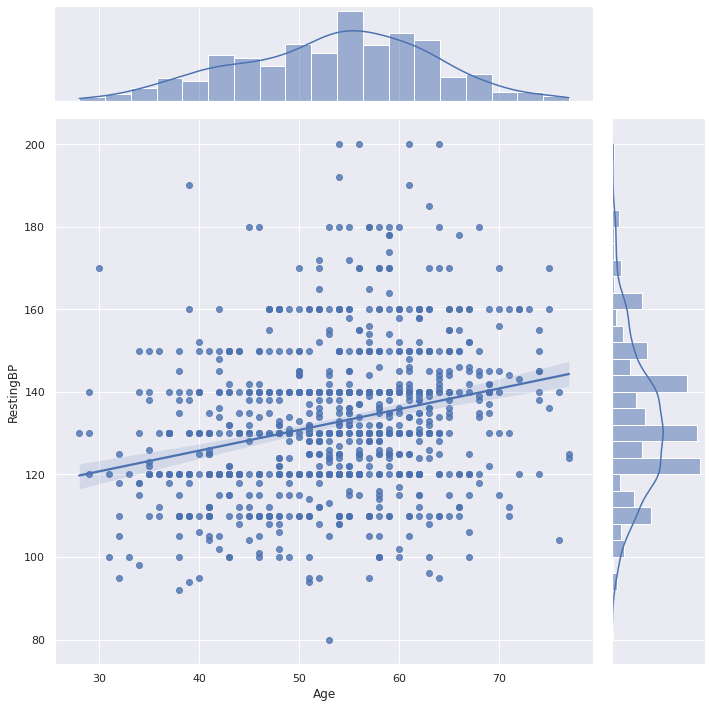

In [ ]:
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.jointplot(data=df, y="RestingBP", x="Age", kind="reg", height=10)
plt.xlabel("Age", fontsize=10)
plt.ylabel("Resting Blood Pressure", fontsize=10)
#plt.title('Joint Plot', fontsize=20)

Text(0.5, 85.99999999999991, 'Resting Blood Pressure')

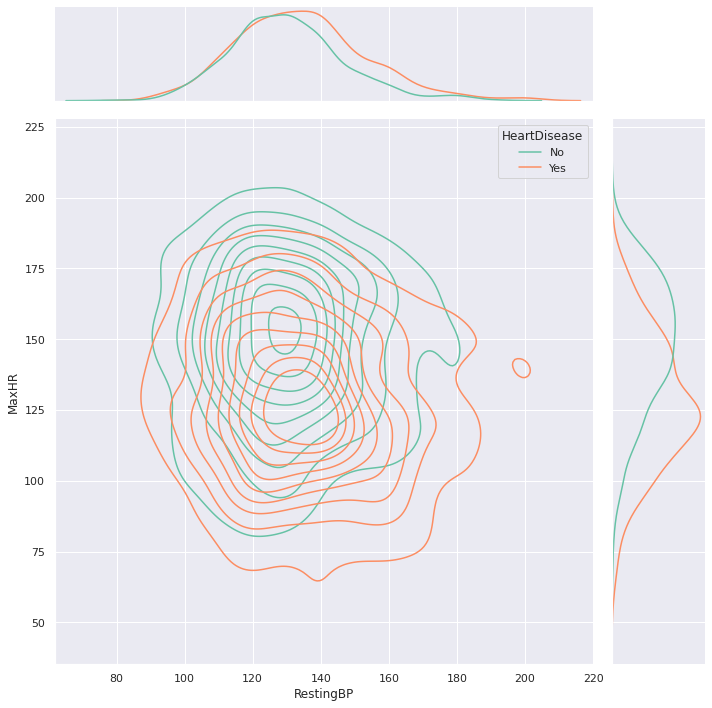

In [ ]:
sns.set_theme(style="darkgrid")
plot = sns.jointplot(data=df, x="RestingBP", y="MaxHR", hue='HeartDisease', kind="kde", palette="Set2", height=10)
plt.ylabel("Maximum Heart Rate", fontsize=15)
plt.xlabel("Resting Blood Pressure", fontsize=15)
#plt.title('Joint Plot', fontsize=20)

Text(0.5, 85.99999999999991, 'Resting Blood Pressure')

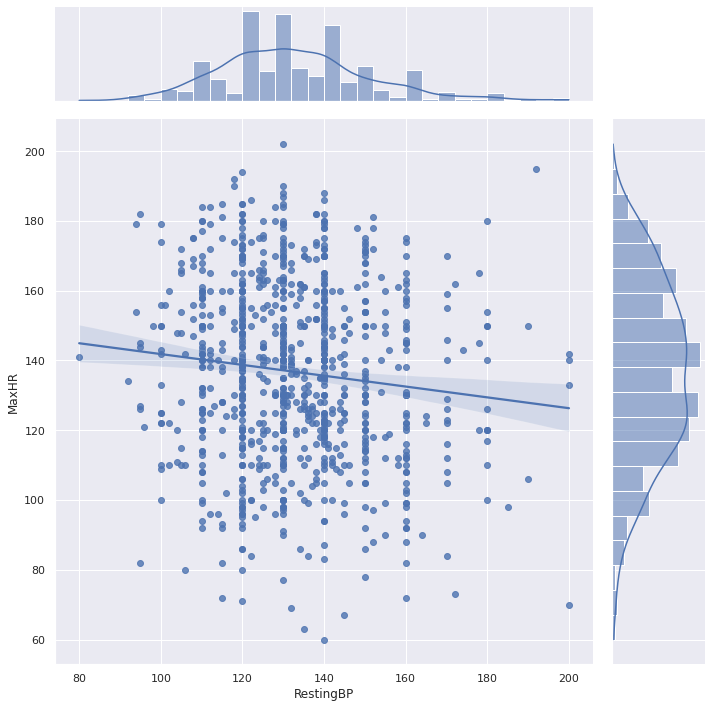

In [ ]:
sns.set_theme(style="darkgrid")
plot = sns.jointplot(data=df, x="RestingBP", y="MaxHR", kind="reg", height=10)
plt.ylabel("Maximum Heart Rate", fontsize=15)
plt.xlabel("Resting Blood Pressure", fontsize=15)
#plt.title('Joint Plot', fontsize=20)

Text(0.5, 85.99999999999991, 'Resting Blood Pressure')

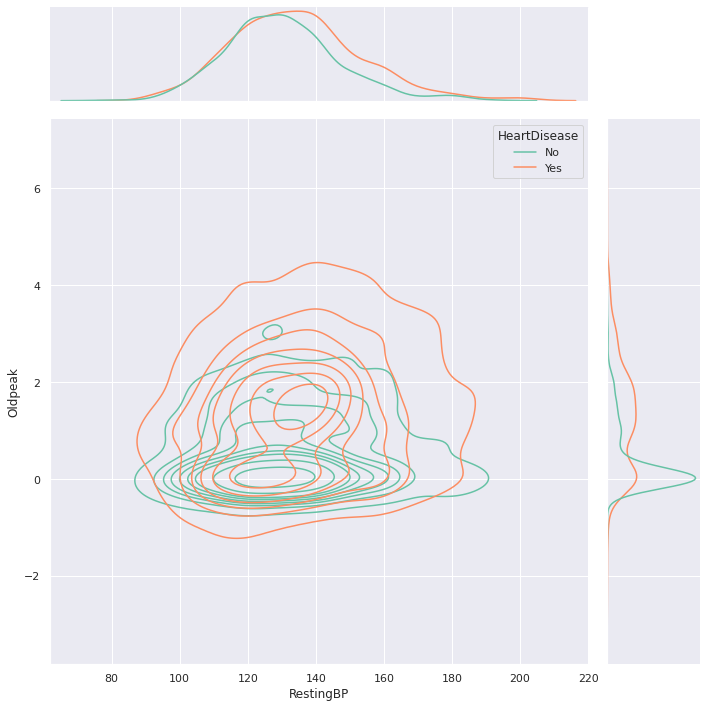

In [ ]:
sns.set_theme(style="darkgrid")
plot = sns.jointplot(data=df, x="RestingBP", y="Oldpeak", hue='HeartDisease', kind="kde", palette="Set2", height=10)
plt.ylabel("Old Peak", fontsize=15)
plt.xlabel("Resting Blood Pressure", fontsize=15)
#plt.title('Joint Plot', fontsize=20)

Text(0.5, 85.99999999999991, 'Resting Blood Pressure')

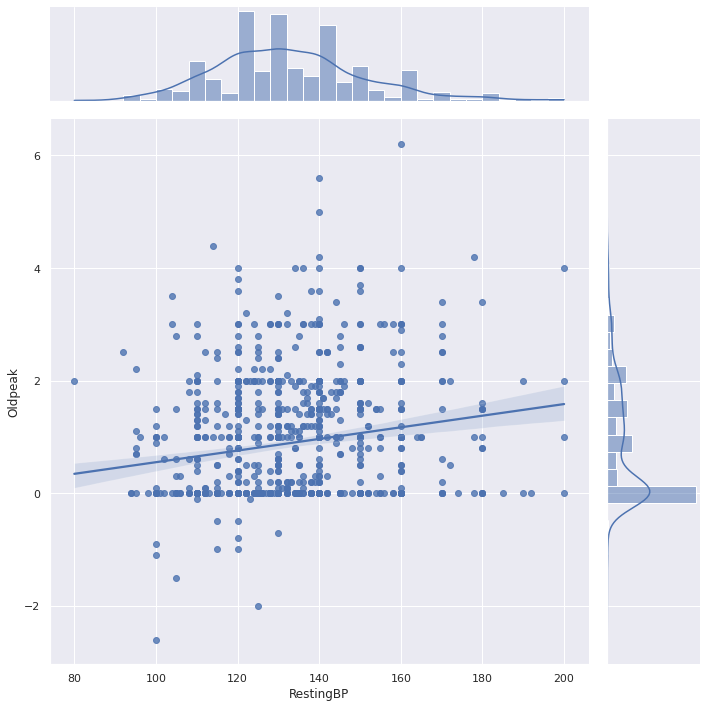

In [ ]:
sns.set_theme(style="darkgrid")
plot = sns.jointplot(data=df, x="RestingBP", y="Oldpeak", kind="reg", height=10)
plt.ylabel("Old Peak", fontsize=15)
plt.xlabel("Resting Blood Pressure", fontsize=15)
#plt.title('Joint Plot', fontsize=20)

#### Cholesterol

Text(0.5, 85.99999999999991, 'Cholesterol')

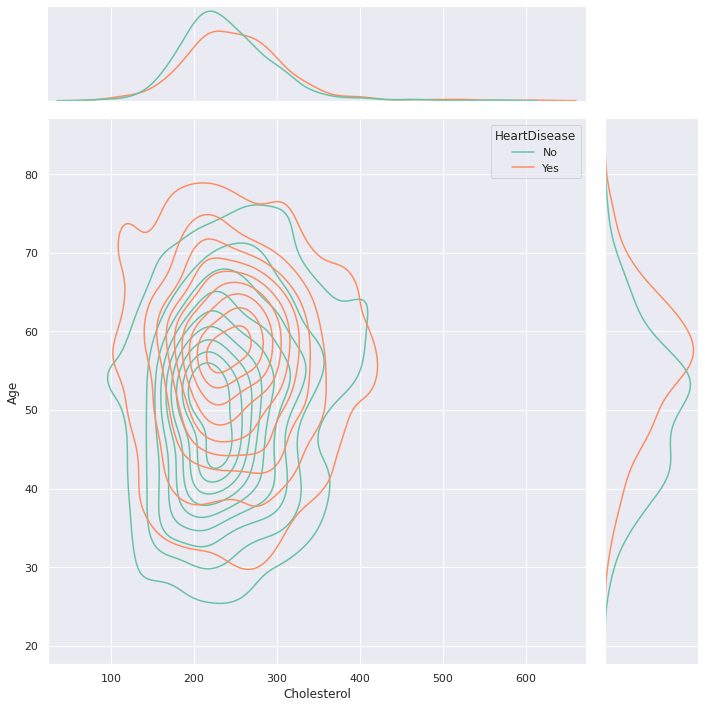

In [ ]:
bool=df['Cholesterol']!=0
df_chol=df[bool]
sns.set_theme(style="darkgrid")
plot = sns.jointplot(data=df_chol, x="Cholesterol", y="Age", hue='HeartDisease', kind="kde", palette="Set2", height=10)
plt.ylabel("Age", fontsize=15)
plt.xlabel("Cholesterol", fontsize=15)
#plt.title('Joint Plot', fontsize=20)

Text(564.2857142857143, 0.5, 'Cholesterol')

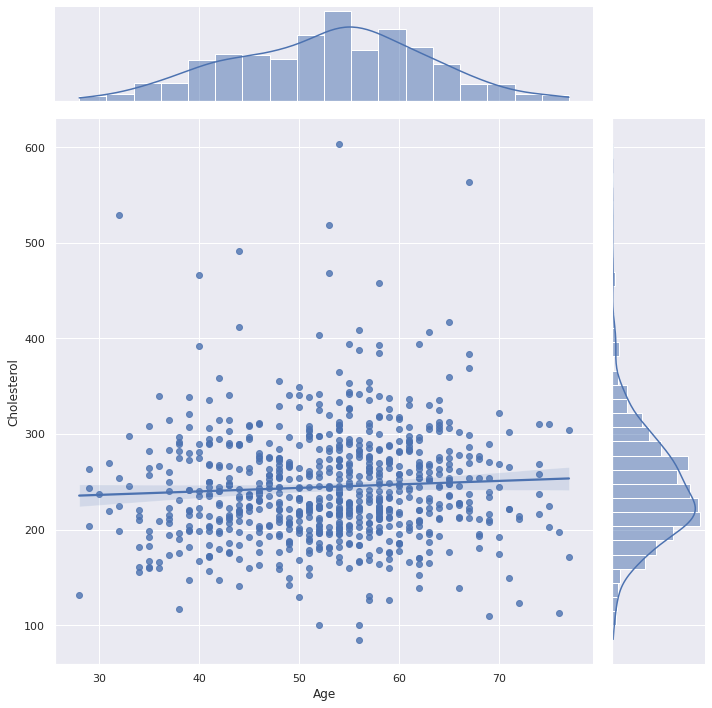

In [ ]:
bool=df['Cholesterol']!=0
df_chol=df[bool]
sns.set_theme(style="darkgrid")
plot = sns.jointplot(data=df_chol, y="Cholesterol", x="Age", kind="reg", height=10)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Cholesterol", fontsize=15)
#plt.title('Joint Plot', fontsize=20)

Text(0.5, 85.99999999999991, 'Cholesterol')

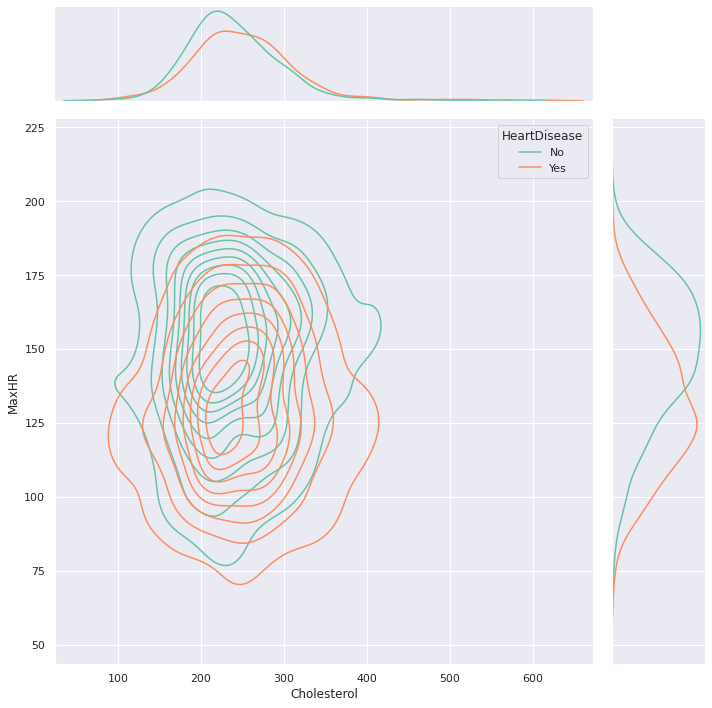

In [ ]:
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.jointplot(data=df_chol, x="Cholesterol", y="MaxHR", hue='HeartDisease', kind="kde", palette="Set2", height=10)
plt.ylabel("Maximum Heart Rate", fontsize=15)
plt.xlabel("Cholesterol", fontsize=15)
#plt.title('Joint Plot', fontsize=20)

Text(564.2857142857143, 0.5, 'Maximum Heart Rate')

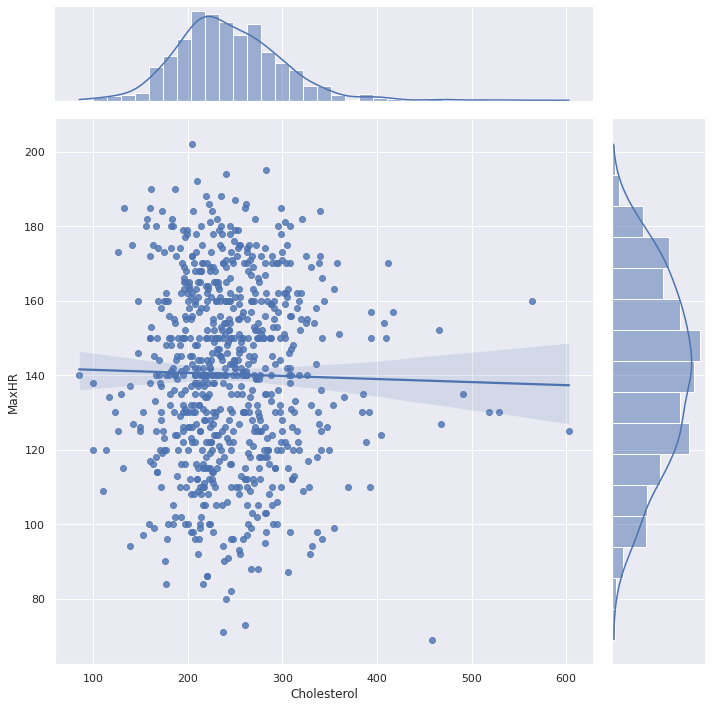

In [ ]:
#plotting box and whiskers plot
sns.set_theme(style="darkgrid")
plot = sns.jointplot(data=df_chol, x="Cholesterol", y="MaxHR", kind="reg", height=10)
plt.xlabel("Cholesterol", fontsize=15)
plt.ylabel("Maximum Heart Rate", fontsize=15)
#plt.title('Joint Plot', fontsize=20)

Text(0.5, 85.99999999999991, 'Cholesterol')

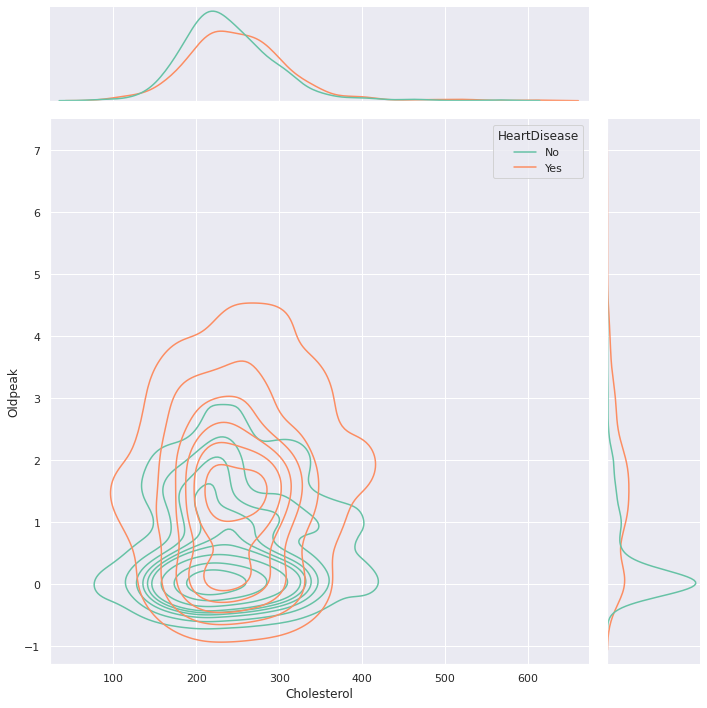

In [ ]:
sns.set_theme(style="darkgrid")
plot = sns.jointplot(data=df_chol, x="Cholesterol", y="Oldpeak", hue='HeartDisease', kind="kde", palette="Set2", height=10)
plt.ylabel("Old Peak", fontsize=15)
plt.xlabel("Cholesterol", fontsize=15)
#plt.title('Joint Plot', fontsize=20)

Text(0.5, 85.99999999999991, 'Cholesterol')

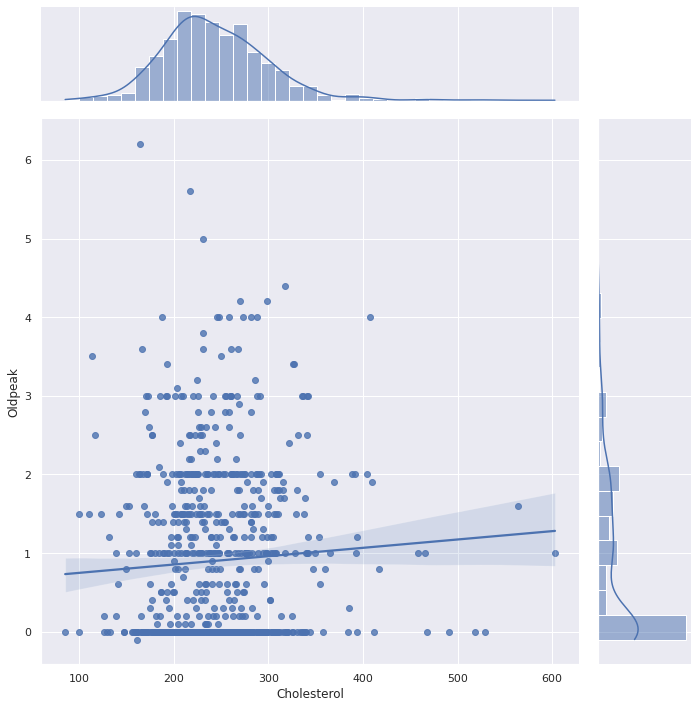

In [ ]:
sns.set_theme(style="darkgrid")
plot = sns.jointplot(data=df_chol, x="Cholesterol", y="Oldpeak", kind="reg", height=10)
plt.ylabel("Old Peak", fontsize=15)
plt.xlabel("Cholesterol", fontsize=15)
#plt.title('Joint Plot', fontsize=20)

#### Age

Text(0.5, 85.99999999999991, 'Age')

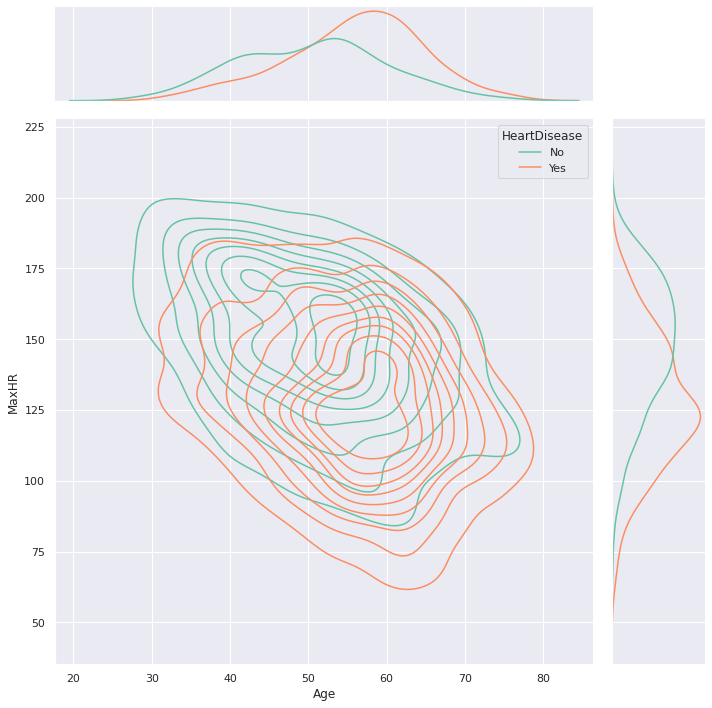

In [ ]:
sns.set_theme(style="darkgrid")
plot = sns.jointplot(data=df, x="Age", y="MaxHR", hue='HeartDisease', kind="kde", palette="Set2", height=10)
plt.ylabel("Maximum Heart Rate", fontsize=10)
plt.xlabel("Age", fontsize=10)
#plt.title('Joint Plot', fontsize=20)

Text(0.5, 85.99999999999991, 'Age')

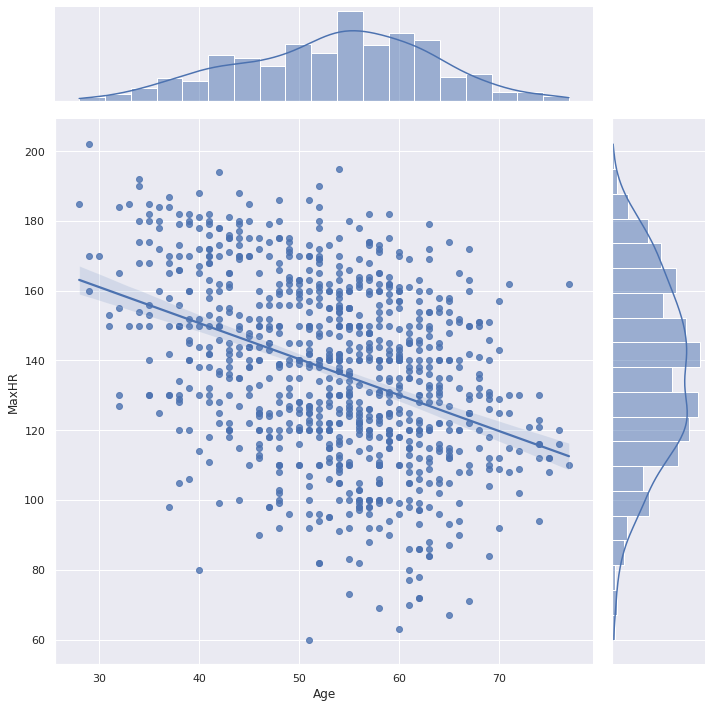

In [ ]:
sns.set_theme(style="darkgrid")
plot = sns.jointplot(data=df, x="Age", y="MaxHR", kind="reg", height=10)
plt.ylabel("Maximum Heart Rate", fontsize=15)
plt.xlabel("Age", fontsize=15)
#plt.title('Joint Plot', fontsize=20)

Text(0.5, 85.99999999999991, 'Age')

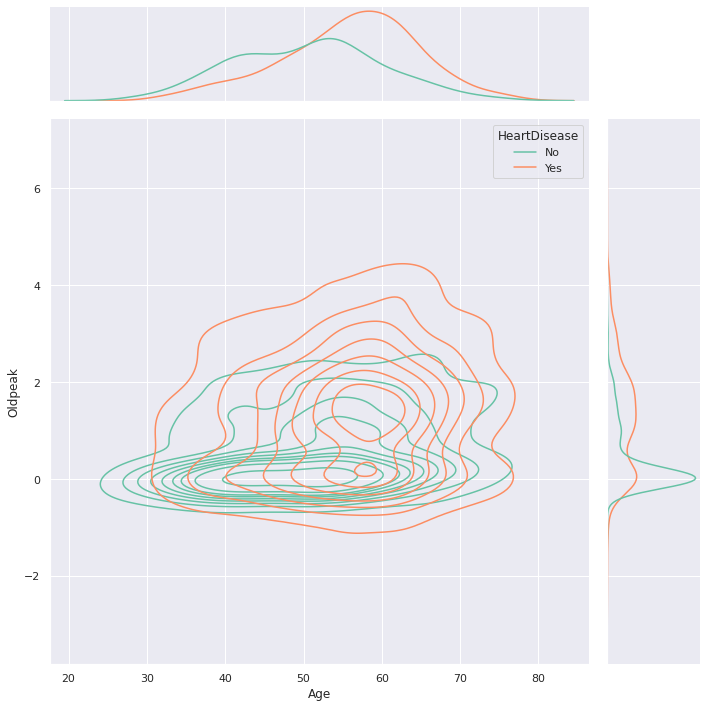

In [ ]:
sns.set_theme(style="darkgrid")
plot = sns.jointplot(data=df, x="Age", y="Oldpeak", hue='HeartDisease', kind="kde", palette="Set2", height=10)
plt.ylabel("Old Peak", fontsize=15)
plt.xlabel("Age", fontsize=15)
#plt.title('Joint Plot', fontsize=20)

Text(0.5, 85.99999999999991, 'Age')

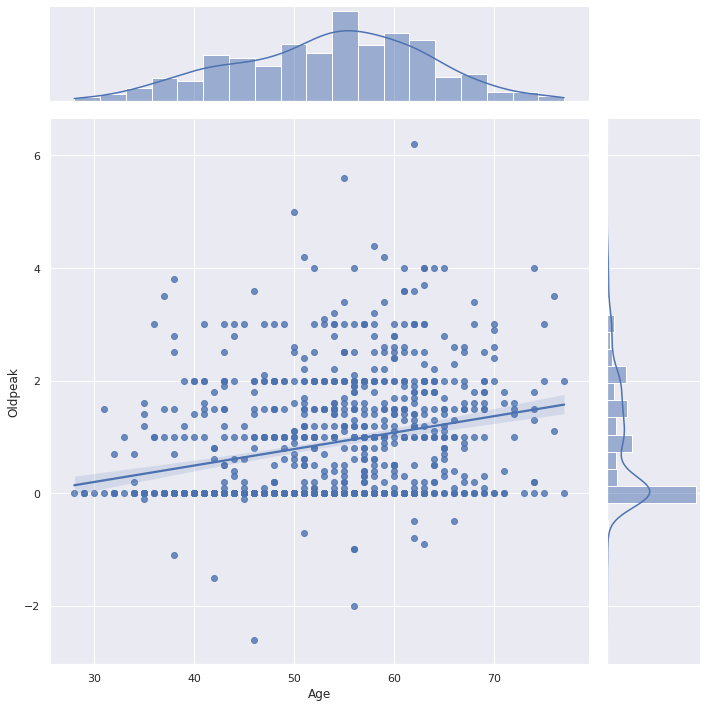

In [ ]:
sns.set_theme(style="darkgrid")
plot = sns.jointplot(data=df, x="Age", y="Oldpeak", kind="reg", height=10)
plt.ylabel("Old Peak", fontsize=15)
plt.xlabel("Age", fontsize=15)
#plt.title('Joint Plot', fontsize=20)

#### Maximum Heart Rate

Text(0.5, 85.99999999999991, 'Maximum Heart Rate')

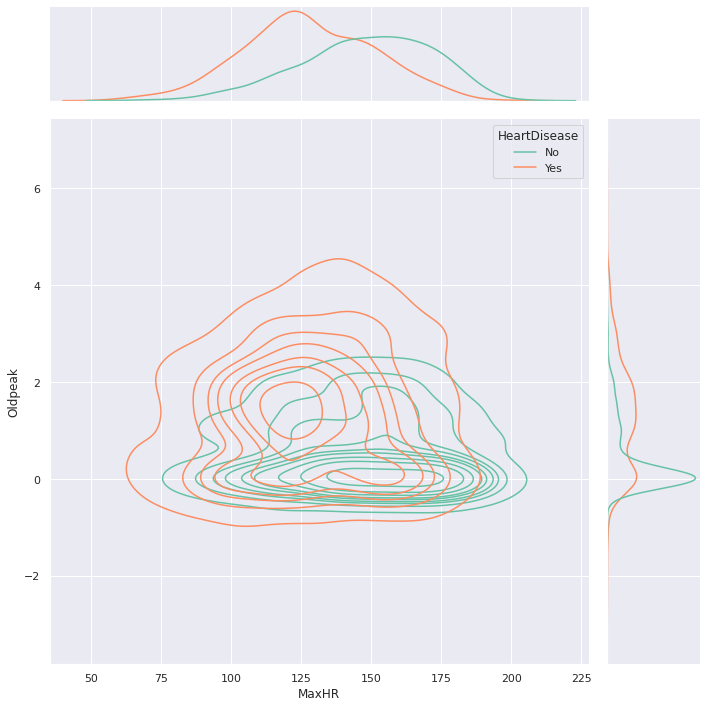

In [ ]:
sns.set_theme(style="darkgrid")
plot = sns.jointplot(data=df, x="MaxHR", y="Oldpeak", hue='HeartDisease', kind="kde", palette="Set2", height=10)
plt.ylabel("Old Peak", fontsize=15)
plt.xlabel("Maximum Heart Rate", fontsize=15)
#plt.title('Joint Plot', fontsize=20)

Text(0.5, 85.99999999999991, 'Maximum Heart Rate')

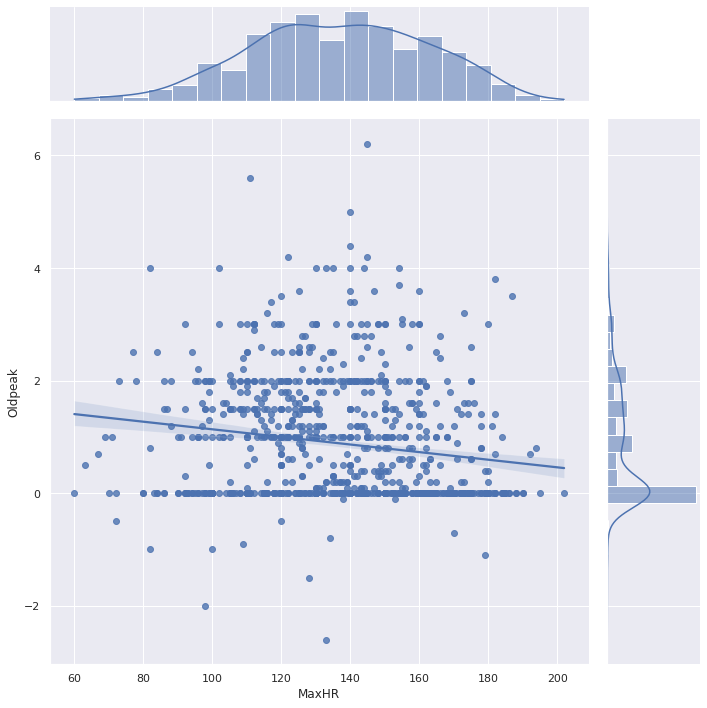

In [ ]:
sns.set_theme(style="darkgrid")
plot = sns.jointplot(data=df, x="MaxHR", y="Oldpeak", kind="reg", height=10)
plt.ylabel("Old Peak", fontsize=15)
plt.xlabel("Maximum Heart Rate", fontsize=15)
#plt.title('Joint Plot', fontsize=20)

## Scatter Plots of continous variables

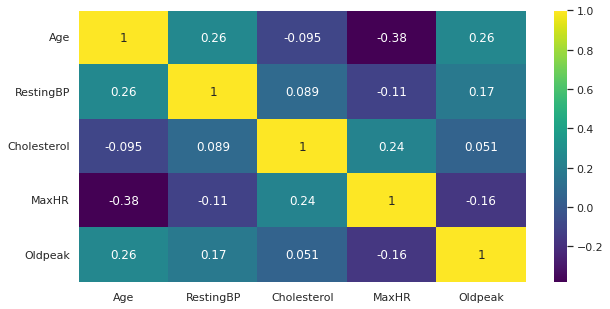

In [ ]:
plt.figure(figsize = (10, 5))
corr = df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap="viridis", annot = True);

As we can see, there are no strong correlations between any of the continuous variables ( max corr value is 0.38).

We will try a scatter plot between Age and MaxHR; and Age and Resting BP.

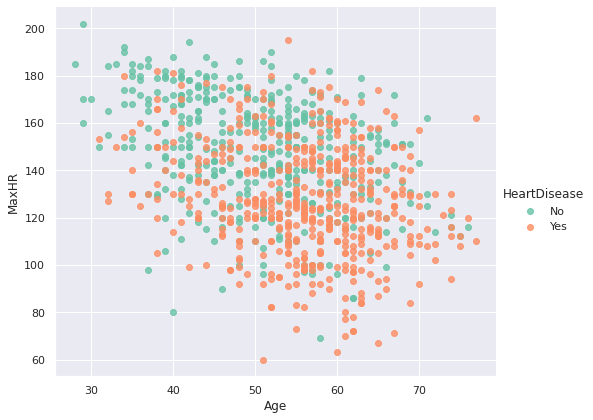

In [ ]:
sns.lmplot(x = "Age", y = "MaxHR", hue = 'HeartDisease', data = df, fit_reg = False, scatter_kws = {'alpha' : 0.8}, palette = "Set2", height = 6, aspect = 1.2);

People with lesser age have higher Maximum Heart Rate. They are also less likely to suffer heart failure, which is intuitive.

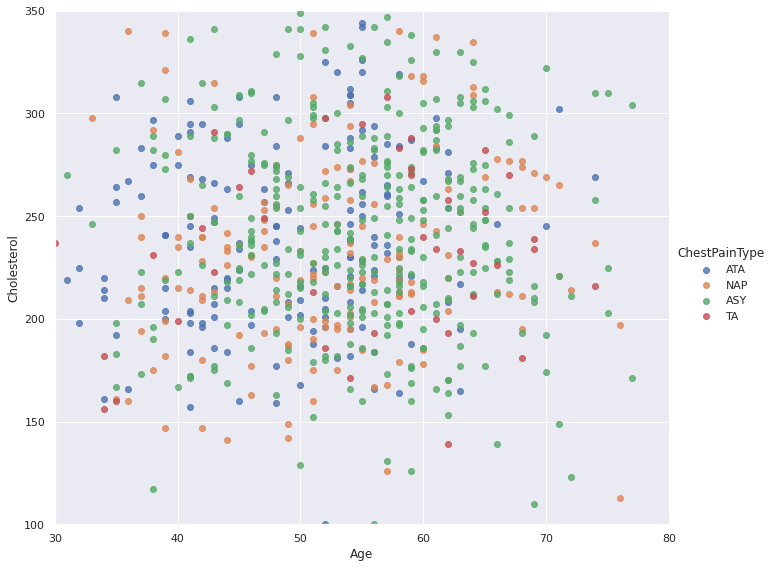

In [ ]:
df_edited = df[df['Cholesterol'] != 0]        # removing rows where cholesterol is 0
sns.lmplot(x = "Age", y = "Cholesterol", hue = 'ChestPainType', data = df_edited, fit_reg = False, scatter_kws = {'alpha' : 0.8}, height = 8, aspect = 1.2)
plt.ylim(100,350);
plt.xlim(30,80);

ATA chest pain type is seen more commonly in patients with lower age.

(75.0, 200.0)

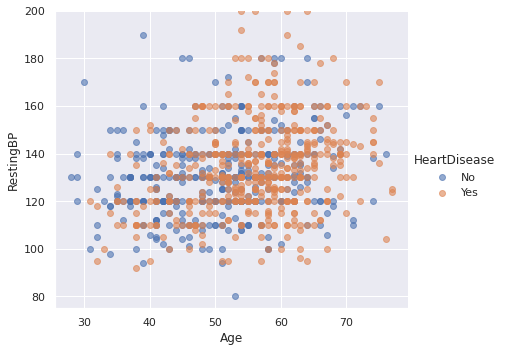

In [ ]:
sns.lmplot(x = "Age", y = "RestingBP", hue = 'HeartDisease', data = df, fit_reg = False, scatter_kws = {'alpha' : 0.6}, height = 5, aspect = 1.2)
plt.ylim(75,200)


Risk of heart failure increases with increase in age as well as resting blood pressure.

## One hot encoding for categorical variables

In [ ]:
df2 = df.copy()

In [ ]:
def encode_and_bind(origdf, feature):
    dummies = pd.get_dummies(origdf[[feature]])       #using pandas get dummies function for OHE
    newdf = pd.concat([origdf, dummies], axis=1)      #this part of the code taken from internet
    newdf = newdf.drop([feature], axis=1)
    return(newdf) 

features_to_encode = cat_vars
newdf = df2.copy()
for feature in features_to_encode:
    newdf = encode_and_bind(newdf, feature)           #performing OHE column by column using for loop


In [ ]:
newdf

Age  RestingBP  Cholesterol  ...  ST_Slope_Up  HeartDisease_0  HeartDisease_1
0     40        140          289  ...            1               1               0
1     49        160          180  ...            0               0               1
2     37        130          283  ...            1               1               0
3     48        138          214  ...            0               0               1
4     54        150          195  ...            1               1               0
..   ...        ...          ...  ...          ...             ...             ...
913   45        110          264  ...            0               0               1
914   68        144          193  ...            0               0               1
915   57        130          131  ...            0               0               1
916   57        130          236  ...            0               0               1
917   38        138          175  ...            1               1               0

[918 rows x 23 columns]

## 2-component PCA for visualizing data 

In [ ]:
#PCA for visualization
from sklearn.preprocessing import StandardScaler

features = newdf.columns.drop(['HeartDisease_0','HeartDisease_1'])
features


Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'Sex_F', 'Sex_M',
       'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'FastingBS_0', 'FastingBS_1', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [ ]:
target = 'HeartDisease'
x = newdf.loc[:, features].values                            #seperating features and target into x and y
y = df.loc[:,['HeartDisease']].values

In [ ]:
x = StandardScaler().fit_transform(x)             #Scaling of features to mean 0 and variance 1


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)                                                         #this code taken from PCA documentation
principalComponents = pca.fit_transform(x)                                        #Using sklearn to implement PCA
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['HeartDisease']]], axis = 1)

In [ ]:
pca.explained_variance_ratio_

array([0.21658647, 0.10399223])

The first principal component contains 21.6 % of the variance while the second contains 10.4% . This means we have a total of only 32% of the total variance. This is to be expected as we have chosen only 2 components while original data has 11 features (without one hot encoding)

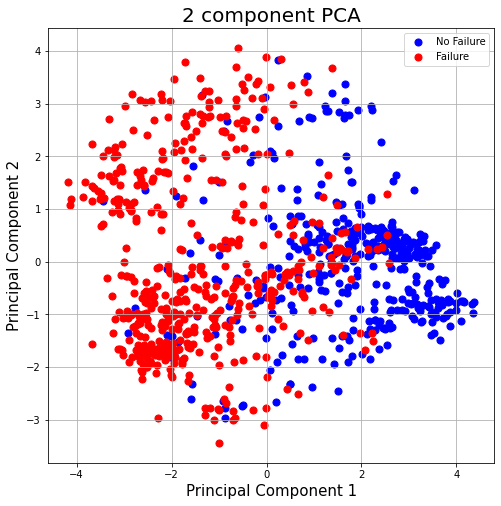

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)                   #Plotting data from the finalDf dataframe
ax.set_title('2 component PCA', fontsize = 20)
targets = ['0', '1']
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['HeartDisease'] == target                   #for loop taken from internet
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['No Failure', 'Failure'])
ax.grid()


Since 6/11 features are categorical, we will not be using PCA to reduce dimensions while training our ML model as PCA does not work well with categorical variables. 

## Showing decision boundary in PCA plot. (using 4 classification algorithms)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  import sys
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


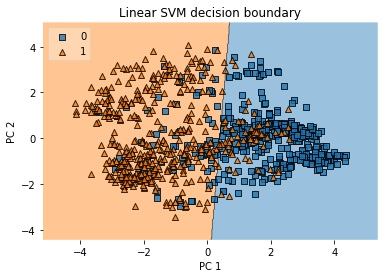

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


Xarray = principalDf.to_numpy()                                #converted HeartDisease to integer from string for model
yarray = df['HeartDisease'].to_numpy().astype(np.integer)      #Converting to arrays as SVC is not accepting dataframes

# Training a classifier
svm = SVC(C=0.5, kernel='linear') 
svm.fit(Xarray, yarray)


# Plotting decision regions
plot_decision_regions(Xarray, yarray, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Linear SVM decision boundary')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# Initializing Classifiers
clf1 = LogisticRegression(random_state=1,
                          solver='newton-cg',
                          multi_class='multinomial')
clf2 = RandomForestClassifier(random_state=1, n_estimators=100)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto')


A visual represntation of the decision boundaries of some common classification algorithms on the principal components.

Algorithms used are : Logistic Regression, Random Forests, Naive Bayes and Gaussian Kernelized SVM. Note that these models haven't been tuned, they are just being used for visual representation purposed.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarni

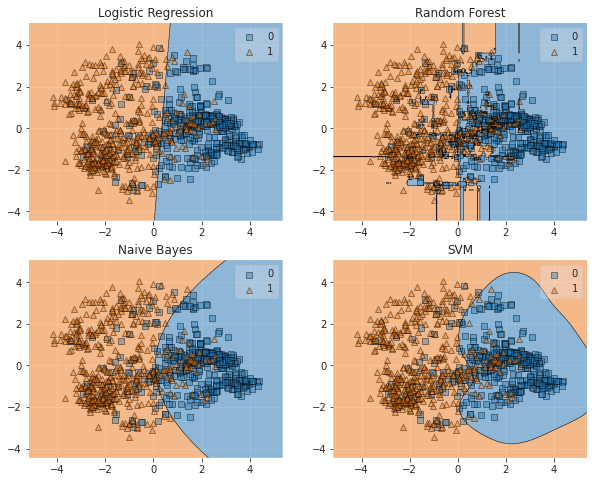

<Figure size 360x216 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']

Xarray = principalDf.to_numpy()                               
yarray = df['HeartDisease'].to_numpy().astype(np.integer) 
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],                                #this part taken from internet
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(Xarray, yarray)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=Xarray, y=yarray, clf=clf, scatter_kwargs = {'alpha' : 0.4})
    plt.title(lab)

plt.show();
plt.savefig('Visual Decision Boundaries.png')

What we want to show : MaxHR of people reduces with age. 

Age seems to have a very slight effect on Resting Blood pressure, it increases with age

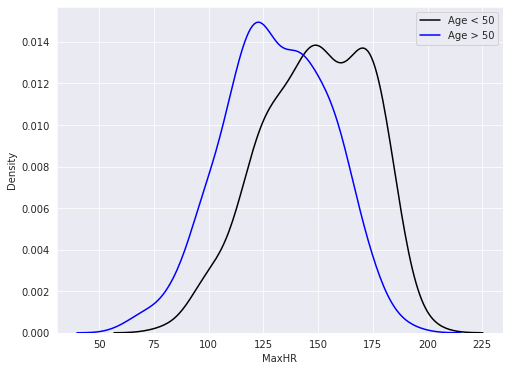

In [ ]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
chart=sns.kdeplot(x = 'MaxHR', data = df[df['Age'] < 50], color = 'black')
chart2 = sns.kdeplot(x = 'MaxHR', data = df[df['Age'] > 50], color = 'blue')
plt.legend(['Age < 50', 'Age > 50']);


We can clearly see that the plot is shifted to the left for people with greater age, i.e. they have lower MaxHR

We will use hypothesis testing to verify this. We will be using a one sided t-test.

## Hypothesis Testing

We will try to model the distribution of MaxHR of people with age <50 and then see how likely it is that the MaxHR of people with age >50 will also belong to the same distribution.

In [ ]:
mu_0 = df[df['Age'] < 50]['MaxHR'].mean()         # mean of the MaxHR of people with age < 50. We will assume this to be the true population mean
std = df[df['Age'] < 50]['MaxHR'].std()         #standard deviation for the same

In [ ]:
print("The  mean and standard deviation are : ",[mu_0,std])

The  mean and standard deviation are :  [148.89690721649484, 24.13060063391359]


Let the mean of HR of people with age less than 50 be $\mu_{0} = 148.89 $

In [ ]:
from scipy.stats import norm,t



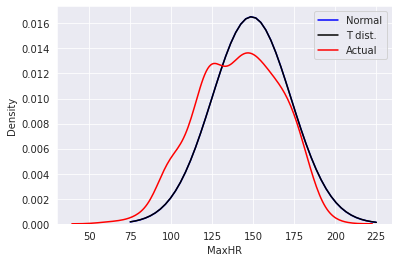

In [ ]:
rv_norm = norm(loc = mu_0, scale = std)
rv_t = t(df = len(df[df['Age'] < 50]) - 1, loc = mu_0, scale = std)   # degrees of freedom for t distribution is sample size - 1
x = np.linspace(75,225)
plt.plot(x,rv_norm.pdf(x), color = 'blue')
plt.plot(x,rv_t.pdf(x), color = 'black') 
chart=sns.kdeplot(x = 'MaxHR', data = df[df['Age'] < 50], color = 'red')
plt.legend(['Normal', 'T dist.', 'Actual']);

Our modelling should serve as a good approximation. For large sample size, normal and t distribution are very close to one another, hence from this point we will use normal distribution for simplicity.

Let the mean HR for people with age > 50 be $\mu$

Null Hypothesis : $\mu_{0} = \mu $

Alternate Hypothesis : $\mu_{0} > \mu$

$\alpha = 0.05$  (threshold)

In [ ]:
sample_size = len(df[df['Age'] > 50])
print("Sample size is : ", sample_size)

Sample size is :  221


In [ ]:
mu = df[df['Age'] > 50]['MaxHR'].mean()
print("Sample mean is :",mu)

Sample mean is : 124.94570135746606


In [ ]:
#calculating p value (one sided) for this value of sample mean

p_value = rv_norm.cdf(mu)              #area under pdf curve for given observation or more extreme observations which is simply cdf.
print("The p_value is : " ,p_value)

The p_value is :  0.16046083011719087


This p value is much larger than our $\alpha$. Hence we fail to reject the null hypothesis, atleast based on the given data.